## Table Of Contents <a id="index"></a>


- [Dataset managing](#dataset)  
- [District Data](#district-data)
- [Data Exploration](#data-exploration)
- [Matrix](#matrix)
  

#### Models
- [**Decision Tree**](#decision-tree)
    - [**Parameter Tunning**](#parameter-tunning)
- [**K-Nearest Neighbor**](#k-nearest-neighbor)
    - [**Parameter Tunning**](#parameter-tunning-2)  
- [**Support-Vector Machines**](#support-vector-machines)
    - [**Parameter Tunning**](#parameter-tunning-3)
- [**Neural Networks**](#neural-networks)
    - [**Parameter Tunning**](#parameter-tunning-4)
- [**Logistic Regression**](#logistic-regression)
    - [**Parameter Tunning**](#parameter-tunning-5)
- [**Naive Bayes**](#naive-bayes)
    - [**Parameter Tunning**](#parameter-tunning-6)
- [**Random Forest**](#random-forest)
    - [**Parameter Tunning**](#parameter-tunning-7)
- [**XGBoost**](#xgboost)
    - [**Parameter Tunning**](#parameter-tunning-8)
- [**MLP**](#mlp)
    - [**Parameter Tunning**](#parameter-tunning-9)
- [**Ada Boost**](#ada-boost)
    - [**Parameter Tunning**](#parameter-tunning-10)
- [**Voting**](#voting)

#### [Apply Model](#apply-model)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
import plotly.graph_objects as go
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFECV
from datetime import date
from sklearn import preprocessing

In [ ]:
show_graphs = False
run_aggr = True

In [ ]:
def dataset(x, missing = ""):
    return pd.read_csv('Dataset/' + x + '.csv', sep = ';', low_memory = False, na_values = missing_values).rename(str.strip, axis = 'columns')

In [ ]:
def abs_min(x):
    return x.abs().min()
abs_min.__name__ = 'abs_min'

def rangev(x):
    return x.max() - x.min()
rangev.__name__ = 'range'

In [ ]:
def get_decade(year):
    year_int = int(year)
    string = str(year_int//10) + "0-" + str(year_int//10) + "9"
    return string

In [ ]:
def get_month(year):
    string = year[2:4] + "/" + year[0:2]
    return string

In [ ]:
def get_balance(year):
    year_int = int(float(year))
    string = "1" + "0"*(len(str(year_int))-1) + "-" + "9" + "9"*(len(str(year_int))-1)
    return string

In [ ]:
def calculateAge(birthDate, loanDate):
    loan = list(map(int,loanDate.split("-")))
    birth = list(map(int,birthDate.split("-")))

    loan_date = date(loan[0], loan[1], loan[2])
    

    birth_date = date(birth[0], birth[1], birth[2])
    return (int((loan_date-birth_date).days/365))

In [ ]:
def count_credit_cash(val):
    return sum(val=="credit in cash")
def count_collect(val):
    return sum(val=="collection from another bank")
def count_with_cash(val):
    return sum(val=="withdrawal in cash")
def count_remi(val):
    return sum(val=="remittance to another bank")
def count_with_card(val):
    return sum(val=="credit card withdrawal")
def count_interest(val):
    return sum(val=="interest credited")

def count_withdrawal(val):
    return sum(val=="withdrawal")
def count_credit(val):
    return sum(val=="credit")

Functions for getting the mean of the operations

In [ ]:
def mean_credit_cash(val):
    return np.mean(val=="credit in cash")
def mean_collect(val):
    return np.mean(val=="collection from another bank")
def mean_with_cash(val):
    return np.mean(val=="withdrawal in cash")
def mean_remi(val):
    return np.mean(val=="remittance to another bank")
def mean_with_card(val):
    return np.mean(val=="credit card withdrawal")
def mean_interest(val):
    return np.mean(val=="interest credited")

def mean_withdrawal(val):
    return np.mean(val=="withdrawal")
def mean_credit(val):
    return np.mean(val=="credit")

Functions for getting the standard deviation of the operations

In [ ]:
def std_credit_cash(val):
    return np.std(val=="credit in cash")
def std_collect(val):
    return np.std(val=="collection from another bank")
def std_with_cash(val):
    return np.std(val=="withdrawal in cash")
def std_remi(val):
    return np.std(val=="remittance to another bank")
def std_with_card(val):
    return np.std(val=="credit card withdrawal")
def std_interest(val):
    return np.std(val=="interest credited")


def std_withdrawal(val):
    return np.std(val=="withdrawal")
def std_credit(val):
    return np.std(val=="credit")

Functions for getting the covariance of the operations

In [ ]:
def cov_credit_cash(val):
    return np.cov(val=="credit in cash")
def cov_collect(val):
    return np.cov(val=="collection from another bank")
def cov_with_cash(val):
    return np.cov(val=="withdrawal in cash")
def cov_remi(val):
    return np.cov(val=="remittance to another bank")
def cov_with_card(val):
    return np.cov(val=="credit card withdrawal")
def cov_interest(val):
    return np.cov(val=="interest credited")

def cov_withdrawal(val):
    return np.cov(val=="withdrawal")
def cov_credit(val):
    return np.cov(val=="credit")

In [ ]:
def count_disponents(val):
    return sum(val=="DISPONENT")

Function to merge the datasets

In [ ]:
def merge_dataset(loan, district, client, card, trans, account, disp):

    df = loan
    df = pd.merge(df, trans, on = 'account_id', suffixes = ('', '_trans'))
    df = pd.merge(df, account, on = 'account_id', suffixes = ('', '_account'))
    
    df = pd.merge(df, district.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))
    df = pd.merge(df, disp, on = 'account_id', suffixes = ('', '_disp'))
    df = pd.merge(df, card, on = 'disp_id', how = 'outer', suffixes = ('', '_card'))
    df = pd.merge(df, client, on = 'client_id', suffixes = ('', '_client'))
    df = df.drop(['district_id_client'], axis=1)
    df.info()
    return df

Function to parse the dates

In [ ]:
def parse_dates(df, date_var, birth):
    loan_dates = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in df[date_var]]
    return [calculateAge(df[birth][n],loan_dates[n]) for n in range(0,len(df[birth]))]

Function to parse date ranges

In [ ]:
def parse_date_ranges(df,age):
    age_loan_train = df[age].astype(str)
    return [get_decade(age_loan_train[n]) for n in range(0, len(df))]

Function to parse the client birth and genre

In [ ]:
def parse_client(client_data):
    birth_dates = client_data['birth_number']
    dates_parsed = []
    genre = []
    for bdate in birth_dates:
        month = int(str(bdate)[2:4])
        if month > 12:
            genre.append(0)
            month = month - 50
            if month < 10:
                month = '0' + str(month)
            else:
                month = str(month)
        else:
            if month < 10:
                month = '0' + str(month)
            else:
                month = str(month)
            genre.append(1)
        dates_parsed.append(str(bdate)[:2] + '-' + month + '-' + str(bdate)[4:])
        
    return dates_parsed, genre

In [ ]:
def remove_columns(train_data, test_data, option):
    if option == 0:
        train_data.drop(['operation_count_credit_cash', 'operation_count_collect', 'operation_count_with_cash', 
        'operation_count_remi', 'operation_count_with_card', 'operation_count_interest', 'operation_mean_credit_cash', 
        'operation_mean_collect', 'operation_mean_with_cash', 'operation_mean_remi', 'operation_mean_with_card', 
        'operation_mean_interest', 'operation_std_credit_cash', 'operation_std_collect', 'operation_std_with_cash', 
        'operation_std_remi', 'operation_std_with_card', 'operation_std_interest', 'operation_cov_credit_cash', 
        'operation_cov_collect', 'operation_cov_with_cash', 'operation_cov_remi', 'operation_cov_with_card', 
        'operation_cov_interest', 'balance_std', 'balance_last', 'type_count_withdrawal', 'type_count_credit', 
        'type_mean_withdrawal', 'type_mean_credit', 'type_std_withdrawal', 'type_std_credit', 'type_cov_withdrawal', 'type_cov_credit'], axis=1, inplace=True)
        test_data.drop(['operation_count_credit_cash', 'operation_count_collect', 'operation_count_with_cash', 
        'operation_count_remi', 'operation_count_with_card', 'operation_count_interest', 'operation_mean_credit_cash', 
        'operation_mean_collect', 'operation_mean_with_cash', 'operation_mean_remi', 'operation_mean_with_card', 
        'operation_mean_interest', 'operation_std_credit_cash', 'operation_std_collect', 'operation_std_with_cash', 
        'operation_std_remi', 'operation_std_with_card', 'operation_std_interest', 'operation_cov_credit_cash', 
        'operation_cov_collect', 'operation_cov_with_cash', 'operation_cov_remi', 'operation_cov_with_card', 
        'operation_cov_interest', 'balance_std', 'balance_last', 'type_count_withdrawal', 'type_count_credit', 
        'type_mean_withdrawal', 'type_mean_credit', 'type_std_withdrawal', 'type_std_credit', 'type_cov_withdrawal', 'type_cov_credit'], axis=1, inplace=True)  
    if option == 1:
        train_data.drop(['age_account_range', 'operation_count_credit_cash', 'operation_count_collect', 
        'operation_count_with_cash', 'operation_count_remi', 'operation_count_with_card', 'operation_count_interest', 
        'operation_mean_credit_cash', 'operation_mean_collect', 'operation_mean_with_cash', 'operation_mean_remi', 
        'operation_mean_with_card', 'operation_mean_interest', 'operation_std_credit_cash', 'operation_std_collect', 
        'operation_std_with_cash', 'operation_std_remi', 'operation_std_with_card', 'operation_std_interest', 
        'operation_cov_credit_cash', 'operation_cov_collect', 'operation_cov_with_cash', 'operation_cov_remi', 
        'operation_cov_with_card', 'operation_cov_interest', 'balance_std', 'balance_last', 'type_std_withdrawal', 
        'type_std_credit', 'type_cov_withdrawal', 'type_cov_credit', 'amount_std', 'amount_last', 'amount_range', 
        'balance_std', 'balance_last', 'balance_range'], axis=1, inplace=True)
        test_data.drop(['age_account_range', 'operation_count_credit_cash', 'operation_count_collect', 
        'operation_count_with_cash', 'operation_count_remi', 'operation_count_with_card', 'operation_count_interest', 
        'operation_mean_credit_cash', 'operation_mean_collect', 'operation_mean_with_cash', 'operation_mean_remi', 
        'operation_mean_with_card', 'operation_mean_interest', 'operation_std_credit_cash', 'operation_std_collect', 
        'operation_std_with_cash', 'operation_std_remi', 'operation_std_with_card', 'operation_std_interest', 
        'operation_cov_credit_cash', 'operation_cov_collect', 'operation_cov_with_cash', 'operation_cov_remi', 
        'operation_cov_with_card', 'operation_cov_interest', 'balance_std', 'balance_last', 'type_std_withdrawal', 
        'type_std_credit', 'type_cov_withdrawal', 'type_cov_credit', 'amount_std', 'amount_last', 'amount_range', 
        'balance_std', 'balance_last', 'balance_range'], axis=1, inplace=True) 
    return train_data,test_data

In [ ]:
def merge_aggr_dataset_plots(loan, district, client, card, trans, account, disp):
    # build aggregate dataset

    # columns = trans.columns.values.tolist()
    # columns.remove("trans_id")
    # columns.remove("amount")
    # columns.remove("balance")
    # columns.remove("operation")
    # columns.remove("type")
    
    trans=trans.groupby("account_id", as_index=False,group_keys=False).agg({
        "operation": ["count",count_credit_cash, count_collect, count_with_cash, count_remi, count_with_card, count_interest, 
                     mean_credit_cash, mean_collect, mean_with_cash, mean_remi, mean_with_card, mean_interest,
                     std_credit_cash, std_collect, std_with_cash, std_remi, std_with_card, std_interest,
                     cov_credit_cash, cov_collect, cov_with_cash, cov_remi, cov_with_card, cov_interest], 
        "amount": ["mean","min","max","std","last",abs_min,rangev],
        "balance": ["mean","min","max","std","last",abs_min,rangev],
        "type": [count_withdrawal, count_credit, mean_withdrawal, mean_credit, std_withdrawal, std_credit,cov_withdrawal, cov_credit]
    })
    trans.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in trans.columns]
    
    df = loan
    df = pd.merge(df, trans, on = 'account_id', suffixes = ('', '_trans'))
    df = pd.merge(df, account, on = 'account_id', suffixes = ('', '_account'))
    df = pd.merge(df, district.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))
    df = pd.merge(df, disp, on = 'account_id', suffixes = ('', '_disp'))
    df = pd.merge(df, card, on = 'disp_id', how = 'outer', suffixes = ('', '_card'))
    df = pd.merge(df, client, on = 'client_id', suffixes = ('', '_client'))
    df = df.drop(['district_id_client'], axis=1)


    df.info()
    return df
    

In [ ]:
def merge_aggr_dataset(loan, district, client, card, trans, account, disp):
    # build aggregate dataset
    
    trans.loc[trans['operation'].isna(), 'operation'] = trans.loc[trans['operation'].isna(), 'k_symbol']
    trans.loc[trans['type'] == "withdrawal in cash", 'type'] = "withdrawal"
    trans.drop(['k_symbol', 'bank', 'account', 'date'], axis=1, inplace=True)

    trans=trans.groupby("account_id", as_index=False,group_keys=False).agg({
        "operation": ["count",count_credit_cash, count_collect, count_with_cash, count_remi, count_with_card, count_interest, 
                     mean_credit_cash, mean_collect, mean_with_cash, mean_remi, mean_with_card, mean_interest,
                     std_credit_cash, std_collect, std_with_cash, std_remi, std_with_card, std_interest,
                     cov_credit_cash, cov_collect, cov_with_cash, cov_remi, cov_with_card, cov_interest], 
        "amount": ["mean","min","max","std","last",abs_min,rangev],
        "balance": ["mean","min","max","std","last",abs_min,rangev],
        "type": [count_withdrawal, count_credit, mean_withdrawal, mean_credit, std_withdrawal, std_credit,cov_withdrawal, cov_credit]
    })
    trans.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in trans.columns]
    

    disponents = disp.groupby(["account_id"],as_index=False,group_keys=False).agg({"type": [count_disponents]})
    disponents.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in disponents.columns]
    disp = disp[disp.type.eq('OWNER')]
    disp.drop(['type'], axis=1, inplace=True)
    disp = pd.merge(disp,disponents, on = "account_id")

    client["birth_number"], client["genre"] = parse_client(client)

    district['unemploymant rate \'95'].fillna(district['unemploymant rate \'95'].median(), inplace=True)
    district['no. of commited crimes \'95'].fillna(district['no. of commited crimes \'95'].mean(), inplace=True)
    district.drop(['name', 'region'], axis=1, inplace=True)

    df = loan
    df = pd.merge(df, trans, on = 'account_id', suffixes = ('', '_trans'))
    df = pd.merge(df, account, on = 'account_id', suffixes = ('', '_account'))
    df = pd.merge(df, district.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))
    df = pd.merge(df, disp, on = 'account_id', suffixes = ('', '_disp'))
    df = pd.merge(df, card, on = 'disp_id', how = 'outer', suffixes = ('', '_card'))
    df = pd.merge(df, client, on = 'client_id', suffixes = ('', '_client'))
    df = df.drop(['district_id_client'], axis=1)

    

    df["age_loan"]=parse_dates(df,"date","birth_number")
    df["age_account"]=parse_dates(df,"date_account","birth_number")
    df["age_loan_range"] = parse_date_ranges(df,"age_loan")
    df["age_account_range"] = parse_date_ranges(df,"age_account")
    df.drop(['date', 'date_account', 'birth_number'], axis=1, inplace=True)

    df.drop(['disp_id', 'client_id'], axis=1, inplace=True)
    
    df["hasCard"]=df["card_id"].fillna(0)
    df.loc[df["hasCard"]!=0,"hasCard"] = 1
    df["hasCard"] = df["hasCard"].astype(bool)
    df.drop(['card_id', 'type', 'issued'], axis=1, inplace=True)
    

    df.info()
    return df

[**Final Data**](#finalData)

In [ ]:
missing_values = ['?', 'NA', '']
account_data = dataset('account', missing_values)
client_data = dataset('client', missing_values)
disp_data = dataset('disp', missing_values)
district_data = dataset('district', missing_values)
card_train = dataset('card_train', missing_values)
card_test = dataset('card_test')
loan_train = dataset('loan_train', missing_values)
loan_test = dataset('loan_test')
trans_train = dataset('trans_train', missing_values)
trans_test = dataset('trans_test')

In [ ]:
if run_aggr:
    loan_train_aggr, district_data_train_aggr, client_data_train_aggr, card_train_aggr, trans_train_aggr, account_data_train_aggr, disp_data_train_aggr = loan_train.copy(), district_data.copy(), client_data.copy(), card_train.copy(), trans_train.copy(), account_data.copy(), disp_data.copy()

In [ ]:
if run_aggr:
    loan_test_aggr, district_data_test_aggr, client_data_test_aggr, card_test_aggr, trans_test_aggr, account_data_test_aggr, disp_data_test_aggr = loan_test.copy(), district_data.copy(), client_data.copy(), card_test.copy(), trans_test.copy(), account_data.copy(), disp_data.copy()

In [ ]:
if show_graphs:
    plt.figure(figsize=(15,8))
    sb.countplot(x='region', data=district_data)
    plt.title("Number of districts per region", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.xlabel('Region');
    plt.ylabel('Number of districts from region');
    plt.show()

To study if the region might have an impact on the acceptance of the loan we will create a graph comparing the percentages of successful loans per region.

In [ ]:
if show_graphs:
    district_data_region = district_data.copy()
    region_data = loan_train
    region_data = pd.merge(region_data, trans_train, on = 'account_id', suffixes = ('', '_trans'))
    region_data = pd.merge(region_data, account_data, on = 'account_id', suffixes = ('', '_account'))
    #train_data = train_data.dropna()
    region_data = pd.merge(region_data, district_data_region.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))

    region_total = region_data["region"].value_counts()
    tuples_total = [tuple((x, y)) for x, y in region_total.items()]

    regions_status_1 = region_data.loc[region_data['status'] == 1]
    region_total_1 = regions_status_1["region"].value_counts()
    tuples_total_1 = [tuple((x, y)) for x, y in region_total_1.items()]

    lista=[]
    for x in tuples_total:
        for y in tuples_total_1:
            if x[0]==y[0]:
                lista.append((x[0],x[1],y[1]))

    percentages = [(i[0],i[2] / i[1]) for i in lista]
    percentages.sort(key = lambda x: -x[1])

    x = [i[0] for i in percentages]
    y = [i[1] for i in percentages]

    plt.figure(figsize=(15,8))
    sb.barplot(x,y)
    plt.ylim(0.7, 1)
    plt.title("Percentage of successful loans per region", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.xlabel('Region');
    plt.ylabel('Percentage of successful loans');
    plt.show()


The *name* and the *region* of a **district** is not relevant to our analysis, as the *code* parameter is enough to identify a district. 

In [ ]:
if not run_aggr:
    # Removing name and region from district
    district_data.drop(['name', 'region'], axis=1, inplace=True)

Now let's see the different values the parameter type can have.

In [ ]:
if show_graphs:
    disp_data_pie = disp_data.copy()

    ser = disp_data_pie.groupby('type')['type'].count()
    ser = ser.sort_values(ascending=False)
    ser = ser.iloc[[0,1]]

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.pie(ser.values, labels=ser.index, startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
    ax.legend()
    plt.axis('equal')
    plt.title('Type of disposition', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    fig.set_size_inches(15, 5)

Since only *OWNER* can issue permanent orders and ask for a loan, there is no interess in keeping this parameter in our dataset.

In [ ]:
if not run_aggr:
    # only owner can issue permanent orders and ask for a loan
    disponents = disp_data.groupby(["account_id"],as_index=False,group_keys=False).agg({"type": [count_disponents]})
    disponents.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in disponents.columns]
    disp_owners = disp_data[disp_data.type.eq('OWNER')]
    disp_owners.drop(['type'], axis=1, inplace=True)
    disp_owners = pd.merge(disp_owners, disponents, on = "account_id")

As *birth_number* column doesn't add any value to our model as it is in the original data (it's represented as an int in format YYMMDD for men and YYMM+50DD for women), let's put it in format YY-MM-DD and create a new column called *genre*.

In [ ]:
if not run_aggr:
    client_data["birth_number"], client_data["genre"] = parse_client(client_data)
    client_data.head()

We can also see the *genre* distribution, where 1 means male and 0 female.

In [ ]:
if show_graphs:
    client_data_genre_copy = client_data.copy()

    ser = client_data_genre_copy.groupby('genre')['genre'].count()
    ser = ser.sort_values(ascending=False)
    ser = ser.iloc[[0,1]]

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.pie(ser.values, labels=["Male","Female"], startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
    ax.legend()
    plt.axis('equal')
    plt.title('Genre distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    fig.set_size_inches(15, 5)

[back](#index)
#### Transactions Data <a id="transactions-data"></a>

Let's look at null values distribution.

In [ ]:
if show_graphs:
    # Null values for each attribute
    trans_train.isnull().sum().plot(kind='bar', figsize=(18,8), fontsize=14,);
    plt.title("Number of null variables per collumn", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylabel('Null values');

In [ ]:
if show_graphs:
    print(trans_train.operation.value_counts())
    print('Null values: ' + str(trans_train.operation.isnull().sum()))
    print()
    print(trans_train.k_symbol.value_counts())
    print('Null values: ' + str(trans_train.k_symbol.isnull().sum()))
    print()
    print(trans_train.type.value_counts())
    print('Null values: ' + str(trans_train.type.isnull().sum()))
    print()

In [ ]:
if show_graphs:
    trans_data_copy = trans_train.copy()
    trans_data_copy = trans_data_copy.loc[:, trans_data_copy.columns.intersection(['type','operation'])]
    trans_data_copy["operation"] = trans_data_copy["operation"].fillna('NaN')
    trans_data_copy.sort_values("operation")
    sb.displot(trans_data_copy,x='operation', y='type', aspect=3)
    plt.xlabel('Operation');
    plt.ylabel('Type');
    plt.title("Comparition between Operation and Type", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.show()

As we can see all the rows with operation *credit in cash* and *collection from another bank* are of type credit. All the *withdrawal in cash*, *remittance to another bank* and *credit cash withdrawal* operations are of the type *withdraw* or *withdrawal with cash* (in the case of the homonymous operation)

Looking for **type** column, let's convert all *withdrawal in cash* occurrences into *withdrawal*, as it is basically the same. 

In [ ]:
if not run_aggr:
    trans_train.loc[trans_train['type'] == "withdrawal in cash", 'type'] = "withdrawal"
    trans_test.loc[trans_test['type'] == "withdrawal in cash", 'type'] = "withdrawal"

In [ ]:
if show_graphs:
    trans_data_copy = trans_train.copy()
    trans_data_copy = trans_data_copy.groupby(['k_symbol', 'operation'])['operation'].count()

    plt.rcParams["figure.figsize"] = (15,10)
    trans_data_copy.plot(kind='bar', stacked=True)
    plt.xlabel('K_symbol');
    plt.ylabel('Quantity');
    plt.title("Number of operation types per k_symbol", fontdict={'fontsize': 14, 'fontweight': 'bold'})

    plt.show()

In [ ]:
if show_graphs:
    trans_data_copy = trans_train.copy()
    trans_data_copy["operation"]=trans_data_copy["operation"].fillna("Not Available")
    trans_data_copy["k_symbol"]=trans_data_copy["k_symbol"].fillna("Not Available")
    trans_data_copy['k_symbol'] = trans_data_copy['k_symbol'].replace([' '],['Not Available'])
    trans_data_copy['operation'] = trans_data_copy['operation'].replace([''],['Not Available'])

    fig = plt.figure()

    sb.catplot(x="operation", hue="k_symbol", kind="count",
                palette="pastel", edgecolor=".6",
                data=trans_data_copy, height=10, aspect=1.5)
    plt.title('Relation between k_symbols and operation', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylim(0)
    plt.rcParams['figure.figsize']=(20,10)

    plt.show()


As we can see the great majority of the k_symbol types are directly related to a certain operation type.
All rows that have **operation** column with null value have *interested credited* in *k_symbol* column. We can try to replace the null values of *operation* column with the value that is in *k_symbol* column and then delete *k_symbol* parameter.

In [ ]:
if not run_aggr:
    trans_train.loc[trans_train['operation'].isna(), 'operation'] = trans_train.loc[trans_train['operation'].isna(), 'k_symbol']
    trans_test.loc[trans_test['operation'].isna(), 'operation'] = trans_test.loc[trans_test['operation'].isna(), 'k_symbol']

    trans_train.drop(['k_symbol'], axis=1, inplace=True)
    trans_test.drop(['k_symbol'], axis=1, inplace=True)

As follows we can see the months when the most transfers were taken.

In [ ]:
if show_graphs:
    trans_data_copy = trans_train.copy()
    trans_data_copy = trans_data_copy.sort_values('date')
    trans_data_copy = trans_data_copy.astype({'date': str})

    trans_data_copy['date'] = trans_data_copy['date'].apply(lambda x: get_month(x[0:4]))

    fig = plt.figure()
    plt.figure(figsize=(25,20))
    plt.title("Months with the most tranfers", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    ax = sb.countplot(x="date", data=trans_data_copy)
    plt.show()

We can remove *bank* and *account* columns, as these columns only record the destination account and have too many null values. *date* column is not relevant to our analysis too.

In [ ]:
if not run_aggr:
    trans_train.drop(['bank', 'account', 'date'], axis=1, inplace=True)
    trans_test.drop(['bank', 'account', 'date'], axis=1, inplace=True)

[back](#index)
#### District Data <a id="district-data"></a>

Let's look at null values distribution.

In [ ]:
if show_graphs:
    # Null values for each attribute
    district_data.isnull().sum().plot(kind='bar', figsize=(18,8), fontsize=14,);
    plt.title("Number of null variables per collumn", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylabel('Null values');

In [ ]:
if show_graphs:
    district_scatter_plot = sb.PairGrid(district_data)
    district_scatter_plot.map(plt.scatter)

*unemploymant rate in '95* and *no. of commited crimes '95* have a null value each. Let's look at the distribution of these columns.

In [ ]:
if show_graphs:
    plt.figure(figsize=(20,10))
    plt.title('Distribution of district\'s unemploymant rate in \'95', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.hist(district_data['unemploymant rate \'95'])

In [ ]:
if show_graphs:
    plt.figure(figsize=(20,10))
    plt.title('Distribution of district\'s no. of commited crimes \'95', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.hist(district_data['no. of commited crimes \'95'])

Let's fill null values in in district's *unemploymant rate in '95* and *district's no. of commited crimes '95* with median and mean values of the column, respectively.

In [ ]:
if not run_aggr:
    district_data['unemploymant rate \'95'].fillna(district_data['unemploymant rate \'95'].median(), inplace=True)

    district_data['no. of commited crimes \'95'].fillna(district_data['no. of commited crimes \'95'].mean(), inplace=True)

[back](#index)
#### Card Data <a id="card-data"></a>

Let's look at null values distribution.

In [ ]:
if show_graphs:
    # Null values for each attribute
    district_data.isnull().sum().plot(kind='bar', figsize=(18,8), fontsize=14,);
    plt.title("Number of null variables per collumn", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylabel('Null values');

In [ ]:
if show_graphs:
    card_data_copy = card_train.copy()

    ser = card_data_copy.groupby('type')['type'].count()
    ser = ser.sort_values(ascending=False)
    ser = ser.iloc[[0,1,2]]

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.pie(ser.values, labels=ser.index, startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
    ax.legend()
    plt.axis('equal')
    plt.title('Card Type distribution', y=1.05, fontsize=20)
    fig.set_size_inches(15, 5)

In [ ]:
if not run_aggr:
    card_train["hasCard"] = card_train["card_id"].fillna(0)
    card_train.loc[card_train["hasCard"] != 0, "hasCard"] = 1
    card_train["hasCard"] = card_train["hasCard"].astype(bool)
    
    card_test["hasCard"] = card_test["card_id"].fillna(0)
    card_test.loc[card_test["hasCard"] != 0, "hasCard"] = 1
    card_test["hasCard"] = card_test["hasCard"].astype(bool)

[back](#index)
#### Dataset Managing <a id="dataset"></a>

In [ ]:
if not run_aggr:
    loan_train_plot, district_data_train_plot, client_data_train_plot, card_train_plot, trans_train_plot, account_data_train_plot, disp_data_train_plot = loan_train.copy(), district_data.copy(), client_data.copy(), card_train.copy(), trans_train.copy(), account_data.copy(), disp_owners.copy()

In [ ]:
if not run_aggr:
    loan_test_plot, district_data_test_plot, client_data_test_plot, card_test_plot, trans_test_plot, account_data_test_plot, disp_data_test_plot = loan_test.copy(), district_data.copy(), client_data.copy(), card_test.copy(), trans_test.copy(), account_data.copy(), disp_owners.copy()

Call the merge and aggregate function for both the train and test data

In [ ]:
if not run_aggr:
    train_data = merge_aggr_dataset_plots(loan_train_plot, district_data_train_plot, client_data_train_plot, card_train_plot, trans_train_plot, account_data_train_plot, disp_data_train_plot)

In [ ]:
if not run_aggr:
    test_data = merge_aggr_dataset_plots(loan_test_plot, district_data_test_plot, client_data_test_plot, card_test_plot, trans_test_plot, account_data_test_plot, disp_data_test_plot)

Now we can create a column *age_loan* where we will keep the age of the client at the time of the requested loan.

In [ ]:
if not run_aggr:
    train_data["age_loan"] = parse_dates(train_data, "date", "birth_number")
    test_data["age_loan"] = parse_dates(test_data, "date", "birth_number")

Also, let's create a new column that represents the age of each client when he creates the account (*age_account*).

In [ ]:
if not run_aggr:
    train_data["age_account"] = parse_dates(train_data, "date_account", "birth_number")
    test_data["age_account"] = parse_dates(test_data, "date_account", "birth_number")

Now, let's simplify *age_loan* and *age_account* values, converting them into age ranges divided by decades.

In [ ]:
if not run_aggr:
    train_data["age_loan_range"] = parse_date_ranges(train_data, "age_loan")
    test_data["age_loan_range"] = parse_date_ranges(test_data, "age_loan")

    train_data["age_account_range"] = parse_date_ranges(train_data, "age_account")
    test_data["age_account_range"] = parse_date_ranges(test_data, "age_account")

In [ ]:
if show_graphs:
    train_data_copy = train_data.copy()

    train_data_copy = train_data_copy.astype({'age_loan': str})

    train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

    train_data_copy = train_data_copy.sort_values('age_loan')

    fig = plt.figure()
    plt.figure(figsize=(15,8))
    plt.title("Age by decade at the date of the loan", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    ax = sb.countplot(x="age_loan", data=train_data_copy)

    plt.show()

Now we can see the months when the accounts were created.

In [ ]:
if show_graphs:
    train_data_copy = train_data.copy()
    train_data_copy = train_data_copy.sort_values('date_account')
    train_data_copy = train_data_copy.astype({'date_account': str})

    train_data_copy['date_account'] = train_data_copy['date_account'].apply(lambda x: get_month(x[0:4]))

    fig = plt.figure()
    plt.figure(figsize=(25,20))
    plt.title("Date of creation of the account per month")
    ax = sb.countplot(x="date_account", data=train_data_copy)

    plt.show()

We can also see the month and year of when the loans were created and their relation to the number of successful loans.

In [ ]:
if show_graphs:
    train_data_copy = train_data.copy()
    train_data_copy = train_data_copy.sort_values('date')
    train_data_copy = train_data_copy.astype({'date': str})

    train_data_copy['date'] = train_data_copy['date'].apply(lambda x: get_month(x[0:4]))

    train_data_copy = train_data_copy.astype({'status': str})
    train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

    fig = plt.figure()
    plt.figure(figsize=(25,20))
    plt.title("Number of successful loans per month", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    ax = sb.countplot(x ='date', hue = "status", data = train_data_copy)

    plt.show()

Now that we have taken all informations that we need from all dates, we can remove these columns from our dataset.

In [ ]:
if not run_aggr:
    train_data.drop(['date', 'date_account', 'birth_number', 'age_loan', 'age_account'], axis=1, inplace=True)
    test_data.drop(['date', 'date_account', 'birth_number', 'age_loan', 'age_account'], axis=1, inplace=True)

In [ ]:
if not run_aggr:
    train_data.info()

In [ ]:
if not run_aggr:
    test_data.info()

*issued* and *type* columns have too many null values, so we can remove them.

In [ ]:
if not run_aggr:
    train_data.drop(['issued', 'type'], axis=1, inplace=True)
    test_data.drop(['issued', 'type'], axis=1, inplace=True)
    train_data_no_dummies = train_data.copy()

In [ ]:
if not run_aggr:
    option = 1
    train_data, test_data = remove_columns(train_data, test_data, option)

In [ ]:
if not run_aggr:
    train_data = pd.get_dummies(train_data, columns=['frequency'], dtype=bool)
    test_data = pd.get_dummies(test_data, columns=['frequency'], dtype=bool)
        
    train_data = pd.get_dummies(train_data, columns=['age_loan_range'], dtype = bool)
    test_data = pd.get_dummies(test_data, columns=['age_loan_range'], dtype = bool)

    if option != 1:
        train_data = pd.get_dummies(train_data, columns=['age_account_range'], dtype = bool)
        test_data = pd.get_dummies(test_data, columns=['age_account_range'], dtype = bool)

In [ ]:
if not run_aggr:
    train_data.info()

#### [back](#index)
#### Data Exploration <a class="anchor" id="data-exploration"></a>

In [ ]:
if show_graphs:
    plt.figure(figsize=(15,10))
    ax = sb.barplot(train_data["duration"], train_data["amount"])
    plt.xlabel('Duration');
    plt.ylabel('Amount');
    plt.title('Loan duration compared the amount', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.show()

We can clearly see that with bigger loan amounts the time taken to repay them is exponentially higher.

In [ ]:
if show_graphs:
    plt.rcParams["figure.figsize"] = (15,10)
    ax = plt.plot(train_data["amount"], train_data["payments"], linestyle='none', marker='o', alpha=0.3)
    plt.title('Number of payments per different amount', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.xlabel('Amount');
    plt.ylabel('Payments');
    plt.show()

As we can check by the values in the graph, it seems that the number of payments is defined by the bank since the results are very linear and follow a line according to the amount loaned.

In [ ]:
if show_graphs:
    plt.figure(figsize=(20,10))
    #ax = sb.barplot(train_data["amount_trans"], train_data["balance"])
    plt.plot(train_data["balance_mean"],train_data["amount_mean"], 'o', color='green');
    plt.title('Distribution of tranfer amount by balance', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylabel('Transfer Amount');
    plt.xlabel('Balance');

    plt.show()

As we can see as the balance increases the transfer amount also increase and is rarely higher than the balance. It can also be seen that a straight continous line exists with gradient 1. This means the amount of some transfers are actually correspondent, or close, to the total amount in the account.

In [ ]:
if show_graphs:
    train_data_copy = train_data.copy()
    train_data_copy = train_data_copy.astype({'status': str})
    train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

    train_data_copy = train_data_copy.groupby(['no. of cities', 'status'])['status'].count().unstack().fillna(0)

    plt.rcParams["figure.figsize"] = (15,10)
    train_data_copy.plot(kind='bar', stacked=True)
    plt.title("Number of cities per district and loan success rate", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.show()

In [ ]:
if show_graphs:
    train_data_copy = train_data.copy()

    train_data_copy = train_data_copy.astype({'status': str})
    train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

    fig = plt.figure()
    sb.violinplot(y=train_data_copy["no. of inhabitants"], x=train_data_copy["status"])
    plt.title('Influence of number of inhabitants in loan success', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylim(0)
    fig.set_size_inches(15, 15)
    plt.show()

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 47 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   loan_id                                           328 non-null    float64
 1   account_id                                        328 non-null    float64
 2   amount                                            328 non-null    float64
 3   duration                                          328 non-null    float64
 4   payments                                          328 non-null    float64
 5   status                                            328 non-null    float64
 6   operation_count                                   328 non-null    float64
 7   amount_mean                                       328 non-null    float64
 8   amount_min                                        328 non-null    float64
 9   amount_max           

In [950]:
if show_graphs:
    train_data_copy = train_data.copy()

    train_data_copy = train_data.copy()
    train_data_copy = train_data_copy.astype({'age_loan': str})

    train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

    train_data_copy = train_data_copy.astype({'status': str})
    train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

    train_data_copy = train_data_copy.groupby(['age_loan', 'status'])['status'].count().unstack().fillna(0)

    plt.rcParams["figure.figsize"] = (15,10)
    train_data_copy.plot(kind='bar', stacked=True)
    plt.title("Loan success rate per decade of age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.show()

In [ ]:
if show_graphs:
    train_data_copy = train_data.copy()

    train_data_copy = train_data_copy.astype({'status': str})
    train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

    train_data_copy = train_data_copy.groupby(['genre', 'status'])['status'].count().unstack().fillna(0)

    plt.rcParams["figure.figsize"] = (15,10)
    train_data_copy.plot(kind='bar', stacked=True)
    plt.title("Loan success rate per decade of genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.show()

In [ ]:
if show_graphs:
    plt.figure(figsize=(15,10))

    train_data_names = train_data.copy()
    train_data_names["genre"] = train_data_names["genre"].astype(str)
    train_data_names["genre"].replace({"1": "Male" , "0": "Female"}, inplace=True)

    sb.scatterplot(train_data_names["amount"],train_data_names["age_loan"],train_data_names["genre"], alpha=0.5, sizes=(10, 1000), hue="time")
    plt.xlabel("Amount")
    plt.ylabel("Age")
    plt.title("Amount by age and genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.show()

In [ ]:
if show_graphs:
    train_data_names = train_data.copy()

    train_data_names = train_data_names.astype({'age_loan': str})

    train_data_names['age_loan'] = train_data_names['age_loan'].apply(lambda x: get_decade(x))

    train_data_names = train_data_names.sort_values('age_loan')

    plt.figure(figsize=(15,10))

    sb.boxplot(x=train_data_names["age_loan"], y=train_data_names["amount"])
    plt.title("Loan amount by age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.show()

In [ ]:
if show_graphs:
    train_data_ages = train_data_no_dummies.copy()

    train_data_ages = train_data_ages.astype({'age_loan': str})

    train_data_ages['age_loan'] = train_data_ages['age_loan'].apply(lambda x: get_decade(x))

    train_data_ages = train_data_ages.astype({'age_account': str})

    train_data_ages['age_account'] = train_data_ages['age_account'].apply(lambda x: get_decade(x))

    train_data_names = train_data_ages.sort_values('age_loan')
    sb.barplot(x='age_account', y='amount', hue='age_loan', data=train_data_ages, saturation=0.8)
    plt.title("Date of creation of account compared to amount and age when the loan was made", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.show()

In [ ]:
if show_graphs:
    train_data_ages = train_data_no_dummies.copy()

    train_data_ages = train_data_ages.astype({'age_loan': str})

    train_data_ages['age_loan'] = train_data_ages['age_loan'].apply(lambda x: get_decade(x))

    train_data_balance = train_data_ages.astype({'balance_mean': str})

    train_data_balance['balance'] = train_data_balance['balance_mean'].apply(lambda x: get_balance(x))

    train_data_balance = train_data_balance.sort_values('balance_mean')
    sb.boxplot(x='balance', y='amount', hue='age_loan', data=train_data_balance, saturation=0.8)
    plt.title("Balance and amount of loan by age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.show()

In [ ]:
if show_graphs:
    plt.figure(figsize=(15,10))

    train_data_names = train_data.copy()
    train_data_names["genre"] = train_data_names["genre"].astype(str)
    train_data_names["genre"].replace({"1": "Male" , "0": "Female"}, inplace=True)

    sb.scatterplot(train_data_names["average salary"],train_data_names["age_loan"],train_data_names["district_id"], alpha=0.5, sizes=(10, 1000), hue="time")
    plt.xlabel("Average Salary")
    plt.ylabel("Age")
    plt.title("Average Salary by age and district", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.show()

As follows we can see the average salary by age.

In [ ]:
if show_graphs:
    train_data_copy = train_data.copy()
    train_data_copy = train_data_copy.astype({'age_loan': str})

    train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

    train_data_copy = train_data_copy.sort_values('age_loan')
    train_data_copy["average salary"] = train_data_copy["average salary"].astype(float)

    fig = plt.figure()
    sb.boxplot(x=train_data_copy["age_loan"], y=train_data_copy["average salary"])
    plt.xlabel('age_loan', y=1.05, fontsize=15, labelpad=15)
    plt.ylabel('average salary', x=0.7, fontsize=15, labelpad=15)
    plt.title('Average salary per decade of age', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    fig.set_size_inches(15, 10)
    plt.show()

In [ ]:
if show_graphs:
    train_data_copy = train_data.copy()
    train_data_copy["genre"] = train_data_copy["genre"].astype(str)
    train_data_copy["genre"].replace({"0": "Female","1": "Male"}, inplace=True)

    plt.figure(figsize=(15,10))
    plt.ylim(9000, 10000)
    sb.barplot(x = train_data_copy["genre"], y = train_data_copy["average salary"])
    plt.title("Average Salary by genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    # display
    plt.show()

#### [back](#index)
### Final Data <a class="anchor" id="finalData"></a>

In [ ]:
if run_aggr:
    train_data = merge_aggr_dataset(loan_train_aggr, district_data_train_aggr, client_data_train_aggr, card_train_aggr, trans_train_aggr, account_data_train_aggr, disp_data_train_aggr)

In [ ]:
if run_aggr:
    test_data = merge_aggr_dataset(loan_test_aggr, district_data_test_aggr, client_data_test_aggr, card_test_aggr, trans_test_aggr, account_data_test_aggr, disp_data_test_aggr)

In [ ]:
if run_aggr:
    option = 1
    train_data, test_data = remove_columns(train_data, test_data, option)

In [ ]:
if run_aggr:
    train_data = pd.get_dummies(train_data, columns=['frequency'], dtype=bool)
    test_data = pd.get_dummies(test_data, columns=['frequency'], dtype=bool)
        
    train_data = pd.get_dummies(train_data, columns=['age_loan_range'], dtype = bool)
    test_data = pd.get_dummies(test_data, columns=['age_loan_range'], dtype = bool)

    if option != 1:
        train_data = pd.get_dummies(train_data, columns=['age_account_range'], dtype = bool)
        test_data = pd.get_dummies(test_data, columns=['age_account_range'], dtype = bool)

[back](#index)
#### Matrix <a id="matrix"></a>

In [ ]:
train_data.info()

In [ ]:
test_data.info()

In [ ]:
# Dropping ids

if not run_aggr:
    train_data_no_ids = train_data.drop(['account_id', 'district_id', 'disp_id', 'client_id', 'card_id'], axis=1)
    test_data_no_ids = test_data.drop(['account_id', 'district_id', 'disp_id', 'client_id', 'card_id'], axis=1)
else:
    train_data_no_ids = train_data.drop(['account_id', 'district_id'], axis=1)
    test_data_no_ids = test_data.drop(['account_id', 'district_id'], axis=1)


# Create correlation matrix
corr_matrix = train_data_no_ids.corr().abs()
plt.figure(figsize = (20,6))
sb.heatmap(corr_matrix, annot=True)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
train_data_no_ids.drop(to_drop, axis=1, inplace=True)
test_data_no_ids.drop(to_drop, axis=1, inplace=True)

print("{} Dropped columns: {}".format(len(to_drop), to_drop) )

In [ ]:
all_inputs = train_data_no_ids[train_data_no_ids.columns.drop(['loan_id', 'status'])]
all_labels = train_data_no_ids['status'].values

In [ ]:
# get a test dataset with 25% of the credit_data_subset
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [975]:
show_confusion = True
run_param_tunning = True
run_classifiers = False
run = False

#### [back](#index)
## Classifiers <a class="anchor" id="classifiers"></a>

In [977]:
if run_classifiers:
    model = 5

    if model == 0:
        classifier = DecisionTreeClassifier()
    elif model == 1:
        classifier = KNeighborsClassifier()
    elif model == 2:
        classifier = SVC(probability=True)
    elif model == 3:
        scaler = StandardScaler()

        # Fit only to the training data
        scaler.fit(X_train)

        # Now apply the transformations to the data:
        X_train_nn = scaler.transform(X_train)
        X_test_nn = scaler.transform(X_test)

        # Create the classifier
        classifier = MLPClassifier(random_state=1, max_iter=500) 
    elif model == 4:
        classifier = LogisticRegression()
    elif model == 5:
        classifier = GaussianNB()
    elif model == 6:
        classifier = RandomForestClassifier(300)
    elif model == 7:
        classifier = XGBClassifier()
    elif model == 8:
        classifier = MLPClassifier(alpha=1, max_iter=1000)
    elif model == 9:
        classifier = AdaBoostClassifier()
    elif model == 10:
        classifier = VotingClassifier(
        estimators=[('dt', DecisionTreeClassifier()), ('svm', LinearSVC()), ('xgb', XGBClassifier())],
        voting='hard', weights=[1,1,1]
    )
        
    classifier.fit(X_train, y_train)
    classifier_prediction = classifier.predict(X_test)

    classifier_classification_report = classification_report(y_test, classifier_prediction, output_dict=True)

    print(f"Classification report:\n{classification_report(y_test, classifier_prediction)}\n")

    sb.set(font_scale=1.0)
    
    ax = plt.subplot()

    confusion_matrix_dtc = confusion_matrix(y_test, classifier_prediction)

    sb.heatmap(confusion_matrix_dtc, annot=True, ax=ax, fmt="g")

    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Decision Tree <a class="anchor" id="decision-tree"></a>

TRAIN
F1 Score: 1.0
ROC: 1.0
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      1.00      1.00       211
         pay       1.00      1.00      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422




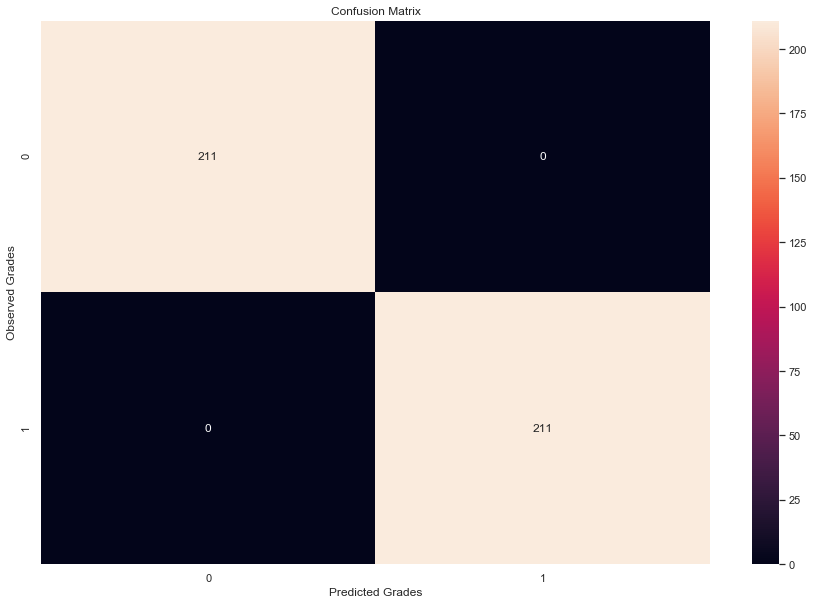

TEST
F1 Score: 0.8396946564885496
ROC: 0.6600512163892445
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.27      0.55      0.36        11
         pay       0.92      0.77      0.84        71

    accuracy                           0.74        82
   macro avg       0.59      0.66      0.60        82
weighted avg       0.83      0.74      0.78        82



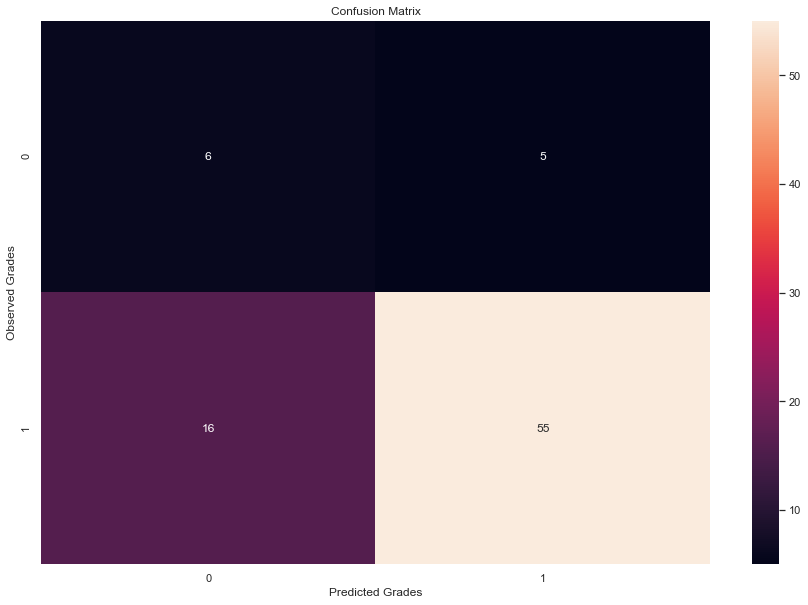

In [1046]:
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Feature Selection
decision_tree_classifier = RFECV(decision_tree_classifier, scoring='roc_auc')

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = decision_tree_classifier.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_dt = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = decision_tree_classifier.predict(X_test) 
dtc_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_dt = f1_score(y_test, predictions_test)
roc_dt = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_dt))
print(f"ROC: {roc_dt}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_dt = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning"></a>

C:\Users\gmend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score: 0.8673297088486688
TRAIN
F1 Score: 0.8975609756097561
ROC: 0.9004739336492892
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.88      0.93      0.90       211
         pay       0.92      0.87      0.90       211

    accuracy                           0.90       422
   macro avg       0.90      0.90      0.90       422
weighted avg       0.90      0.90      0.90       422



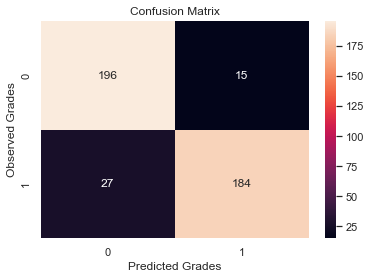

TEST
F1 Score: 0.8613138686131386
ROC: 0.5973111395646606
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.25      0.36      0.30        11
         pay       0.89      0.83      0.86        71

    accuracy                           0.77        82
   macro avg       0.57      0.60      0.58        82
weighted avg       0.81      0.77      0.79        82



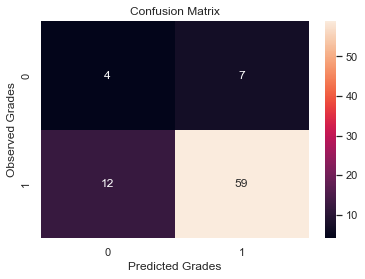

In [91]:
if run_param_tunning:
    parameter_grid = {'criterion': ['gini', 'entropy'],
                    'splitter': ['best', 'random'],
                    'max_depth': range(1, 10),
                    'max_features': range(10,20)}

    # grid_search = GridSearchCV(DecisionTreeClassifier(),
    #                            param_grid=parameter_grid,
    #                            cv=10,
    #                            verbose=4,
    #                            n_jobs=-1)

    dt_classifier = DecisionTreeClassifier(min_samples_leaf = 10)

    dt_grid_search = GridSearchCV(dt_classifier, scoring="precision_weighted", cv=10, param_grid=parameter_grid)
    dt_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(dt_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = dt_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_dt = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = dt_grid_search.predict(X_test) 
    dtc_tun_classification_report = classification_report(y_test, predictions_test, target_names=['not pay', 'pay'])
    f1_dt_tun = f1_score(y_test, predictions_test)
    roc_f1_dt = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_dt_tun))
    print(f"ROC: {roc_f1_dt}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_dt = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## K-Nearest Neighbor <a class="anchor" id="k-nearest-neighbor"></a>

TRAIN
F1 Score: 0.8404255319148937
ROC: 0.8578199052132701
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.79      0.97      0.87       211
         pay       0.96      0.75      0.84       211

    accuracy                           0.86       422
   macro avg       0.88      0.86      0.86       422
weighted avg       0.88      0.86      0.86       422




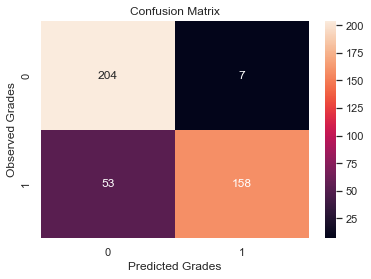

TEST
F1 Score: 0.7479674796747967
ROC: 0.5512163892445583
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.17      0.45      0.24        11
         pay       0.88      0.65      0.75        71

    accuracy                           0.62        82
   macro avg       0.53      0.55      0.50        82
weighted avg       0.79      0.62      0.68        82



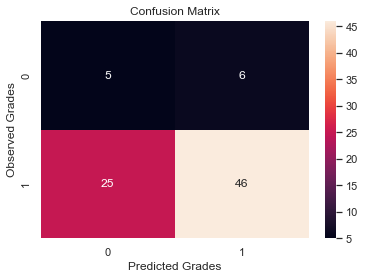

In [92]:
knn = KNeighborsClassifier()

# Feature Selection
# knn = RFECV(knn, scoring='roc_auc')

knn.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = knn.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_knn = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = knn.predict(X_test) 
knn_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_knn = f1_score(y_test, predictions_test)
roc_knn = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_knn))
print(f"ROC: {roc_knn}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_knn = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-2"></a>

Best score: 0.9056534735106163
TRAIN
F1 Score: 1.0
ROC: 1.0
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      1.00      1.00       211
         pay       1.00      1.00      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422



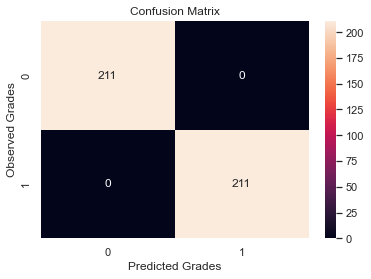

TEST
F1 Score: 0.7716535433070867
ROC: 0.5268886043533931
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.15      0.36      0.22        11
         pay       0.88      0.69      0.77        71

    accuracy                           0.65        82
   macro avg       0.51      0.53      0.49        82
weighted avg       0.78      0.65      0.70        82



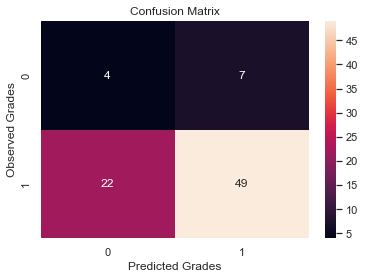

In [93]:
if run_param_tunning:
    # parameter_grid = {'n_neighbors': [5,10,15,20],
    #                   'weights': ['uniform', 'distance'],
    #                   'algorithm': ['ball_tree', 'kd_tree', 'brute']}

    # grid_search = GridSearchCV(KNeighborsClassifier(),
    #                            param_grid=parameter_grid,
    #                            scoring='precision_weighted',
    #                            cv=10,
    #                            n_jobs=3,
    #                            verbose=4)

    knn_classifier = KNeighborsClassifier()

    parameter_grid = {'n_neighbors': [3,5,11,19],
                    'weights': ['uniform','distance'],
                    'p':[1,2],
                    'algorithm':['ball_tree', 'kd_tree', 'brute']}

    knn_grid_search = GridSearchCV(knn_classifier, parameter_grid, scoring="roc_auc", n_jobs=-1, cv=10)
    knn_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(knn_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = knn_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_knn = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = knn_grid_search.predict(X_test) 
    knn_tun_classification_report = classification_report(y_test, predictions_test, target_names=['not pay', 'pay'])
    f1_knn_tun = f1_score(y_test, predictions_test)
    roc_knn_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_knn_tun))
    print(f"ROC: {roc_knn_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_knn = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Support-Vector Machines <a class="anchor" id="support-vector-machines"></a>

TRAIN
F1 Score: 0.68
ROC: 0.6208530805687205
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.69      0.44      0.53       211
         pay       0.59      0.81      0.68       211

    accuracy                           0.62       422
   macro avg       0.64      0.62      0.61       422
weighted avg       0.64      0.62      0.61       422




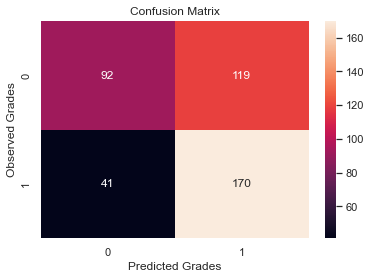

TEST
F1 Score: 0.8235294117647058
ROC: 0.48527528809218945
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.12      0.18      0.14        11
         pay       0.86      0.79      0.82        71

    accuracy                           0.71        82
   macro avg       0.49      0.49      0.48        82
weighted avg       0.76      0.71      0.73        82



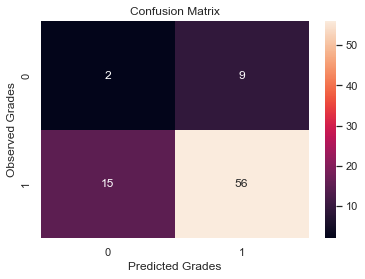

In [94]:
svc = SVC(probability=True)

# Feature Selection
# svc = RFECV(svc, scoring='roc_auc')

svc.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = svc.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_svc = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_svc, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = svc.predict(X_test) 
svm_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_svm = f1_score(y_test, predictions_test)
roc_svm = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_svm))
print(f"ROC: {roc_svm}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_svc = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_svc, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-3"></a>

In [95]:
if run_param_tunning:
    svm_classifier = SVC(probability=True)

    parameter_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

    svm_grid_search = GridSearchCV(svm_classifier, scoring="roc_auc", cv=5, param_grid=parameter_grid, verbose=2, refit=True)
    svm_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(svm_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = svm_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_svm = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_svm, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = svm_grid_search.predict(X_test) 
    svm_tun_classification_report = classification_report(y_test, predictions_test, target_names=['not pay', 'pay'])
    f1_svm_tun = f1_score(y_test, predictions_test)
    roc_svm_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_svm_tun))
    print(f"ROC: {roc_svm_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_svm = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_svm, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s


#### [back](#index)
## Neural Networks <a class="anchor" id="neural-networks"></a>

F1 Score: 0.8951048951048951
ROC: 0.5870678617157491
              precision    recall  f1-score   support

        -1.0       0.30      0.27      0.29        11
         1.0       0.89      0.90      0.90        71

    accuracy                           0.82        82
   macro avg       0.59      0.59      0.59        82
weighted avg       0.81      0.82      0.81        82



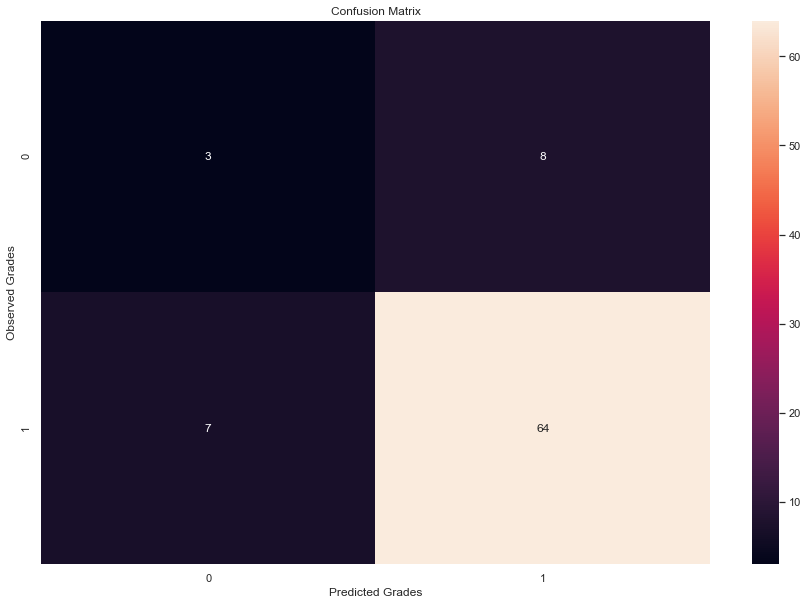

In [458]:
scaler = StandardScaler()

# Feature Selection
#scaler = RFECV(scaler, scoring='roc_auc')

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_nn = scaler.transform(X_train)
X_test_nn = scaler.transform(X_test)

# Create the classifier
ANNClassifier = MLPClassifier(random_state=1, max_iter=500)

# Train the classifier on the training set
ANNClassifier.fit(X_train_nn, y_train)

predictions_test = ANNClassifier.predict(X_test_nn)

f1_nn = f1_score(y_test, predictions_test)
roc_nn = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_nn))
print(f"ROC: {roc_nn}")

confusion_matrix_ann = confusion_matrix(y_test,predictions_test)

nn_classification_report = classification_report(y_test, predictions_test, output_dict=True)
print(classification_report(y_test,predictions_test))

sb.set(font_scale=1.0)

ax = plt.subplot()

sb.heatmap(confusion_matrix_ann, annot=True, ax=ax, fmt="g")

ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

best_nn_classification_report = nn_classification_report

### Parameter Tunning <a class="anchor" id="parameter-tunning-4"></a>

Iteration 1, loss = 0.86899537
Iteration 2, loss = 0.85821799
Iteration 3, loss = 0.85769236
Iteration 4, loss = 0.85714930
Iteration 5, loss = 0.85657223
Iteration 6, loss = 0.85806653
Iteration 7, loss = 0.85944699
Iteration 8, loss = 0.85598732
Iteration 9, loss = 0.85543915
Iteration 10, loss = 0.85492260
Iteration 11, loss = 0.85237353
Iteration 12, loss = 0.85184498
Iteration 13, loss = 0.85072451
Iteration 14, loss = 0.85073047
Iteration 15, loss = 0.85019999
Iteration 16, loss = 0.84717310
Iteration 17, loss = 0.84523594
Iteration 18, loss = 0.84186629
Iteration 19, loss = 0.83946600
Iteration 20, loss = 0.83803159
Iteration 21, loss = 0.83277731
Iteration 22, loss = 0.83362314
Iteration 23, loss = 0.83131463
Iteration 24, loss = 0.83088465
Iteration 25, loss = 0.82854430
Iteration 26, loss = 0.82624481
Iteration 27, loss = 0.82394317
Iteration 28, loss = 0.82350516
Iteration 29, loss = 0.82306925
Iteration 30, loss = 0.82266388
Iteration 31, loss = 0.82224236
Iteration 32, los

Iteration 326, loss = 0.72214124
Iteration 327, loss = 0.72203675
Iteration 328, loss = 0.72192681
Iteration 329, loss = 0.72181794
Iteration 330, loss = 0.72173864
Iteration 331, loss = 0.72161551
Iteration 332, loss = 0.72150696
Iteration 333, loss = 0.72140503
Iteration 334, loss = 0.72130854
Iteration 335, loss = 0.72118794
Iteration 336, loss = 0.72108744
Iteration 337, loss = 0.72099091
Iteration 338, loss = 0.72088724
Iteration 339, loss = 0.72077862
Iteration 340, loss = 0.72067396
Iteration 341, loss = 0.72059582
Iteration 342, loss = 0.72046117
Iteration 343, loss = 0.72037243
Iteration 344, loss = 0.72027710
Iteration 345, loss = 0.72017619
Iteration 346, loss = 0.72007471
Iteration 347, loss = 0.71997534
Iteration 348, loss = 0.71987110
Iteration 349, loss = 0.71977861
Iteration 350, loss = 0.71967268
Iteration 351, loss = 0.71957042
Iteration 352, loss = 0.71947991
Iteration 353, loss = 0.71938432
Iteration 354, loss = 0.71929015
Iteration 355, loss = 0.71919778
Iteration 

Iteration 261, loss = 0.73244812
Iteration 262, loss = 0.73221841
Iteration 263, loss = 0.73199560
Iteration 264, loss = 0.73177749
Iteration 265, loss = 0.73154627
Iteration 266, loss = 0.73131582
Iteration 267, loss = 0.73112766
Iteration 268, loss = 0.73090505
Iteration 269, loss = 0.73067089
Iteration 270, loss = 0.73044529
Iteration 271, loss = 0.73023262
Iteration 272, loss = 0.73001023
Iteration 273, loss = 0.72981097
Iteration 274, loss = 0.72961533
Iteration 275, loss = 0.72937721
Iteration 276, loss = 0.72916799
Iteration 277, loss = 0.72895190
Iteration 278, loss = 0.72873395
Iteration 279, loss = 0.72853313
Iteration 280, loss = 0.72831082
Iteration 281, loss = 0.72810643
Iteration 282, loss = 0.72790236
Iteration 283, loss = 0.72769498
Iteration 284, loss = 0.72750742
Iteration 285, loss = 0.72727542
Iteration 286, loss = 0.72708805
Iteration 287, loss = 0.72689239
Iteration 288, loss = 0.72666258
Iteration 289, loss = 0.72648388
Iteration 290, loss = 0.72626081
Iteration 

Iteration 36, loss = 0.81165247
Iteration 37, loss = 0.81126086
Iteration 38, loss = 0.81085551
Iteration 39, loss = 0.81044677
Iteration 40, loss = 0.80824748
Iteration 41, loss = 0.80044596
Iteration 42, loss = 0.80551203
Iteration 43, loss = 0.80140591
Iteration 44, loss = 0.80106423
Iteration 45, loss = 0.80063138
Iteration 46, loss = 0.80029289
Iteration 47, loss = 0.79992977
Iteration 48, loss = 0.79950139
Iteration 49, loss = 0.80104199
Iteration 50, loss = 0.80068871
Iteration 51, loss = 0.80025623
Iteration 52, loss = 0.80177518
Iteration 53, loss = 0.80140566
Iteration 54, loss = 0.80292155
Iteration 55, loss = 0.80249728
Iteration 56, loss = 0.80030168
Iteration 57, loss = 0.79988680
Iteration 58, loss = 0.79953787
Iteration 59, loss = 0.79911547
Iteration 60, loss = 0.79870859
Iteration 61, loss = 0.79836537
Iteration 62, loss = 0.79796015
Iteration 63, loss = 0.79757289
Iteration 64, loss = 0.79721880
Iteration 65, loss = 0.79681492
Iteration 66, loss = 0.79641440
Iteratio

Iteration 319, loss = 0.72410802
Iteration 320, loss = 0.72398246
Iteration 321, loss = 0.72385956
Iteration 322, loss = 0.72373045
Iteration 323, loss = 0.72360257
Iteration 324, loss = 0.72349625
Iteration 325, loss = 0.72335425
Iteration 326, loss = 0.72323451
Iteration 327, loss = 0.72311299
Iteration 328, loss = 0.72299938
Iteration 329, loss = 0.72289416
Iteration 330, loss = 0.72274610
Iteration 331, loss = 0.72262806
Iteration 332, loss = 0.72251743
Iteration 333, loss = 0.72239330
Iteration 334, loss = 0.72229287
Iteration 335, loss = 0.72215466
Iteration 336, loss = 0.72204375
Iteration 337, loss = 0.72192839
Iteration 338, loss = 0.72180937
Iteration 339, loss = 0.72170205
Iteration 340, loss = 0.72158708
Iteration 341, loss = 0.72144958
Iteration 342, loss = 0.72135041
Iteration 343, loss = 0.72122275
Iteration 344, loss = 0.72111396
Iteration 345, loss = 0.72099296
Iteration 346, loss = 0.72087370
Iteration 347, loss = 0.72077054
Iteration 348, loss = 0.72065618
Iteration 

Iteration 183, loss = 0.72723031
Iteration 184, loss = 0.72708950
Iteration 185, loss = 0.72693074
Iteration 186, loss = 0.72678432
Iteration 187, loss = 0.72663711
Iteration 188, loss = 0.72650595
Iteration 189, loss = 0.72635807
Iteration 190, loss = 0.72620324
Iteration 191, loss = 0.72606909
Iteration 192, loss = 0.72592486
Iteration 193, loss = 0.72576330
Iteration 194, loss = 0.72564184
Iteration 195, loss = 0.72549439
Iteration 196, loss = 0.72535478
Iteration 197, loss = 0.72521366
Iteration 198, loss = 0.72507260
Iteration 199, loss = 0.72492797
Iteration 200, loss = 0.72478379
Iteration 201, loss = 0.72465077
Iteration 202, loss = 0.72450462
Iteration 203, loss = 0.72438138
Iteration 204, loss = 0.72423999
Iteration 205, loss = 0.72410090
Iteration 206, loss = 0.72394872
Iteration 207, loss = 0.72380919
Iteration 208, loss = 0.72369518
Iteration 209, loss = 0.72355404
Iteration 210, loss = 0.72341535
Iteration 211, loss = 0.72327807
Iteration 212, loss = 0.72314641
Iteration 

Iteration 61, loss = 0.79633435
Iteration 62, loss = 0.79862029
Iteration 63, loss = 0.80006387
Iteration 64, loss = 0.79786501
Iteration 65, loss = 0.79747253
Iteration 66, loss = 0.79709779
Iteration 67, loss = 0.79668054
Iteration 68, loss = 0.79711915
Iteration 69, loss = 0.79674364
Iteration 70, loss = 0.79631351
Iteration 71, loss = 0.79596231
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.84589962
Iteration 2, loss = 0.83519116
Iteration 3, loss = 0.82756927
Iteration 4, loss = 0.82706575
Iteration 5, loss = 0.82658349
Iteration 6, loss = 0.82808910
Iteration 7, loss = 0.82955486
Iteration 8, loss = 0.82908478
Iteration 9, loss = 0.82857752
Iteration 10, loss = 0.82667857
Iteration 11, loss = 0.82812918
Iteration 12, loss = 0.82620726
Iteration 13, loss = 0.82578904
Iteration 14, loss = 0.82724388
Iteration 15, loss = 0.82622421
Iteration 16, loss = 0.82766329
Iteration 17, loss = 0.82720586
Iteration 18, loss = 0.

Iteration 371, loss = 0.71920010
Iteration 372, loss = 0.71906740
Iteration 373, loss = 0.71895221
Iteration 374, loss = 0.71880406
Iteration 375, loss = 0.71867928
Iteration 376, loss = 0.71853432
Iteration 377, loss = 0.71843691
Iteration 378, loss = 0.71829219
Iteration 379, loss = 0.71815463
Iteration 380, loss = 0.71803551
Iteration 381, loss = 0.71791785
Iteration 382, loss = 0.71778454
Iteration 383, loss = 0.71764147
Iteration 384, loss = 0.71753391
Iteration 385, loss = 0.71741264
Iteration 386, loss = 0.71728565
Iteration 387, loss = 0.71714286
Iteration 388, loss = 0.71703225
Iteration 389, loss = 0.71690691
Iteration 390, loss = 0.71680633
Iteration 391, loss = 0.71666257
Iteration 392, loss = 0.71655070
Iteration 393, loss = 0.71644596
Iteration 394, loss = 0.71631266
Iteration 395, loss = 0.71617913
Iteration 396, loss = 0.71606217
Iteration 397, loss = 0.71595850
Iteration 398, loss = 0.71583530
Iteration 399, loss = 0.71571711
Iteration 400, loss = 0.71559924
Iteration 

Iteration 164, loss = 0.78182991
Iteration 165, loss = 0.78145024
Iteration 166, loss = 0.78107108
Iteration 167, loss = 0.78071804
Iteration 168, loss = 0.78034532
Iteration 169, loss = 0.77997238
Iteration 170, loss = 0.77960512
Iteration 171, loss = 0.77923123
Iteration 172, loss = 0.77887344
Iteration 173, loss = 0.77848211
Iteration 174, loss = 0.77812604
Iteration 175, loss = 0.77777914
Iteration 176, loss = 0.77743414
Iteration 177, loss = 0.77706301
Iteration 178, loss = 0.77670242
Iteration 179, loss = 0.77633501
Iteration 180, loss = 0.77598992
Iteration 181, loss = 0.77563396
Iteration 182, loss = 0.77528454
Iteration 183, loss = 0.77493273
Iteration 184, loss = 0.77460696
Iteration 185, loss = 0.77423318
Iteration 186, loss = 0.77390806
Iteration 187, loss = 0.77355749
Iteration 188, loss = 0.77322260
Iteration 189, loss = 0.77287898
Iteration 190, loss = 0.77252256
Iteration 191, loss = 0.77219265
Iteration 192, loss = 0.77183908
Iteration 193, loss = 0.77150220
Iteration 

Iteration 450, loss = 0.71765545
Iteration 451, loss = 0.71754570
Iteration 452, loss = 0.71740905
Iteration 453, loss = 0.71729574
Iteration 454, loss = 0.71718506
Iteration 455, loss = 0.71705266
Iteration 456, loss = 0.71693564
Iteration 457, loss = 0.71681462
Iteration 458, loss = 0.71670502
Iteration 459, loss = 0.71658469
Iteration 460, loss = 0.71647147
Iteration 461, loss = 0.71635950
Iteration 462, loss = 0.71623808
Iteration 463, loss = 0.71611733
Iteration 464, loss = 0.71600791
Iteration 465, loss = 0.71589293
Iteration 466, loss = 0.71577836
Iteration 467, loss = 0.71566823
Iteration 468, loss = 0.71556274
Iteration 469, loss = 0.71543366
Iteration 470, loss = 0.71532188
Iteration 471, loss = 0.71521457
Iteration 472, loss = 0.71510547
Iteration 473, loss = 0.71498937
Iteration 474, loss = 0.71490229
Iteration 475, loss = 0.71477890
Iteration 476, loss = 0.71465528
Iteration 477, loss = 0.71456422
Iteration 478, loss = 0.71443864
Iteration 479, loss = 0.71435137
Iteration 

Iteration 267, loss = 0.74981700
Iteration 268, loss = 0.74955850
Iteration 269, loss = 0.74926886
Iteration 270, loss = 0.74900386
Iteration 271, loss = 0.74875739
Iteration 272, loss = 0.74848361
Iteration 273, loss = 0.74823266
Iteration 274, loss = 0.74799035
Iteration 275, loss = 0.74771233
Iteration 276, loss = 0.74745818
Iteration 277, loss = 0.74719936
Iteration 278, loss = 0.74694508
Iteration 279, loss = 0.74668586
Iteration 280, loss = 0.74643566
Iteration 281, loss = 0.74618401
Iteration 282, loss = 0.74593395
Iteration 283, loss = 0.74568528
Iteration 284, loss = 0.74545322
Iteration 285, loss = 0.74518169
Iteration 286, loss = 0.74494795
Iteration 287, loss = 0.74472022
Iteration 288, loss = 0.74444411
Iteration 289, loss = 0.74422219
Iteration 290, loss = 0.74397133
Iteration 291, loss = 0.74371719
Iteration 292, loss = 0.74348616
Iteration 293, loss = 0.74325460
Iteration 294, loss = 0.74302547
Iteration 295, loss = 0.74275342
Iteration 296, loss = 0.74254805
Iteration 

Iteration 69, loss = 0.80331841
Iteration 70, loss = 0.80280897
Iteration 71, loss = 0.80235931
Iteration 72, loss = 0.80188200
Iteration 73, loss = 0.80142788
Iteration 74, loss = 0.80097984
Iteration 75, loss = 0.80052506
Iteration 76, loss = 0.80001895
Iteration 77, loss = 0.79962041
Iteration 78, loss = 0.79914851
Iteration 79, loss = 0.79869895
Iteration 80, loss = 0.79825151
Iteration 81, loss = 0.79781040
Iteration 82, loss = 0.79734247
Iteration 83, loss = 0.79691300
Iteration 84, loss = 0.79652714
Iteration 85, loss = 0.79604827
Iteration 86, loss = 0.79563435
Iteration 87, loss = 0.79516638
Iteration 88, loss = 0.79475996
Iteration 89, loss = 0.79430727
Iteration 90, loss = 0.79392596
Iteration 91, loss = 0.79347739
Iteration 92, loss = 0.79306153
Iteration 93, loss = 0.79263561
Iteration 94, loss = 0.79222718
Iteration 95, loss = 0.79179618
Iteration 96, loss = 0.79138359
Iteration 97, loss = 0.79101462
Iteration 98, loss = 0.79055604
Iteration 99, loss = 0.79017858
Iteratio

Iteration 427, loss = 0.71802366
Iteration 428, loss = 0.71790322
Iteration 429, loss = 0.71781426
Iteration 430, loss = 0.71769482
Iteration 431, loss = 0.71759277
Iteration 432, loss = 0.71749330
Iteration 433, loss = 0.71737368
Iteration 434, loss = 0.71728513
Iteration 435, loss = 0.71717612
Iteration 436, loss = 0.71706488
Iteration 437, loss = 0.71697146
Iteration 438, loss = 0.71687285
Iteration 439, loss = 0.71676029
Iteration 440, loss = 0.71665939
Iteration 441, loss = 0.71656591
Iteration 442, loss = 0.71645847
Iteration 443, loss = 0.71635798
Iteration 444, loss = 0.71625220
Iteration 445, loss = 0.71615250
Iteration 446, loss = 0.71606987
Iteration 447, loss = 0.71595895
Iteration 448, loss = 0.71586904
Iteration 449, loss = 0.71576307
Iteration 450, loss = 0.71567281
Iteration 451, loss = 0.71556052
Iteration 452, loss = 0.71545862
Iteration 453, loss = 0.71537351
Iteration 454, loss = 0.71527645
Iteration 455, loss = 0.71519454
Iteration 456, loss = 0.71508106
Iteration 

Iteration 230, loss = 0.75837196
Iteration 231, loss = 0.75812020
Iteration 232, loss = 0.75783969
Iteration 233, loss = 0.75756217
Iteration 234, loss = 0.75729862
Iteration 235, loss = 0.75705152
Iteration 236, loss = 0.75678677
Iteration 237, loss = 0.75649039
Iteration 238, loss = 0.75621917
Iteration 239, loss = 0.75595487
Iteration 240, loss = 0.75571244
Iteration 241, loss = 0.75544204
Iteration 242, loss = 0.75517934
Iteration 243, loss = 0.75493461
Iteration 244, loss = 0.75467232
Iteration 245, loss = 0.75440313
Iteration 246, loss = 0.75415033
Iteration 247, loss = 0.75389003
Iteration 248, loss = 0.75363846
Iteration 249, loss = 0.75337244
Iteration 250, loss = 0.75314431
Iteration 251, loss = 0.75289284
Iteration 252, loss = 0.75263073
Iteration 253, loss = 0.75237288
Iteration 254, loss = 0.75212968
Iteration 255, loss = 0.75188175
Iteration 256, loss = 0.75163949
Iteration 257, loss = 0.75139042
Iteration 258, loss = 0.75114374
Iteration 259, loss = 0.75091816
Iteration 

Iteration 52, loss = 0.83508511
Iteration 53, loss = 0.83444987
Iteration 54, loss = 0.83387108
Iteration 55, loss = 0.83329105
Iteration 56, loss = 0.83264461
Iteration 57, loss = 0.83204086
Iteration 58, loss = 0.83145879
Iteration 59, loss = 0.83085522
Iteration 60, loss = 0.83025256
Iteration 61, loss = 0.82974689
Iteration 62, loss = 0.82912293
Iteration 63, loss = 0.82855087
Iteration 64, loss = 0.82796348
Iteration 65, loss = 0.82738860
Iteration 66, loss = 0.82680732
Iteration 67, loss = 0.82623719
Iteration 68, loss = 0.82566244
Iteration 69, loss = 0.82511013
Iteration 70, loss = 0.82457573
Iteration 71, loss = 0.82402163
Iteration 72, loss = 0.82345490
Iteration 73, loss = 0.82290277
Iteration 74, loss = 0.82237882
Iteration 75, loss = 0.82179657
Iteration 76, loss = 0.82125497
Iteration 77, loss = 0.82072295
Iteration 78, loss = 0.82018449
Iteration 79, loss = 0.81963725
Iteration 80, loss = 0.81909152
Iteration 81, loss = 0.81859222
Iteration 82, loss = 0.81804977
Iteratio

Iteration 348, loss = 0.73380734
Iteration 349, loss = 0.73361374
Iteration 350, loss = 0.73344541
Iteration 351, loss = 0.73325910
Iteration 352, loss = 0.73309044
Iteration 353, loss = 0.73292662
Iteration 354, loss = 0.73273851
Iteration 355, loss = 0.73256950
Iteration 356, loss = 0.73239234
Iteration 357, loss = 0.73222114
Iteration 358, loss = 0.73204015
Iteration 359, loss = 0.73187756
Iteration 360, loss = 0.73171656
Iteration 361, loss = 0.73151930
Iteration 362, loss = 0.73136763
Iteration 363, loss = 0.73121346
Iteration 364, loss = 0.73102069
Iteration 365, loss = 0.73085631
Iteration 366, loss = 0.73070261
Iteration 367, loss = 0.73052106
Iteration 368, loss = 0.73035401
Iteration 369, loss = 0.73018809
Iteration 370, loss = 0.73003259
Iteration 371, loss = 0.72986194
Iteration 372, loss = 0.72970813
Iteration 373, loss = 0.72955731
Iteration 374, loss = 0.72937969
Iteration 375, loss = 0.72922064
Iteration 376, loss = 0.72904929
Iteration 377, loss = 0.72889908
Iteration 

Iteration 162, loss = 0.78012103
Iteration 163, loss = 0.77979658
Iteration 164, loss = 0.77940656
Iteration 165, loss = 0.77907463
Iteration 166, loss = 0.77872921
Iteration 167, loss = 0.77840310
Iteration 168, loss = 0.77806907
Iteration 169, loss = 0.77770407
Iteration 170, loss = 0.77735988
Iteration 171, loss = 0.77701642
Iteration 172, loss = 0.77667948
Iteration 173, loss = 0.77635213
Iteration 174, loss = 0.77601140
Iteration 175, loss = 0.77567617
Iteration 176, loss = 0.77534791
Iteration 177, loss = 0.77501850
Iteration 178, loss = 0.77468693
Iteration 179, loss = 0.77436565
Iteration 180, loss = 0.77403802
Iteration 181, loss = 0.77371386
Iteration 182, loss = 0.77337488
Iteration 183, loss = 0.77307631
Iteration 184, loss = 0.77274379
Iteration 185, loss = 0.77241475
Iteration 186, loss = 0.77209871
Iteration 187, loss = 0.77177556
Iteration 188, loss = 0.77147578
Iteration 189, loss = 0.77117003
Iteration 190, loss = 0.77084569
Iteration 191, loss = 0.77053364
Iteration 

Iteration 2, loss = 0.85928997
Iteration 3, loss = 0.85898377
Iteration 4, loss = 0.85858198
Iteration 5, loss = 0.85812056
Iteration 6, loss = 0.85761506
Iteration 7, loss = 0.85703297
Iteration 8, loss = 0.85652725
Iteration 9, loss = 0.85589571
Iteration 10, loss = 0.85517009
Iteration 11, loss = 0.85453344
Iteration 12, loss = 0.85390508
Iteration 13, loss = 0.85326366
Iteration 14, loss = 0.85252929
Iteration 15, loss = 0.85184759
Iteration 16, loss = 0.85116875
Iteration 17, loss = 0.85046958
Iteration 18, loss = 0.84979539
Iteration 19, loss = 0.84910468
Iteration 20, loss = 0.84840420
Iteration 21, loss = 0.84769898
Iteration 22, loss = 0.84702860
Iteration 23, loss = 0.84635645
Iteration 24, loss = 0.84571069
Iteration 25, loss = 0.84499274
Iteration 26, loss = 0.84431623
Iteration 27, loss = 0.84363947
Iteration 28, loss = 0.84303214
Iteration 29, loss = 0.84233102
Iteration 30, loss = 0.84168552
Iteration 31, loss = 0.84101370
Iteration 32, loss = 0.84035848
Iteration 33, lo

Iteration 355, loss = 0.73213260
Iteration 356, loss = 0.73197864
Iteration 357, loss = 0.73182479
Iteration 358, loss = 0.73164546
Iteration 359, loss = 0.73148891
Iteration 360, loss = 0.73132821
Iteration 361, loss = 0.73117624
Iteration 362, loss = 0.73101407
Iteration 363, loss = 0.73086942
Iteration 364, loss = 0.73068997
Iteration 365, loss = 0.73054891
Iteration 366, loss = 0.73038792
Iteration 367, loss = 0.73023068
Iteration 368, loss = 0.73009327
Iteration 369, loss = 0.72993736
Iteration 370, loss = 0.72978133
Iteration 371, loss = 0.72961223
Iteration 372, loss = 0.72947883
Iteration 373, loss = 0.72932408
Iteration 374, loss = 0.72916140
Iteration 375, loss = 0.72902948
Iteration 376, loss = 0.72886525
Iteration 377, loss = 0.72873179
Iteration 378, loss = 0.72856951
Iteration 379, loss = 0.72841818
Iteration 380, loss = 0.72827276
Iteration 381, loss = 0.72813337
Iteration 382, loss = 0.72797803
Iteration 383, loss = 0.72784359
Iteration 384, loss = 0.72770468
Iteration 

Iteration 204, loss = 0.76461935
Iteration 205, loss = 0.76428289
Iteration 206, loss = 0.76397939
Iteration 207, loss = 0.76366193
Iteration 208, loss = 0.76334888
Iteration 209, loss = 0.76302311
Iteration 210, loss = 0.76272159
Iteration 211, loss = 0.76239445
Iteration 212, loss = 0.76208030
Iteration 213, loss = 0.76176107
Iteration 214, loss = 0.76146815
Iteration 215, loss = 0.76115200
Iteration 216, loss = 0.76084234
Iteration 217, loss = 0.76054953
Iteration 218, loss = 0.76023564
Iteration 219, loss = 0.75993844
Iteration 220, loss = 0.75962652
Iteration 221, loss = 0.75932736
Iteration 222, loss = 0.75904240
Iteration 223, loss = 0.75874751
Iteration 224, loss = 0.75842958
Iteration 225, loss = 0.75812733
Iteration 226, loss = 0.75783090
Iteration 227, loss = 0.75756448
Iteration 228, loss = 0.75724488
Iteration 229, loss = 0.75695603
Iteration 230, loss = 0.75667278
Iteration 231, loss = 0.75639280
Iteration 232, loss = 0.75609049
Iteration 233, loss = 0.75583171
Iteration 

Iteration 491, loss = 0.70997345
Iteration 492, loss = 0.70987351
Iteration 493, loss = 0.70977518
Iteration 494, loss = 0.70968044
Iteration 495, loss = 0.70957045
Iteration 496, loss = 0.70947129
Iteration 497, loss = 0.70937857
Iteration 498, loss = 0.70927934
Iteration 499, loss = 0.70917987
Iteration 500, loss = 0.70907391
Iteration 1, loss = 0.84505399
Iteration 2, loss = 0.84487946
Iteration 3, loss = 0.84457998
Iteration 4, loss = 0.84421747
Iteration 5, loss = 0.84378430
Iteration 6, loss = 0.84331733
Iteration 7, loss = 0.84280655
Iteration 8, loss = 0.84226522
Iteration 9, loss = 0.84168285
Iteration 10, loss = 0.84108596
Iteration 11, loss = 0.84047944
Iteration 12, loss = 0.83985251
Iteration 13, loss = 0.83927195
Iteration 14, loss = 0.83860427
Iteration 15, loss = 0.83800060
Iteration 16, loss = 0.83733455
Iteration 17, loss = 0.83670409
Iteration 18, loss = 0.83605299
Iteration 19, loss = 0.83545340
Iteration 20, loss = 0.83478465
Iteration 21, loss = 0.83415715
Iterati

Iteration 334, loss = 0.73236061
Iteration 335, loss = 0.73220134
Iteration 336, loss = 0.73203977
Iteration 337, loss = 0.73188169
Iteration 338, loss = 0.73171645
Iteration 339, loss = 0.73158273
Iteration 340, loss = 0.73142748
Iteration 341, loss = 0.73126803
Iteration 342, loss = 0.73111106
Iteration 343, loss = 0.73096953
Iteration 344, loss = 0.73081645
Iteration 345, loss = 0.73064645
Iteration 346, loss = 0.73052118
Iteration 347, loss = 0.73034443
Iteration 348, loss = 0.73020293
Iteration 349, loss = 0.73005963
Iteration 350, loss = 0.72991239
Iteration 351, loss = 0.72975936
Iteration 352, loss = 0.72960182
Iteration 353, loss = 0.72947735
Iteration 354, loss = 0.72932341
Iteration 355, loss = 0.72919162
Iteration 356, loss = 0.72905278
Iteration 357, loss = 0.72887310
Iteration 358, loss = 0.72874064
Iteration 359, loss = 0.72860286
Iteration 360, loss = 0.72846611
Iteration 361, loss = 0.72830682
Iteration 362, loss = 0.72817413
Iteration 363, loss = 0.72804495
Iteration 

Iteration 157, loss = 0.77836717
Iteration 158, loss = 0.77804083
Iteration 159, loss = 0.77772316
Iteration 160, loss = 0.77736698
Iteration 161, loss = 0.77701943
Iteration 162, loss = 0.77669192
Iteration 163, loss = 0.77635686
Iteration 164, loss = 0.77603551
Iteration 165, loss = 0.77568889
Iteration 166, loss = 0.77536108
Iteration 167, loss = 0.77505278
Iteration 168, loss = 0.77472184
Iteration 169, loss = 0.77437618
Iteration 170, loss = 0.77407481
Iteration 171, loss = 0.77374215
Iteration 172, loss = 0.77340512
Iteration 173, loss = 0.77311197
Iteration 174, loss = 0.77278025
Iteration 175, loss = 0.77246334
Iteration 176, loss = 0.77213824
Iteration 177, loss = 0.77181464
Iteration 178, loss = 0.77151262
Iteration 179, loss = 0.77121423
Iteration 180, loss = 0.77091406
Iteration 181, loss = 0.77058039
Iteration 182, loss = 0.77025769
Iteration 183, loss = 0.76996863
Iteration 184, loss = 0.76965832
Iteration 185, loss = 0.76935242
Iteration 186, loss = 0.76904452
Iteration 

Iteration 485, loss = 0.71572043
Iteration 486, loss = 0.71564236
Iteration 487, loss = 0.71553446
Iteration 488, loss = 0.71543732
Iteration 489, loss = 0.71534514
Iteration 490, loss = 0.71525709
Iteration 491, loss = 0.71516612
Iteration 492, loss = 0.71507751
Iteration 493, loss = 0.71498104
Iteration 494, loss = 0.71489386
Iteration 495, loss = 0.71480093
Iteration 496, loss = 0.71470322
Iteration 497, loss = 0.71461218
Iteration 498, loss = 0.71452358
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.77743125
Iteration 2, loss = 0.77658649
Iteration 3, loss = 0.77288201
Iteration 4, loss = 0.77203076
Iteration 5, loss = 0.76710902
Iteration 6, loss = 0.76874664
Iteration 7, loss = 0.77026559
Iteration 8, loss = 0.76573916
Iteration 9, loss = 0.76701040
Iteration 10, loss = 0.76625991
Iteration 11, loss = 0.76217330
Iteration 12, loss = 0.76032814
Iteration 13, loss = 0.75777531
Iteration 14, loss = 0.75518187
Iteration

Iteration 325, loss = 0.66394235
Iteration 326, loss = 0.66384736
Iteration 327, loss = 0.66372492
Iteration 328, loss = 0.66363525
Iteration 329, loss = 0.66351412
Iteration 330, loss = 0.66343357
Iteration 331, loss = 0.66333506
Iteration 332, loss = 0.66320835
Iteration 333, loss = 0.66311446
Iteration 334, loss = 0.66301288
Iteration 335, loss = 0.66291966
Iteration 336, loss = 0.66281713
Iteration 337, loss = 0.66270908
Iteration 338, loss = 0.66262140
Iteration 339, loss = 0.66253606
Iteration 340, loss = 0.66242567
Iteration 341, loss = 0.66232769
Iteration 342, loss = 0.66222612
Iteration 343, loss = 0.66214926
Iteration 344, loss = 0.66205984
Iteration 345, loss = 0.66194575
Iteration 346, loss = 0.66186217
Iteration 347, loss = 0.66179301
Iteration 348, loss = 0.66167617
Iteration 349, loss = 0.66158994
Iteration 350, loss = 0.66150168
Iteration 351, loss = 0.66141526
Iteration 352, loss = 0.66131574
Iteration 353, loss = 0.66122946
Iteration 354, loss = 0.66114531
Iteration 

Iteration 26, loss = 0.75975616
Iteration 27, loss = 0.75917485
Iteration 28, loss = 0.75848830
Iteration 29, loss = 0.75782084
Iteration 30, loss = 0.75598538
Iteration 31, loss = 0.75485595
Iteration 32, loss = 0.75288475
Iteration 33, loss = 0.75355247
Iteration 34, loss = 0.75323715
Iteration 35, loss = 0.75118086
Iteration 36, loss = 0.75115746
Iteration 37, loss = 0.74883096
Iteration 38, loss = 0.75153899
Iteration 39, loss = 0.75149470
Iteration 40, loss = 0.75044559
Iteration 41, loss = 0.75088103
Iteration 42, loss = 0.75029313
Iteration 43, loss = 0.75167800
Iteration 44, loss = 0.75058684
Iteration 45, loss = 0.75003868
Iteration 46, loss = 0.74951695
Iteration 47, loss = 0.74843191
Iteration 48, loss = 0.75052122
Iteration 49, loss = 0.74766467
Iteration 50, loss = 0.74436298
Iteration 51, loss = 0.74509632
Iteration 52, loss = 0.74280131
Iteration 53, loss = 0.74174009
Iteration 54, loss = 0.74397465
Iteration 55, loss = 0.74521114
Iteration 56, loss = 0.74468056
Iteratio

Iteration 298, loss = 0.66731930
Iteration 299, loss = 0.66715279
Iteration 300, loss = 0.66701122
Iteration 301, loss = 0.66687943
Iteration 302, loss = 0.66671311
Iteration 303, loss = 0.66655843
Iteration 304, loss = 0.66641359
Iteration 305, loss = 0.66625649
Iteration 306, loss = 0.66612275
Iteration 307, loss = 0.66597848
Iteration 308, loss = 0.66583215
Iteration 309, loss = 0.66569666
Iteration 310, loss = 0.66554748
Iteration 311, loss = 0.66541030
Iteration 312, loss = 0.66525638
Iteration 313, loss = 0.66511297
Iteration 314, loss = 0.66498589
Iteration 315, loss = 0.66484912
Iteration 316, loss = 0.66471487
Iteration 317, loss = 0.66455779
Iteration 318, loss = 0.66444343
Iteration 319, loss = 0.66428791
Iteration 320, loss = 0.66417052
Iteration 321, loss = 0.66404012
Iteration 322, loss = 0.66391457
Iteration 323, loss = 0.66375646
Iteration 324, loss = 0.66363460
Iteration 325, loss = 0.66350345
Iteration 326, loss = 0.66337991
Iteration 327, loss = 0.66323335
Iteration 

Iteration 158, loss = 0.68648898
Iteration 159, loss = 0.68619082
Iteration 160, loss = 0.68589756
Iteration 161, loss = 0.68564707
Iteration 162, loss = 0.68535855
Iteration 163, loss = 0.68509632
Iteration 164, loss = 0.68482672
Iteration 165, loss = 0.68455083
Iteration 166, loss = 0.68429717
Iteration 167, loss = 0.68401907
Iteration 168, loss = 0.68375044
Iteration 169, loss = 0.68349227
Iteration 170, loss = 0.68323729
Iteration 171, loss = 0.68300271
Iteration 172, loss = 0.68273838
Iteration 173, loss = 0.68250316
Iteration 174, loss = 0.68225120
Iteration 175, loss = 0.68198877
Iteration 176, loss = 0.68177624
Iteration 177, loss = 0.68152102
Iteration 178, loss = 0.68127314
Iteration 179, loss = 0.68103452
Iteration 180, loss = 0.68081477
Iteration 181, loss = 0.68059379
Iteration 182, loss = 0.68034111
Iteration 183, loss = 0.68012261
Iteration 184, loss = 0.67988222
Iteration 185, loss = 0.67968444
Iteration 186, loss = 0.67944698
Iteration 187, loss = 0.67922607
Iteration 

Iteration 134, loss = 0.69719563
Iteration 135, loss = 0.69686512
Iteration 136, loss = 0.69654604
Iteration 137, loss = 0.69622514
Iteration 138, loss = 0.69590863
Iteration 139, loss = 0.69557891
Iteration 140, loss = 0.69526547
Iteration 141, loss = 0.69498417
Iteration 142, loss = 0.69467833
Iteration 143, loss = 0.69437027
Iteration 144, loss = 0.69405702
Iteration 145, loss = 0.69376587
Iteration 146, loss = 0.69347486
Iteration 147, loss = 0.69318617
Iteration 148, loss = 0.69289665
Iteration 149, loss = 0.69258064
Iteration 150, loss = 0.69231104
Iteration 151, loss = 0.69204767
Iteration 152, loss = 0.69174342
Iteration 153, loss = 0.69147671
Iteration 154, loss = 0.69119562
Iteration 155, loss = 0.69093372
Iteration 156, loss = 0.69065118
Iteration 157, loss = 0.69036947
Iteration 158, loss = 0.69012243
Iteration 159, loss = 0.68986080
Iteration 160, loss = 0.68958511
Iteration 161, loss = 0.68932008
Iteration 162, loss = 0.68908466
Iteration 163, loss = 0.68880708
Iteration 

Iteration 147, loss = 0.68776752
Iteration 148, loss = 0.68744178
Iteration 149, loss = 0.68711237
Iteration 150, loss = 0.68678741
Iteration 151, loss = 0.68648650
Iteration 152, loss = 0.68617651
Iteration 153, loss = 0.68587474
Iteration 154, loss = 0.68557247
Iteration 155, loss = 0.68526317
Iteration 156, loss = 0.68498055
Iteration 157, loss = 0.68469347
Iteration 158, loss = 0.68436318
Iteration 159, loss = 0.68407599
Iteration 160, loss = 0.68381039
Iteration 161, loss = 0.68352399
Iteration 162, loss = 0.68322931
Iteration 163, loss = 0.68293814
Iteration 164, loss = 0.68269623
Iteration 165, loss = 0.68240489
Iteration 166, loss = 0.68213325
Iteration 167, loss = 0.68188243
Iteration 168, loss = 0.68159668
Iteration 169, loss = 0.68133285
Iteration 170, loss = 0.68105044
Iteration 171, loss = 0.68080015
Iteration 172, loss = 0.68056178
Iteration 173, loss = 0.68030495
Iteration 174, loss = 0.68004339
Iteration 175, loss = 0.67978141
Iteration 176, loss = 0.67952225
Iteration 

Iteration 160, loss = 0.68778602
Iteration 161, loss = 0.68742766
Iteration 162, loss = 0.68712278
Iteration 163, loss = 0.68678171
Iteration 164, loss = 0.68649143
Iteration 165, loss = 0.68616875
Iteration 166, loss = 0.68584213
Iteration 167, loss = 0.68555265
Iteration 168, loss = 0.68521725
Iteration 169, loss = 0.68491439
Iteration 170, loss = 0.68460459
Iteration 171, loss = 0.68431728
Iteration 172, loss = 0.68404694
Iteration 173, loss = 0.68373547
Iteration 174, loss = 0.68342187
Iteration 175, loss = 0.68313115
Iteration 176, loss = 0.68284395
Iteration 177, loss = 0.68257030
Iteration 178, loss = 0.68229206
Iteration 179, loss = 0.68200930
Iteration 180, loss = 0.68173687
Iteration 181, loss = 0.68145042
Iteration 182, loss = 0.68119972
Iteration 183, loss = 0.68092875
Iteration 184, loss = 0.68064117
Iteration 185, loss = 0.68038416
Iteration 186, loss = 0.68011802
Iteration 187, loss = 0.67985228
Iteration 188, loss = 0.67959553
Iteration 189, loss = 0.67935374
Iteration 

Iteration 152, loss = 0.68579397
Iteration 153, loss = 0.68546833
Iteration 154, loss = 0.68517234
Iteration 155, loss = 0.68485933
Iteration 156, loss = 0.68456670
Iteration 157, loss = 0.68425903
Iteration 158, loss = 0.68395345
Iteration 159, loss = 0.68368113
Iteration 160, loss = 0.68336842
Iteration 161, loss = 0.68309256
Iteration 162, loss = 0.68281238
Iteration 163, loss = 0.68252271
Iteration 164, loss = 0.68224782
Iteration 165, loss = 0.68196578
Iteration 166, loss = 0.68169167
Iteration 167, loss = 0.68140717
Iteration 168, loss = 0.68116848
Iteration 169, loss = 0.68086286
Iteration 170, loss = 0.68061223
Iteration 171, loss = 0.68036811
Iteration 172, loss = 0.68008735
Iteration 173, loss = 0.67983167
Iteration 174, loss = 0.67956371
Iteration 175, loss = 0.67932882
Iteration 176, loss = 0.67905777
Iteration 177, loss = 0.67880783
Iteration 178, loss = 0.67856401
Iteration 179, loss = 0.67831363
Iteration 180, loss = 0.67806139
Iteration 181, loss = 0.67784123
Iteration 

Iteration 125, loss = 0.70371273
Iteration 126, loss = 0.70334293
Iteration 127, loss = 0.70294124
Iteration 128, loss = 0.70254521
Iteration 129, loss = 0.70211856
Iteration 130, loss = 0.70175441
Iteration 131, loss = 0.70137193
Iteration 132, loss = 0.70099513
Iteration 133, loss = 0.70060379
Iteration 134, loss = 0.70023166
Iteration 135, loss = 0.69985811
Iteration 136, loss = 0.69949959
Iteration 137, loss = 0.69912698
Iteration 138, loss = 0.69877555
Iteration 139, loss = 0.69840210
Iteration 140, loss = 0.69805473
Iteration 141, loss = 0.69770385
Iteration 142, loss = 0.69734808
Iteration 143, loss = 0.69699158
Iteration 144, loss = 0.69663729
Iteration 145, loss = 0.69632275
Iteration 146, loss = 0.69596887
Iteration 147, loss = 0.69568233
Iteration 148, loss = 0.69532493
Iteration 149, loss = 0.69496716
Iteration 150, loss = 0.69463721
Iteration 151, loss = 0.69433722
Iteration 152, loss = 0.69403854
Iteration 153, loss = 0.69370123
Iteration 154, loss = 0.69337479
Iteration 

Iteration 104, loss = 0.70538244
Iteration 105, loss = 0.70491507
Iteration 106, loss = 0.70443541
Iteration 107, loss = 0.70396929
Iteration 108, loss = 0.70349471
Iteration 109, loss = 0.70305876
Iteration 110, loss = 0.70259386
Iteration 111, loss = 0.70212988
Iteration 112, loss = 0.70163734
Iteration 113, loss = 0.70122691
Iteration 114, loss = 0.70079440
Iteration 115, loss = 0.70034911
Iteration 116, loss = 0.69990557
Iteration 117, loss = 0.69944955
Iteration 118, loss = 0.69903189
Iteration 119, loss = 0.69860637
Iteration 120, loss = 0.69821049
Iteration 121, loss = 0.69776800
Iteration 122, loss = 0.69737587
Iteration 123, loss = 0.69695230
Iteration 124, loss = 0.69657462
Iteration 125, loss = 0.69612667
Iteration 126, loss = 0.69571712
Iteration 127, loss = 0.69534180
Iteration 128, loss = 0.69495328
Iteration 129, loss = 0.69454856
Iteration 130, loss = 0.69417793
Iteration 131, loss = 0.69378590
Iteration 132, loss = 0.69343234
Iteration 133, loss = 0.69304634
Iteration 

Iteration 88, loss = 0.71909941
Iteration 89, loss = 0.71851065
Iteration 90, loss = 0.71795865
Iteration 91, loss = 0.71734949
Iteration 92, loss = 0.71680433
Iteration 93, loss = 0.71621777
Iteration 94, loss = 0.71565345
Iteration 95, loss = 0.71509569
Iteration 96, loss = 0.71453316
Iteration 97, loss = 0.71402452
Iteration 98, loss = 0.71346242
Iteration 99, loss = 0.71292602
Iteration 100, loss = 0.71238767
Iteration 101, loss = 0.71189659
Iteration 102, loss = 0.71132590
Iteration 103, loss = 0.71079253
Iteration 104, loss = 0.71031126
Iteration 105, loss = 0.70980004
Iteration 106, loss = 0.70929234
Iteration 107, loss = 0.70877223
Iteration 108, loss = 0.70828146
Iteration 109, loss = 0.70780644
Iteration 110, loss = 0.70731434
Iteration 111, loss = 0.70684506
Iteration 112, loss = 0.70635011
Iteration 113, loss = 0.70587640
Iteration 114, loss = 0.70542445
Iteration 115, loss = 0.70492514
Iteration 116, loss = 0.70448032
Iteration 117, loss = 0.70401230
Iteration 118, loss = 

Iteration 77, loss = 0.71989329
Iteration 78, loss = 0.71932923
Iteration 79, loss = 0.71875062
Iteration 80, loss = 0.71818935
Iteration 81, loss = 0.71758650
Iteration 82, loss = 0.71705384
Iteration 83, loss = 0.71647793
Iteration 84, loss = 0.71594593
Iteration 85, loss = 0.71544231
Iteration 86, loss = 0.71485074
Iteration 87, loss = 0.71430054
Iteration 88, loss = 0.71377805
Iteration 89, loss = 0.71321462
Iteration 90, loss = 0.71274077
Iteration 91, loss = 0.71219530
Iteration 92, loss = 0.71166842
Iteration 93, loss = 0.71119152
Iteration 94, loss = 0.71070889
Iteration 95, loss = 0.71016179
Iteration 96, loss = 0.70966659
Iteration 97, loss = 0.70919412
Iteration 98, loss = 0.70870754
Iteration 99, loss = 0.70821836
Iteration 100, loss = 0.70768152
Iteration 101, loss = 0.70728058
Iteration 102, loss = 0.70675141
Iteration 103, loss = 0.70628480
Iteration 104, loss = 0.70582909
Iteration 105, loss = 0.70537174
Iteration 106, loss = 0.70492682
Iteration 107, loss = 0.70443413


Iteration 69, loss = 0.73584010
Iteration 70, loss = 0.73513544
Iteration 71, loss = 0.73441458
Iteration 72, loss = 0.73370142
Iteration 73, loss = 0.73301258
Iteration 74, loss = 0.73230369
Iteration 75, loss = 0.73160661
Iteration 76, loss = 0.73088488
Iteration 77, loss = 0.73021918
Iteration 78, loss = 0.72955104
Iteration 79, loss = 0.72883319
Iteration 80, loss = 0.72816945
Iteration 81, loss = 0.72753123
Iteration 82, loss = 0.72689038
Iteration 83, loss = 0.72621506
Iteration 84, loss = 0.72556534
Iteration 85, loss = 0.72495880
Iteration 86, loss = 0.72434069
Iteration 87, loss = 0.72363048
Iteration 88, loss = 0.72305038
Iteration 89, loss = 0.72243965
Iteration 90, loss = 0.72185664
Iteration 91, loss = 0.72123542
Iteration 92, loss = 0.72059271
Iteration 93, loss = 0.72002043
Iteration 94, loss = 0.71942018
Iteration 95, loss = 0.71883389
Iteration 96, loss = 0.71826430
Iteration 97, loss = 0.71769635
Iteration 98, loss = 0.71712450
Iteration 99, loss = 0.71654883
Iteratio

Iteration 60, loss = 0.73908057
Iteration 61, loss = 0.73776968
Iteration 62, loss = 0.73612909
Iteration 63, loss = 0.73467689
Iteration 64, loss = 0.73344853
Iteration 65, loss = 0.73194951
Iteration 66, loss = 0.73076337
Iteration 67, loss = 0.72934251
Iteration 68, loss = 0.72814536
Iteration 69, loss = 0.72687335
Iteration 70, loss = 0.72569930
Iteration 71, loss = 0.72454831
Iteration 72, loss = 0.72332024
Iteration 73, loss = 0.72225139
Iteration 74, loss = 0.72111987
Iteration 75, loss = 0.71993004
Iteration 76, loss = 0.71890079
Iteration 77, loss = 0.71788417
Iteration 78, loss = 0.71685842
Iteration 79, loss = 0.71649493
Iteration 80, loss = 0.71549097
Iteration 81, loss = 0.71448884
Iteration 82, loss = 0.71356634
Iteration 83, loss = 0.71270127
Iteration 84, loss = 0.71163208
Iteration 85, loss = 0.71097082
Iteration 86, loss = 0.70999272
Iteration 87, loss = 0.70917675
Iteration 88, loss = 0.70830946
Iteration 89, loss = 0.70748528
Iteration 90, loss = 0.70674691
Iteratio

Iteration 98, loss = 0.70331941
Iteration 99, loss = 0.70256888
Iteration 100, loss = 0.70181574
Iteration 101, loss = 0.70105941
Iteration 102, loss = 0.70030165
Iteration 103, loss = 0.69968111
Iteration 104, loss = 0.69899152
Iteration 105, loss = 0.69835648
Iteration 106, loss = 0.69763585
Iteration 107, loss = 0.69692401
Iteration 108, loss = 0.69634556
Iteration 109, loss = 0.69579342
Iteration 110, loss = 0.69522664
Iteration 111, loss = 0.69457806
Iteration 112, loss = 0.69394995
Iteration 113, loss = 0.69343779
Iteration 114, loss = 0.69292681
Iteration 115, loss = 0.69241735
Iteration 116, loss = 0.69185556
Iteration 117, loss = 0.69132709
Iteration 118, loss = 0.69091110
Iteration 119, loss = 0.69039257
Iteration 120, loss = 0.68989962
Iteration 121, loss = 0.68942741
Iteration 122, loss = 0.68899184
Iteration 123, loss = 0.68849477
Iteration 124, loss = 0.68813953
Iteration 125, loss = 0.68776720
Iteration 126, loss = 0.68728328
Iteration 127, loss = 0.68692131
Iteration 12

Iteration 174, loss = 0.67075764
Iteration 175, loss = 0.67062438
Iteration 176, loss = 0.67051583
Iteration 177, loss = 0.67037522
Iteration 178, loss = 0.67024206
Iteration 179, loss = 0.67013787
Iteration 180, loss = 0.66999533
Iteration 181, loss = 0.66989435
Iteration 182, loss = 0.66976763
Iteration 183, loss = 0.66966452
Iteration 184, loss = 0.66953564
Iteration 185, loss = 0.66942376
Iteration 186, loss = 0.66932371
Iteration 187, loss = 0.66920541
Iteration 188, loss = 0.66910867
Iteration 189, loss = 0.66902022
Iteration 190, loss = 0.66890070
Iteration 191, loss = 0.66880204
Iteration 192, loss = 0.66869025
Iteration 193, loss = 0.66860204
Iteration 194, loss = 0.66851016
Iteration 195, loss = 0.66839849
Iteration 196, loss = 0.66834391
Iteration 197, loss = 0.66821564
Iteration 198, loss = 0.66814550
Iteration 199, loss = 0.66804190
Iteration 200, loss = 0.66795891
Iteration 201, loss = 0.66787575
Iteration 202, loss = 0.66777077
Iteration 203, loss = 0.66768737
Iteration 

Iteration 232, loss = 0.66276867
Iteration 233, loss = 0.66265610
Iteration 234, loss = 0.66258776
Iteration 235, loss = 0.66247664
Iteration 236, loss = 0.66237543
Iteration 237, loss = 0.66229878
Iteration 238, loss = 0.66219353
Iteration 239, loss = 0.66212794
Iteration 240, loss = 0.66200848
Iteration 241, loss = 0.66191791
Iteration 242, loss = 0.66185090
Iteration 243, loss = 0.66174643
Iteration 244, loss = 0.66165855
Iteration 245, loss = 0.66157691
Iteration 246, loss = 0.66148425
Iteration 247, loss = 0.66140568
Iteration 248, loss = 0.66130376
Iteration 249, loss = 0.66123297
Iteration 250, loss = 0.66115720
Iteration 251, loss = 0.66107242
Iteration 252, loss = 0.66098051
Iteration 253, loss = 0.66090537
Iteration 254, loss = 0.66081477
Iteration 255, loss = 0.66074523
Iteration 256, loss = 0.66066150
Iteration 257, loss = 0.66057513
Iteration 258, loss = 0.66050295
Iteration 259, loss = 0.66041610
Training loss did not improve more than tol=0.000100 for 10 consecutive epoc

Iteration 242, loss = 0.66951807
Iteration 243, loss = 0.66942992
Iteration 244, loss = 0.66934699
Iteration 245, loss = 0.66927237
Iteration 246, loss = 0.66918629
Iteration 247, loss = 0.66911072
Iteration 248, loss = 0.66901044
Iteration 249, loss = 0.66893935
Iteration 250, loss = 0.66887444
Iteration 251, loss = 0.66877796
Iteration 252, loss = 0.66869728
Iteration 253, loss = 0.66863169
Iteration 254, loss = 0.66855233
Iteration 255, loss = 0.66847737
Iteration 256, loss = 0.66840061
Iteration 257, loss = 0.66833087
Iteration 258, loss = 0.66824772
Iteration 259, loss = 0.66818005
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.88341953
Iteration 2, loss = 0.87970088
Iteration 3, loss = 0.87728169
Iteration 4, loss = 0.87436349
Iteration 5, loss = 0.87058906
Iteration 6, loss = 0.86731095
Iteration 7, loss = 0.86389715
Iteration 8, loss = 0.86217483
Iteration 9, loss = 0.85657351
Iteration 10, loss = 0.85867523
Itera

Iteration 271, loss = 0.64747436
Iteration 272, loss = 0.64735673
Iteration 273, loss = 0.64727407
Iteration 274, loss = 0.64718949
Iteration 275, loss = 0.64709860
Iteration 276, loss = 0.64702683
Iteration 277, loss = 0.64694768
Iteration 278, loss = 0.64684530
Iteration 279, loss = 0.64676822
Iteration 280, loss = 0.64669632
Iteration 281, loss = 0.64661672
Iteration 282, loss = 0.64654176
Iteration 283, loss = 0.64645330
Iteration 284, loss = 0.64639830
Iteration 285, loss = 0.64631834
Iteration 286, loss = 0.64622362
Iteration 287, loss = 0.64615316
Iteration 288, loss = 0.64606956
Iteration 289, loss = 0.64601131
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.87977173
Iteration 2, loss = 0.87631078
Iteration 3, loss = 0.87472285
Iteration 4, loss = 0.87120547
Iteration 5, loss = 0.86731110
Iteration 6, loss = 0.86402666
Iteration 7, loss = 0.86121371
Iteration 8, loss = 0.85997459
Iteration 9, loss = 0.85589649
Iter

Iteration 5, loss = 0.86486299
Iteration 6, loss = 0.86125525
Iteration 7, loss = 0.85862118
Iteration 8, loss = 0.85715138
Iteration 9, loss = 0.85185715
Iteration 10, loss = 0.85121351
Iteration 11, loss = 0.85249750
Iteration 12, loss = 0.84911618
Iteration 13, loss = 0.84796882
Iteration 14, loss = 0.84632250
Iteration 15, loss = 0.84245993
Iteration 16, loss = 0.83971180
Iteration 17, loss = 0.83810240
Iteration 18, loss = 0.83401252
Iteration 19, loss = 0.83114577
Iteration 20, loss = 0.82850350
Iteration 21, loss = 0.82570942
Iteration 22, loss = 0.82303603
Iteration 23, loss = 0.81913968
Iteration 24, loss = 0.81639835
Iteration 25, loss = 0.81459044
Iteration 26, loss = 0.81385590
Iteration 27, loss = 0.81091881
Iteration 28, loss = 0.80832015
Iteration 29, loss = 0.80599877
Iteration 30, loss = 0.80324390
Iteration 31, loss = 0.80086123
Iteration 32, loss = 0.79850390
Iteration 33, loss = 0.79614058
Iteration 34, loss = 0.79363302
Iteration 35, loss = 0.79130964
Iteration 36,

Iteration 53, loss = 0.75148984
Iteration 54, loss = 0.74925204
Iteration 55, loss = 0.74754416
Iteration 56, loss = 0.74594848
Iteration 57, loss = 0.74443427
Iteration 58, loss = 0.74297196
Iteration 59, loss = 0.74136857
Iteration 60, loss = 0.74003529
Iteration 61, loss = 0.73841821
Iteration 62, loss = 0.73697582
Iteration 63, loss = 0.73559226
Iteration 64, loss = 0.73427290
Iteration 65, loss = 0.73280023
Iteration 66, loss = 0.73156220
Iteration 67, loss = 0.73016780
Iteration 68, loss = 0.72882620
Iteration 69, loss = 0.72775041
Iteration 70, loss = 0.72637627
Iteration 71, loss = 0.72530122
Iteration 72, loss = 0.72412300
Iteration 73, loss = 0.72289314
Iteration 74, loss = 0.72182739
Iteration 75, loss = 0.72093342
Iteration 76, loss = 0.71997013
Iteration 77, loss = 0.71958341
Iteration 78, loss = 0.71858215
Iteration 79, loss = 0.71690301
Iteration 80, loss = 0.71518386
Iteration 81, loss = 0.71435556
Iteration 82, loss = 0.71365212
Iteration 83, loss = 0.71271135
Iteratio

Iteration 99, loss = 0.70157360
Iteration 100, loss = 0.70080001
Iteration 101, loss = 0.70002459
Iteration 102, loss = 0.69934751
Iteration 103, loss = 0.69861763
Iteration 104, loss = 0.69785757
Iteration 105, loss = 0.69715325
Iteration 106, loss = 0.69698020
Iteration 107, loss = 0.69632420
Iteration 108, loss = 0.69564288
Iteration 109, loss = 0.69500237
Iteration 110, loss = 0.69440961
Iteration 111, loss = 0.69421898
Iteration 112, loss = 0.69351758
Iteration 113, loss = 0.69301327
Iteration 114, loss = 0.69232191
Iteration 115, loss = 0.69180178
Iteration 116, loss = 0.69035311
Iteration 117, loss = 0.68929487
Iteration 118, loss = 0.68789600
Iteration 119, loss = 0.68738319
Iteration 120, loss = 0.68683122
Iteration 121, loss = 0.68634919
Iteration 122, loss = 0.68589297
Iteration 123, loss = 0.68534769
Iteration 124, loss = 0.68492790
Iteration 125, loss = 0.68444619
Iteration 126, loss = 0.68396949
Iteration 127, loss = 0.68353812
Iteration 128, loss = 0.68311920
Iteration 1

Iteration 122, loss = 0.67331559
Iteration 123, loss = 0.67322933
Iteration 124, loss = 0.67316696
Iteration 125, loss = 0.67311268
Iteration 126, loss = 0.67300432
Iteration 127, loss = 0.67294478
Iteration 128, loss = 0.67287825
Iteration 129, loss = 0.67280278
Iteration 130, loss = 0.67274307
Iteration 131, loss = 0.67268727
Iteration 132, loss = 0.67259188
Iteration 133, loss = 0.67253791
Iteration 134, loss = 0.67247969
Iteration 135, loss = 0.67241612
Iteration 136, loss = 0.67234743
Iteration 137, loss = 0.67228087
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.88589635
Iteration 2, loss = 0.88374783
Iteration 3, loss = 0.88061991
Iteration 4, loss = 0.87656211
Iteration 5, loss = 0.87191692
Iteration 6, loss = 0.86676954
Iteration 7, loss = 0.86114506
Iteration 8, loss = 0.85546564
Iteration 9, loss = 0.84939575
Iteration 10, loss = 0.84373481
Iteration 11, loss = 0.83753601
Iteration 12, loss = 0.83176923
Iterati

Iteration 5, loss = 0.86404975
Iteration 6, loss = 0.85880940
Iteration 7, loss = 0.85362023
Iteration 8, loss = 0.84764862
Iteration 9, loss = 0.84168445
Iteration 10, loss = 0.83564505
Iteration 11, loss = 0.82976070
Iteration 12, loss = 0.82390620
Iteration 13, loss = 0.81781705
Iteration 14, loss = 0.81212601
Iteration 15, loss = 0.80642193
Iteration 16, loss = 0.80091283
Iteration 17, loss = 0.79529570
Iteration 18, loss = 0.79006191
Iteration 19, loss = 0.78508353
Iteration 20, loss = 0.78009559
Iteration 21, loss = 0.77519391
Iteration 22, loss = 0.77050492
Iteration 23, loss = 0.76599284
Iteration 24, loss = 0.76180097
Iteration 25, loss = 0.75778524
Iteration 26, loss = 0.75381848
Iteration 27, loss = 0.74992256
Iteration 28, loss = 0.74610588
Iteration 29, loss = 0.74289184
Iteration 30, loss = 0.73928581
Iteration 31, loss = 0.73607598
Iteration 32, loss = 0.73287442
Iteration 33, loss = 0.73020269
Iteration 34, loss = 0.72727462
Iteration 35, loss = 0.72469014
Iteration 36,

Iteration 117, loss = 0.67471170
Iteration 118, loss = 0.67463608
Iteration 119, loss = 0.67453729
Iteration 120, loss = 0.67445895
Iteration 121, loss = 0.67437164
Iteration 122, loss = 0.67427651
Iteration 123, loss = 0.67419400
Iteration 124, loss = 0.67411202
Iteration 125, loss = 0.67406863
Iteration 126, loss = 0.67396449
Iteration 127, loss = 0.67388081
Iteration 128, loss = 0.67380760
Iteration 129, loss = 0.67372842
Iteration 130, loss = 0.67366046
Iteration 131, loss = 0.67359653
Iteration 132, loss = 0.67352507
Iteration 133, loss = 0.67344493
Iteration 134, loss = 0.67337886
Iteration 135, loss = 0.67331726
Iteration 136, loss = 0.67326691
Iteration 137, loss = 0.67318499
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.88378488
Iteration 2, loss = 0.88161327
Iteration 3, loss = 0.87847525
Iteration 4, loss = 0.87444438
Iteration 5, loss = 0.86951155
Iteration 6, loss = 0.86429948
Iteration 7, loss = 0.85904884


Iteration 87, loss = 0.68054700
Iteration 88, loss = 0.68038033
Iteration 89, loss = 0.68007206
Iteration 90, loss = 0.67979567
Iteration 91, loss = 0.67963423
Iteration 92, loss = 0.67936336
Iteration 93, loss = 0.67916659
Iteration 94, loss = 0.67894895
Iteration 95, loss = 0.67875697
Iteration 96, loss = 0.67855247
Iteration 97, loss = 0.67843046
Iteration 98, loss = 0.67816885
Iteration 99, loss = 0.67799669
Iteration 100, loss = 0.67784051
Iteration 101, loss = 0.67768142
Iteration 102, loss = 0.67755284
Iteration 103, loss = 0.67736909
Iteration 104, loss = 0.67719158
Iteration 105, loss = 0.67706775
Iteration 106, loss = 0.67693621
Iteration 107, loss = 0.67676251
Iteration 108, loss = 0.67662699
Iteration 109, loss = 0.67651895
Iteration 110, loss = 0.67637260
Iteration 111, loss = 0.67625740
Iteration 112, loss = 0.67611146
Iteration 113, loss = 0.67605196
Iteration 114, loss = 0.67588863
Iteration 115, loss = 0.67577276
Iteration 116, loss = 0.67566470
Iteration 117, loss = 0

Iteration 93, loss = 0.67630434
Iteration 94, loss = 0.67611866
Iteration 95, loss = 0.67588563
Iteration 96, loss = 0.67571513
Iteration 97, loss = 0.67559104
Iteration 98, loss = 0.67533236
Iteration 99, loss = 0.67517386
Iteration 100, loss = 0.67502147
Iteration 101, loss = 0.67486586
Iteration 102, loss = 0.67470500
Iteration 103, loss = 0.67457100
Iteration 104, loss = 0.67441207
Iteration 105, loss = 0.67424894
Iteration 106, loss = 0.67412425
Iteration 107, loss = 0.67396389
Iteration 108, loss = 0.67384007
Iteration 109, loss = 0.67370929
Iteration 110, loss = 0.67359516
Iteration 111, loss = 0.67346378
Iteration 112, loss = 0.67334341
Iteration 113, loss = 0.67323471
Iteration 114, loss = 0.67312661
Iteration 115, loss = 0.67299718
Iteration 116, loss = 0.67290831
Iteration 117, loss = 0.67278121
Iteration 118, loss = 0.67267297
Iteration 119, loss = 0.67256503
Iteration 120, loss = 0.67246172
Iteration 121, loss = 0.67236378
Iteration 122, loss = 0.67227082
Iteration 123, lo

Iteration 75, loss = 0.86492803
Iteration 76, loss = 0.86333090
Iteration 77, loss = 0.86192593
Iteration 78, loss = 0.86048028
Iteration 79, loss = 0.85918087
Iteration 80, loss = 0.85761026
Iteration 81, loss = 0.85620987
Iteration 82, loss = 0.85467639
Iteration 83, loss = 0.85334926
Iteration 84, loss = 0.85190012
Iteration 85, loss = 0.85045163
Iteration 86, loss = 0.84906381
Iteration 87, loss = 0.84766454
Iteration 88, loss = 0.84631035
Iteration 89, loss = 0.84490086
Iteration 90, loss = 0.84229455
Iteration 91, loss = 0.84094604
Iteration 92, loss = 0.83955678
Iteration 93, loss = 0.83703782
Iteration 94, loss = 0.83564714
Iteration 95, loss = 0.83429927
Iteration 96, loss = 0.83055849
Iteration 97, loss = 0.82924142
Iteration 98, loss = 0.82798659
Iteration 99, loss = 0.82540104
Iteration 100, loss = 0.82160561
Iteration 101, loss = 0.81895405
Iteration 102, loss = 0.81766881
Iteration 103, loss = 0.81519995
Iteration 104, loss = 0.81263512
Iteration 105, loss = 0.81176443
It

Iteration 202, loss = 0.73867989
Iteration 203, loss = 0.73805658
Iteration 204, loss = 0.73747630
Iteration 205, loss = 0.73682183
Iteration 206, loss = 0.73627474
Iteration 207, loss = 0.73568011
Iteration 208, loss = 0.73511426
Iteration 209, loss = 0.73447523
Iteration 210, loss = 0.73923317
Iteration 211, loss = 0.73786450
Iteration 212, loss = 0.76308775
Iteration 213, loss = 0.76059874
Iteration 214, loss = 0.75779279
Iteration 215, loss = 0.75471274
Iteration 216, loss = 0.75189572
Iteration 217, loss = 0.74868947
Iteration 218, loss = 0.74570257
Iteration 219, loss = 0.74282486
Iteration 220, loss = 0.74018692
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.09150516
Iteration 2, loss = 1.08583281
Iteration 3, loss = 1.08258298
Iteration 4, loss = 1.07571605
Iteration 5, loss = 1.07179664
Iteration 6, loss = 1.06773283
Iteration 7, loss = 1.06140569
Iteration 8, loss = 1.05824846
Iteration 9, loss = 1.05652675
Iter

Iteration 31, loss = 0.93685335
Iteration 32, loss = 0.93154331
Iteration 33, loss = 0.93198283
Iteration 34, loss = 0.93576821
Iteration 35, loss = 0.93501307
Iteration 36, loss = 0.93527169
Iteration 37, loss = 0.93071039
Iteration 38, loss = 0.93051067
Iteration 39, loss = 0.92829146
Iteration 40, loss = 0.92651285
Iteration 41, loss = 0.92775084
Iteration 42, loss = 0.92923616
Iteration 43, loss = 0.92765284
Iteration 44, loss = 0.92696002
Iteration 45, loss = 0.92479815
Iteration 46, loss = 0.92340759
Iteration 47, loss = 0.91961435
Iteration 48, loss = 0.91803637
Iteration 49, loss = 0.91724483
Iteration 50, loss = 0.91774083
Iteration 51, loss = 0.91746688
Iteration 52, loss = 0.91749496
Iteration 53, loss = 0.91621452
Iteration 54, loss = 0.91441713
Iteration 55, loss = 0.91265678
Iteration 56, loss = 0.91150973
Iteration 57, loss = 0.90971148
Iteration 58, loss = 0.90768704
Iteration 59, loss = 0.90605308
Iteration 60, loss = 0.90442927
Iteration 61, loss = 0.90258713
Iteratio

Iteration 166, loss = 0.76405294
Iteration 167, loss = 0.76332118
Iteration 168, loss = 0.76264005
Iteration 169, loss = 0.76198733
Iteration 170, loss = 0.76129351
Iteration 171, loss = 0.76065642
Iteration 172, loss = 0.76002771
Iteration 173, loss = 0.75937381
Iteration 174, loss = 0.75873114
Iteration 175, loss = 0.75806452
Iteration 176, loss = 0.75744427
Iteration 177, loss = 0.75683648
Iteration 178, loss = 0.75624017
Iteration 179, loss = 0.75558000
Iteration 180, loss = 0.75496814
Iteration 181, loss = 0.75438330
Iteration 182, loss = 0.75374224
Iteration 183, loss = 0.75319332
Iteration 184, loss = 0.75259807
Iteration 185, loss = 0.75199024
Iteration 186, loss = 0.75143552
Iteration 187, loss = 0.75088865
Iteration 188, loss = 0.75025881
Iteration 189, loss = 0.74973370
Iteration 190, loss = 0.74916606
Iteration 191, loss = 0.74861731
Iteration 192, loss = 0.74807649
Iteration 193, loss = 0.74751677
Iteration 194, loss = 0.74697458
Iteration 195, loss = 0.74645358
Iteration 

Iteration 428, loss = 0.68711412
Iteration 429, loss = 0.68701327
Iteration 430, loss = 0.68686842
Iteration 431, loss = 0.68675698
Iteration 432, loss = 0.68663085
Iteration 433, loss = 0.68652245
Iteration 434, loss = 0.68639359
Iteration 435, loss = 0.68628373
Iteration 436, loss = 0.68618385
Iteration 437, loss = 0.68603533
Iteration 438, loss = 0.68591175
Iteration 439, loss = 0.68581287
Iteration 440, loss = 0.68569199
Iteration 441, loss = 0.68560295
Iteration 442, loss = 0.68545801
Iteration 443, loss = 0.68534507
Iteration 444, loss = 0.68523572
Iteration 445, loss = 0.68512758
Iteration 446, loss = 0.68501484
Iteration 447, loss = 0.68489558
Iteration 448, loss = 0.68477456
Iteration 449, loss = 0.68466090
Iteration 450, loss = 0.68455863
Iteration 451, loss = 0.68443449
Iteration 452, loss = 0.68433164
Iteration 453, loss = 0.68422197
Iteration 454, loss = 0.68411149
Iteration 455, loss = 0.68400896
Iteration 456, loss = 0.68390147
Iteration 457, loss = 0.68379558
Iteration 

Iteration 191, loss = 0.73657275
Iteration 192, loss = 0.73618318
Iteration 193, loss = 0.73575090
Iteration 194, loss = 0.73535530
Iteration 195, loss = 0.73498107
Iteration 196, loss = 0.73454910
Iteration 197, loss = 0.73412966
Iteration 198, loss = 0.73377456
Iteration 199, loss = 0.73340638
Iteration 200, loss = 0.73299567
Iteration 201, loss = 0.73263103
Iteration 202, loss = 0.73225501
Iteration 203, loss = 0.73190233
Iteration 204, loss = 0.73150615
Iteration 205, loss = 0.73116322
Iteration 206, loss = 0.73079378
Iteration 207, loss = 0.73039501
Iteration 208, loss = 0.73007552
Iteration 209, loss = 0.72971844
Iteration 210, loss = 0.72860545
Iteration 211, loss = 0.72827611
Iteration 212, loss = 0.72790569
Iteration 213, loss = 0.72758744
Iteration 214, loss = 0.72720838
Iteration 215, loss = 0.72694012
Iteration 216, loss = 0.72658099
Iteration 217, loss = 0.72627316
Iteration 218, loss = 0.72593151
Iteration 219, loss = 0.72561896
Iteration 220, loss = 0.72526556
Iteration 

Iteration 9, loss = 1.04460572
Iteration 10, loss = 1.03997965
Iteration 11, loss = 1.03640788
Iteration 12, loss = 1.03210559
Iteration 13, loss = 1.02688006
Iteration 14, loss = 1.01683859
Iteration 15, loss = 1.01229531
Iteration 16, loss = 1.00910464
Iteration 17, loss = 1.00191645
Iteration 18, loss = 1.00152475
Iteration 19, loss = 0.99595665
Iteration 20, loss = 0.99752132
Iteration 21, loss = 0.99198526
Iteration 22, loss = 0.98884556
Iteration 23, loss = 0.98291238
Iteration 24, loss = 0.97748049
Iteration 25, loss = 0.97730918
Iteration 26, loss = 0.97178783
Iteration 27, loss = 0.96944624
Iteration 28, loss = 0.96481452
Iteration 29, loss = 0.96106100
Iteration 30, loss = 0.95590633
Iteration 31, loss = 0.95241484
Iteration 32, loss = 0.95046943
Iteration 33, loss = 0.94881389
Iteration 34, loss = 0.94616621
Iteration 35, loss = 0.94347850
Iteration 36, loss = 0.94181911
Iteration 37, loss = 0.93807253
Iteration 38, loss = 0.93586018
Iteration 39, loss = 0.93352994
Iteration

Iteration 48, loss = 0.91088604
Iteration 49, loss = 0.90942005
Iteration 50, loss = 0.90781024
Iteration 51, loss = 0.90657765
Iteration 52, loss = 0.90234147
Iteration 53, loss = 0.90040000
Iteration 54, loss = 0.89831569
Iteration 55, loss = 0.89578849
Iteration 56, loss = 0.89420384
Iteration 57, loss = 0.89177131
Iteration 58, loss = 0.88789406
Iteration 59, loss = 0.88648092
Iteration 60, loss = 0.88463265
Iteration 61, loss = 0.88290967
Iteration 62, loss = 0.88129850
Iteration 63, loss = 0.87974912
Iteration 64, loss = 0.87823180
Iteration 65, loss = 0.87659557
Iteration 66, loss = 0.87496794
Iteration 67, loss = 0.87344797
Iteration 68, loss = 0.87201675
Iteration 69, loss = 0.86938915
Iteration 70, loss = 0.86776013
Iteration 71, loss = 0.86529669
Iteration 72, loss = 0.86548186
Iteration 73, loss = 0.86495513
Iteration 74, loss = 0.86818899
Iteration 75, loss = 0.86704708
Iteration 76, loss = 0.86469148
Iteration 77, loss = 0.86324758
Iteration 78, loss = 0.86453771
Iteratio

Iteration 316, loss = 0.67933265
Iteration 317, loss = 0.67910530
Iteration 318, loss = 0.67894351
Iteration 319, loss = 0.67879242
Iteration 320, loss = 0.67862897
Iteration 321, loss = 0.67843790
Iteration 322, loss = 0.67831739
Iteration 323, loss = 0.67813137
Iteration 324, loss = 0.67797314
Iteration 325, loss = 0.67781906
Iteration 326, loss = 0.67764947
Iteration 327, loss = 0.67749844
Iteration 328, loss = 0.67733919
Iteration 329, loss = 0.67719331
Iteration 330, loss = 0.67704853
Iteration 331, loss = 0.67690957
Iteration 332, loss = 0.67672691
Iteration 333, loss = 0.67657968
Iteration 334, loss = 0.67644218
Iteration 335, loss = 0.67628788
Iteration 336, loss = 0.67614692
Iteration 337, loss = 0.67599876
Iteration 338, loss = 0.67583700
Iteration 339, loss = 0.67569919
Iteration 340, loss = 0.67555568
Iteration 341, loss = 0.67542667
Iteration 342, loss = 0.67530284
Iteration 343, loss = 0.67513926
Iteration 344, loss = 0.67499905
Iteration 345, loss = 0.67485363
Iteration 

Iteration 133, loss = 0.79360645
Iteration 134, loss = 0.79263127
Iteration 135, loss = 0.79178825
Iteration 136, loss = 0.79091742
Iteration 137, loss = 0.79005770
Iteration 138, loss = 0.78923097
Iteration 139, loss = 0.78840131
Iteration 140, loss = 0.78757287
Iteration 141, loss = 0.78670323
Iteration 142, loss = 0.78588828
Iteration 143, loss = 0.78517423
Iteration 144, loss = 0.78424662
Iteration 145, loss = 0.78352334
Iteration 146, loss = 0.78270314
Iteration 147, loss = 0.78197407
Iteration 148, loss = 0.78115382
Iteration 149, loss = 0.78036174
Iteration 150, loss = 0.77964234
Iteration 151, loss = 0.77879641
Iteration 152, loss = 0.77813483
Iteration 153, loss = 0.77734079
Iteration 154, loss = 0.77665181
Iteration 155, loss = 0.77587061
Iteration 156, loss = 0.77512386
Iteration 157, loss = 0.77440004
Iteration 158, loss = 0.77367933
Iteration 159, loss = 0.77301616
Iteration 160, loss = 0.77230028
Iteration 161, loss = 0.77156666
Iteration 162, loss = 0.77088672
Iteration 

Iteration 403, loss = 0.68969306
Iteration 404, loss = 0.68954246
Iteration 405, loss = 0.68941784
Iteration 406, loss = 0.68925109
Iteration 407, loss = 0.68907272
Iteration 408, loss = 0.68892757
Iteration 409, loss = 0.68875690
Iteration 410, loss = 0.68863103
Iteration 411, loss = 0.68844823
Iteration 412, loss = 0.68831077
Iteration 413, loss = 0.68815712
Iteration 414, loss = 0.68800840
Iteration 415, loss = 0.68786898
Iteration 416, loss = 0.68772782
Iteration 417, loss = 0.68756071
Iteration 418, loss = 0.68742365
Iteration 419, loss = 0.68726793
Iteration 420, loss = 0.68711705
Iteration 421, loss = 0.68697531
Iteration 422, loss = 0.68684914
Iteration 423, loss = 0.68668262
Iteration 424, loss = 0.68656228
Iteration 425, loss = 0.68641772
Iteration 426, loss = 0.68625033
Iteration 427, loss = 0.68612844
Iteration 428, loss = 0.68596476
Iteration 429, loss = 0.68586150
Iteration 430, loss = 0.68570742
Iteration 431, loss = 0.68557766
Iteration 432, loss = 0.68543629
Iteration 

Iteration 174, loss = 0.74994192
Iteration 175, loss = 0.74926004
Iteration 176, loss = 0.74855322
Iteration 177, loss = 0.74791245
Iteration 178, loss = 0.74722626
Iteration 179, loss = 0.74656536
Iteration 180, loss = 0.74590973
Iteration 181, loss = 0.74523940
Iteration 182, loss = 0.74459682
Iteration 183, loss = 0.74394087
Iteration 184, loss = 0.74332376
Iteration 185, loss = 0.74272141
Iteration 186, loss = 0.74205143
Iteration 187, loss = 0.74148766
Iteration 188, loss = 0.74082815
Iteration 189, loss = 0.74025282
Iteration 190, loss = 0.73964617
Iteration 191, loss = 0.73907720
Iteration 192, loss = 0.73843346
Iteration 193, loss = 0.73786738
Iteration 194, loss = 0.73730791
Iteration 195, loss = 0.73674826
Iteration 196, loss = 0.73618354
Iteration 197, loss = 0.73557299
Iteration 198, loss = 0.73503742
Iteration 199, loss = 0.73452073
Iteration 200, loss = 0.73396950
Iteration 201, loss = 0.73340965
Iteration 202, loss = 0.73290422
Iteration 203, loss = 0.73237363
Iteration 

Iteration 159, loss = 0.71811268
Iteration 160, loss = 0.71782254
Iteration 161, loss = 0.71756669
Iteration 162, loss = 0.71730943
Iteration 163, loss = 0.71703040
Iteration 164, loss = 0.71678637
Iteration 165, loss = 0.71652041
Iteration 166, loss = 0.71629332
Iteration 167, loss = 0.71605198
Iteration 168, loss = 0.71576375
Iteration 169, loss = 0.71555392
Iteration 170, loss = 0.71532787
Iteration 171, loss = 0.71506499
Iteration 172, loss = 0.71482329
Iteration 173, loss = 0.71459342
Iteration 174, loss = 0.71438497
Iteration 175, loss = 0.71415859
Iteration 176, loss = 0.71391761
Iteration 177, loss = 0.71373858
Iteration 178, loss = 0.71350236
Iteration 179, loss = 0.71327736
Iteration 180, loss = 0.71306657
Iteration 181, loss = 0.71286529
Iteration 182, loss = 0.71266515
Iteration 183, loss = 0.71244290
Iteration 184, loss = 0.71222196
Iteration 185, loss = 0.71208359
Iteration 186, loss = 0.71184223
Iteration 187, loss = 0.71164593
Iteration 188, loss = 0.71145723
Iteration 

Iteration 88, loss = 0.75345187
Iteration 89, loss = 0.75228108
Iteration 90, loss = 0.75133026
Iteration 91, loss = 0.75025890
Iteration 92, loss = 0.74930067
Iteration 93, loss = 0.74835099
Iteration 94, loss = 0.74733268
Iteration 95, loss = 0.74649750
Iteration 96, loss = 0.74556603
Iteration 97, loss = 0.74468154
Iteration 98, loss = 0.74381908
Iteration 99, loss = 0.74292796
Iteration 100, loss = 0.74204314
Iteration 101, loss = 0.74129295
Iteration 102, loss = 0.74053877
Iteration 103, loss = 0.73968608
Iteration 104, loss = 0.73890691
Iteration 105, loss = 0.73820783
Iteration 106, loss = 0.73754446
Iteration 107, loss = 0.73672374
Iteration 108, loss = 0.73607343
Iteration 109, loss = 0.73535031
Iteration 110, loss = 0.73473012
Iteration 111, loss = 0.73405112
Iteration 112, loss = 0.73340795
Iteration 113, loss = 0.73275693
Iteration 114, loss = 0.73209895
Iteration 115, loss = 0.73163102
Iteration 116, loss = 0.73100261
Iteration 117, loss = 0.73034504
Iteration 118, loss = 

Iteration 385, loss = 0.68287204
Iteration 386, loss = 0.68278091
Iteration 387, loss = 0.68268922
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.09230767
Iteration 2, loss = 1.08817065
Iteration 3, loss = 1.08173745
Iteration 4, loss = 1.07223817
Iteration 5, loss = 1.06455222
Iteration 6, loss = 1.05847364
Iteration 7, loss = 1.05089520
Iteration 8, loss = 1.04108175
Iteration 9, loss = 1.03222392
Iteration 10, loss = 1.02332429
Iteration 11, loss = 1.01363649
Iteration 12, loss = 1.00566433
Iteration 13, loss = 0.99808443
Iteration 14, loss = 0.99014848
Iteration 15, loss = 0.98203905
Iteration 16, loss = 0.97499478
Iteration 17, loss = 0.97226824
Iteration 18, loss = 0.96988191
Iteration 19, loss = 0.96253512
Iteration 20, loss = 0.95683494
Iteration 21, loss = 0.94893079
Iteration 22, loss = 0.94286245
Iteration 23, loss = 0.93678342
Iteration 24, loss = 0.92968184
Iteration 25, loss = 0.92313876
Iteration 26, loss =

Iteration 283, loss = 0.69677751
Iteration 284, loss = 0.69665463
Iteration 285, loss = 0.69652128
Iteration 286, loss = 0.69640543
Iteration 287, loss = 0.69629840
Iteration 288, loss = 0.69616448
Iteration 289, loss = 0.69603434
Iteration 290, loss = 0.69592717
Iteration 291, loss = 0.69580386
Iteration 292, loss = 0.69567261
Iteration 293, loss = 0.69556448
Iteration 294, loss = 0.69542907
Iteration 295, loss = 0.69535005
Iteration 296, loss = 0.69520585
Iteration 297, loss = 0.69507898
Iteration 298, loss = 0.69497475
Iteration 299, loss = 0.69486065
Iteration 300, loss = 0.69471807
Iteration 301, loss = 0.69460048
Iteration 302, loss = 0.69448962
Iteration 303, loss = 0.69438045
Iteration 304, loss = 0.69424847
Iteration 305, loss = 0.69413930
Iteration 306, loss = 0.69402869
Iteration 307, loss = 0.69391010
Iteration 308, loss = 0.69381009
Iteration 309, loss = 0.69368716
Iteration 310, loss = 0.69355061
Iteration 311, loss = 0.69344588
Iteration 312, loss = 0.69332912
Iteration 

Iteration 143, loss = 0.72974544
Iteration 144, loss = 0.72937134
Iteration 145, loss = 0.72905099
Iteration 146, loss = 0.72872814
Iteration 147, loss = 0.72835907
Iteration 148, loss = 0.72801997
Iteration 149, loss = 0.72768320
Iteration 150, loss = 0.72737069
Iteration 151, loss = 0.72704467
Iteration 152, loss = 0.72672910
Iteration 153, loss = 0.72646728
Iteration 154, loss = 0.72612827
Iteration 155, loss = 0.72580196
Iteration 156, loss = 0.72552488
Iteration 157, loss = 0.72520595
Iteration 158, loss = 0.72492543
Iteration 159, loss = 0.72461020
Iteration 160, loss = 0.72436757
Iteration 161, loss = 0.72406499
Iteration 162, loss = 0.72379203
Iteration 163, loss = 0.72356815
Iteration 164, loss = 0.72325128
Iteration 165, loss = 0.72298077
Iteration 166, loss = 0.72274459
Iteration 167, loss = 0.72248884
Iteration 168, loss = 0.72218693
Iteration 169, loss = 0.72195334
Iteration 170, loss = 0.72169515
Iteration 171, loss = 0.72143761
Iteration 172, loss = 0.72121577
Iteration 

Iteration 432, loss = 0.68785781
Iteration 433, loss = 0.68777927
Iteration 434, loss = 0.68769774
Iteration 435, loss = 0.68762825
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.07696719
Iteration 2, loss = 1.07220253
Iteration 3, loss = 1.06475400
Iteration 4, loss = 1.05658629
Iteration 5, loss = 1.04834936
Iteration 6, loss = 1.04111250
Iteration 7, loss = 1.03406644
Iteration 8, loss = 1.02639343
Iteration 9, loss = 1.01741503
Iteration 10, loss = 1.00848547
Iteration 11, loss = 0.99973880
Iteration 12, loss = 0.99130858
Iteration 13, loss = 0.98386095
Iteration 14, loss = 0.97611427
Iteration 15, loss = 0.96785602
Iteration 16, loss = 0.96051442
Iteration 17, loss = 0.95349726
Iteration 18, loss = 0.94636604
Iteration 19, loss = 0.93947514
Iteration 20, loss = 0.93151230
Iteration 21, loss = 0.92483470
Iteration 22, loss = 0.91892873
Iteration 23, loss = 0.91307786
Iteration 24, loss = 0.90722930
Iteration 25, loss 

Iteration 300, loss = 0.69666383
Iteration 301, loss = 0.69655731
Iteration 302, loss = 0.69645190
Iteration 303, loss = 0.69636571
Iteration 304, loss = 0.69625485
Iteration 305, loss = 0.69615036
Iteration 306, loss = 0.69604871
Iteration 307, loss = 0.69594042
Iteration 308, loss = 0.69585146
Iteration 309, loss = 0.69574351
Iteration 310, loss = 0.69564129
Iteration 311, loss = 0.69554076
Iteration 312, loss = 0.69544350
Iteration 313, loss = 0.69533971
Iteration 314, loss = 0.69527810
Iteration 315, loss = 0.69519822
Iteration 316, loss = 0.69505593
Iteration 317, loss = 0.69494671
Iteration 318, loss = 0.69484938
Iteration 319, loss = 0.69476000
Iteration 320, loss = 0.69465351
Iteration 321, loss = 0.69457332
Iteration 322, loss = 0.69445879
Iteration 323, loss = 0.69436751
Iteration 324, loss = 0.69427997
Iteration 325, loss = 0.69417575
Iteration 326, loss = 0.69407563
Iteration 327, loss = 0.69398647
Iteration 328, loss = 0.69389791
Iteration 329, loss = 0.69379721
Iteration 

Iteration 203, loss = 0.71420666
Iteration 204, loss = 0.71400691
Iteration 205, loss = 0.71383235
Iteration 206, loss = 0.71364233
Iteration 207, loss = 0.71345599
Iteration 208, loss = 0.71329155
Iteration 209, loss = 0.71311375
Iteration 210, loss = 0.71295581
Iteration 211, loss = 0.71278867
Iteration 212, loss = 0.71259091
Iteration 213, loss = 0.71246078
Iteration 214, loss = 0.71226239
Iteration 215, loss = 0.71212438
Iteration 216, loss = 0.71195052
Iteration 217, loss = 0.71180456
Iteration 218, loss = 0.71163563
Iteration 219, loss = 0.71148582
Iteration 220, loss = 0.71129301
Iteration 221, loss = 0.71118707
Iteration 222, loss = 0.71103667
Iteration 223, loss = 0.71085696
Iteration 224, loss = 0.71068433
Iteration 225, loss = 0.71053806
Iteration 226, loss = 0.71039749
Iteration 227, loss = 0.71024646
Iteration 228, loss = 0.71009758
Iteration 229, loss = 0.70996500
Iteration 230, loss = 0.70980461
Iteration 231, loss = 0.70964410
Iteration 232, loss = 0.70953151
Iteration 

Iteration 123, loss = 0.73710342
Iteration 124, loss = 0.73659409
Iteration 125, loss = 0.73611395
Iteration 126, loss = 0.73569178
Iteration 127, loss = 0.73513848
Iteration 128, loss = 0.73474074
Iteration 129, loss = 0.73422260
Iteration 130, loss = 0.73382574
Iteration 131, loss = 0.73339288
Iteration 132, loss = 0.73293989
Iteration 133, loss = 0.73251403
Iteration 134, loss = 0.73211550
Iteration 135, loss = 0.73170778
Iteration 136, loss = 0.73128045
Iteration 137, loss = 0.73089659
Iteration 138, loss = 0.73049814
Iteration 139, loss = 0.73016818
Iteration 140, loss = 0.72975834
Iteration 141, loss = 0.72934975
Iteration 142, loss = 0.72896926
Iteration 143, loss = 0.72862967
Iteration 144, loss = 0.72827660
Iteration 145, loss = 0.72793759
Iteration 146, loss = 0.72758626
Iteration 147, loss = 0.72723226
Iteration 148, loss = 0.72693123
Iteration 149, loss = 0.72654604
Iteration 150, loss = 0.72626312
Iteration 151, loss = 0.72591321
Iteration 152, loss = 0.72558667
Iteration 

Iteration 388, loss = 0.69076593
Iteration 389, loss = 0.69067266
Iteration 390, loss = 0.69057490
Iteration 391, loss = 0.69049028
Iteration 392, loss = 0.69042289
Iteration 393, loss = 0.69033054
Iteration 394, loss = 0.69025688
Iteration 395, loss = 0.69016152
Iteration 396, loss = 0.69005336
Iteration 397, loss = 0.68996732
Iteration 398, loss = 0.68989841
Iteration 399, loss = 0.68979781
Iteration 400, loss = 0.68970286
Iteration 401, loss = 0.68962129
Iteration 402, loss = 0.68952806
Iteration 403, loss = 0.68944933
Iteration 404, loss = 0.68935012
Iteration 405, loss = 0.68930631
Iteration 406, loss = 0.68919521
Iteration 407, loss = 0.68909778
Iteration 408, loss = 0.68901910
Iteration 409, loss = 0.68892577
Iteration 410, loss = 0.68886101
Iteration 411, loss = 0.68875758
Iteration 412, loss = 0.68869668
Iteration 413, loss = 0.68862722
Iteration 414, loss = 0.68850376
Iteration 415, loss = 0.68843244
Iteration 416, loss = 0.68834212
Iteration 417, loss = 0.68827919
Iteration 

Iteration 230, loss = 0.70958599
Iteration 231, loss = 0.70942856
Iteration 232, loss = 0.70926972
Iteration 233, loss = 0.70912828
Iteration 234, loss = 0.70896476
Iteration 235, loss = 0.70877997
Iteration 236, loss = 0.70863214
Iteration 237, loss = 0.70848010
Iteration 238, loss = 0.70831443
Iteration 239, loss = 0.70817738
Iteration 240, loss = 0.70801894
Iteration 241, loss = 0.70786049
Iteration 242, loss = 0.70771796
Iteration 243, loss = 0.70756046
Iteration 244, loss = 0.70740308
Iteration 245, loss = 0.70726978
Iteration 246, loss = 0.70712408
Iteration 247, loss = 0.70695744
Iteration 248, loss = 0.70682610
Iteration 249, loss = 0.70667165
Iteration 250, loss = 0.70651902
Iteration 251, loss = 0.70637930
Iteration 252, loss = 0.70622202
Iteration 253, loss = 0.70608977
Iteration 254, loss = 0.70594624
Iteration 255, loss = 0.70580563
Iteration 256, loss = 0.70565952
Iteration 257, loss = 0.70551879
Iteration 258, loss = 0.70537502
Iteration 259, loss = 0.70523517
Iteration 

Iteration 110, loss = 0.74626262
Iteration 111, loss = 0.74570850
Iteration 112, loss = 0.74499324
Iteration 113, loss = 0.74436354
Iteration 114, loss = 0.74371990
Iteration 115, loss = 0.74312571
Iteration 116, loss = 0.74254185
Iteration 117, loss = 0.74190522
Iteration 118, loss = 0.74131193
Iteration 119, loss = 0.74075169
Iteration 120, loss = 0.74018713
Iteration 121, loss = 0.73962023
Iteration 122, loss = 0.73913360
Iteration 123, loss = 0.73849290
Iteration 124, loss = 0.73800361
Iteration 125, loss = 0.73750351
Iteration 126, loss = 0.73695469
Iteration 127, loss = 0.73643961
Iteration 128, loss = 0.73595575
Iteration 129, loss = 0.73546901
Iteration 130, loss = 0.73495317
Iteration 131, loss = 0.73451896
Iteration 132, loss = 0.73403260
Iteration 133, loss = 0.73364557
Iteration 134, loss = 0.73309741
Iteration 135, loss = 0.73267342
Iteration 136, loss = 0.73224803
Iteration 137, loss = 0.73177970
Iteration 138, loss = 0.73136401
Iteration 139, loss = 0.73094494
Iteration 

Iteration 381, loss = 0.69066934
Iteration 382, loss = 0.69057651
Iteration 383, loss = 0.69051796
Iteration 384, loss = 0.69041013
Iteration 385, loss = 0.69032426
Iteration 386, loss = 0.69024147
Iteration 387, loss = 0.69017580
Iteration 388, loss = 0.69006350
Iteration 389, loss = 0.68999357
Iteration 390, loss = 0.68989667
Iteration 391, loss = 0.68981310
Iteration 392, loss = 0.68974002
Iteration 393, loss = 0.68964733
Iteration 394, loss = 0.68958515
Iteration 395, loss = 0.68949782
Iteration 396, loss = 0.68941386
Iteration 397, loss = 0.68931880
Iteration 398, loss = 0.68924410
Iteration 399, loss = 0.68915485
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.06324553
Iteration 2, loss = 1.05943816
Iteration 3, loss = 1.05175655
Iteration 4, loss = 1.04391264
Iteration 5, loss = 1.03621017
Iteration 6, loss = 1.02963628
Iteration 7, loss = 1.02363795
Iteration 8, loss = 1.01634678
Iteration 9, loss = 1.00884539
Iter

Iteration 267, loss = 0.70399882
Iteration 268, loss = 0.70386088
Iteration 269, loss = 0.70374108
Iteration 270, loss = 0.70361328
Iteration 271, loss = 0.70346761
Iteration 272, loss = 0.70333478
Iteration 273, loss = 0.70320059
Iteration 274, loss = 0.70304907
Iteration 275, loss = 0.70292439
Iteration 276, loss = 0.70278738
Iteration 277, loss = 0.70267014
Iteration 278, loss = 0.70253008
Iteration 279, loss = 0.70239670
Iteration 280, loss = 0.70226547
Iteration 281, loss = 0.70213333
Iteration 282, loss = 0.70200387
Iteration 283, loss = 0.70189724
Iteration 284, loss = 0.70176318
Iteration 285, loss = 0.70161351
Iteration 286, loss = 0.70148413
Iteration 287, loss = 0.70137429
Iteration 288, loss = 0.70123813
Iteration 289, loss = 0.70111066
Iteration 290, loss = 0.70098269
Iteration 291, loss = 0.70086925
Iteration 292, loss = 0.70074339
Iteration 293, loss = 0.70060798
Iteration 294, loss = 0.70048909
Iteration 295, loss = 0.70036267
Iteration 296, loss = 0.70025485
Iteration 

Iteration 139, loss = 0.63186601
Iteration 140, loss = 0.63143960
Iteration 141, loss = 0.63102110
Iteration 142, loss = 0.63056790
Iteration 143, loss = 0.63045811
Iteration 144, loss = 0.63025544
Iteration 145, loss = 0.62987119
Iteration 146, loss = 0.62944802
Iteration 147, loss = 0.62899626
Iteration 148, loss = 0.62858788
Iteration 149, loss = 0.62819696
Iteration 150, loss = 0.62778823
Iteration 151, loss = 0.62737390
Iteration 152, loss = 0.62698537
Iteration 153, loss = 0.62659829
Iteration 154, loss = 0.62648395
Iteration 155, loss = 0.62609032
Iteration 156, loss = 0.62568494
Iteration 157, loss = 0.62530450
Iteration 158, loss = 0.62522305
Iteration 159, loss = 0.62485145
Iteration 160, loss = 0.62569596
Iteration 161, loss = 0.62536452
Iteration 162, loss = 0.62058621
Iteration 163, loss = 0.62019353
Iteration 164, loss = 0.61980566
Iteration 165, loss = 0.61879237
Iteration 166, loss = 0.61838862
Iteration 167, loss = 0.61705300
Iteration 168, loss = 0.61666590
Iteration 

Iteration 179, loss = 0.64844425
Iteration 180, loss = 0.64816520
Iteration 181, loss = 0.64792338
Iteration 182, loss = 0.64764779
Iteration 183, loss = 0.64739592
Iteration 184, loss = 0.64709498
Iteration 185, loss = 0.64683528
Iteration 186, loss = 0.64656354
Iteration 187, loss = 0.64632274
Iteration 188, loss = 0.64604036
Iteration 189, loss = 0.64577301
Iteration 190, loss = 0.64548436
Iteration 191, loss = 0.64524438
Iteration 192, loss = 0.64499744
Iteration 193, loss = 0.64470817
Iteration 194, loss = 0.64443523
Iteration 195, loss = 0.64419252
Iteration 196, loss = 0.64393056
Iteration 197, loss = 0.64366888
Iteration 198, loss = 0.64342360
Iteration 199, loss = 0.64318657
Iteration 200, loss = 0.64290632
Iteration 201, loss = 0.64367066
Iteration 202, loss = 0.64238842
Iteration 203, loss = 0.64164367
Iteration 204, loss = 0.63471561
Iteration 205, loss = 0.63900589
Iteration 206, loss = 0.64936401
Iteration 207, loss = 0.65201637
Iteration 208, loss = 0.65708294
Iteration 

Iteration 63, loss = 0.69240430
Iteration 64, loss = 0.69117858
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.75950170
Iteration 2, loss = 0.75778555
Iteration 3, loss = 0.75410749
Iteration 4, loss = 0.75178931
Iteration 5, loss = 0.75109373
Iteration 6, loss = 0.74954364
Iteration 7, loss = 0.74474800
Iteration 8, loss = 0.73976233
Iteration 9, loss = 0.73593412
Iteration 10, loss = 0.73315628
Iteration 11, loss = 0.73038113
Iteration 12, loss = 0.72656251
Iteration 13, loss = 0.72704441
Iteration 14, loss = 0.72411327
Iteration 15, loss = 0.72373968
Iteration 16, loss = 0.72381442
Iteration 17, loss = 0.72359359
Iteration 18, loss = 0.72246375
Iteration 19, loss = 0.72085745
Iteration 20, loss = 0.72052716
Iteration 21, loss = 0.71922730
Iteration 22, loss = 0.71872297
Iteration 23, loss = 0.71799641
Iteration 24, loss = 0.71654758
Iteration 25, loss = 0.71859184
Iteration 26, loss = 0.71893200
Iteration 27, loss = 0.

Iteration 276, loss = 0.60125906
Iteration 277, loss = 0.60103099
Iteration 278, loss = 0.60077908
Iteration 279, loss = 0.60055859
Iteration 280, loss = 0.60031338
Iteration 281, loss = 0.60010850
Iteration 282, loss = 0.59987894
Iteration 283, loss = 0.59963627
Iteration 284, loss = 0.59940328
Iteration 285, loss = 0.59920309
Iteration 286, loss = 0.59894264
Iteration 287, loss = 0.59871623
Iteration 288, loss = 0.59850524
Iteration 289, loss = 0.59825778
Iteration 290, loss = 0.59805124
Iteration 291, loss = 0.59781172
Iteration 292, loss = 0.59762497
Iteration 293, loss = 0.59739383
Iteration 294, loss = 0.59718949
Iteration 295, loss = 0.59694339
Iteration 296, loss = 0.59672891
Iteration 297, loss = 0.59653329
Iteration 298, loss = 0.59627339
Iteration 299, loss = 0.59606779
Iteration 300, loss = 0.59586227
Iteration 301, loss = 0.59563232
Iteration 302, loss = 0.59543055
Iteration 303, loss = 0.59521160
Iteration 304, loss = 0.59499467
Iteration 305, loss = 0.59480736
Iteration 

Iteration 2, loss = 0.75973875
Iteration 3, loss = 0.75596097
Iteration 4, loss = 0.75393236
Iteration 5, loss = 0.75570621
Iteration 6, loss = 0.75645467
Iteration 7, loss = 0.75535744
Iteration 8, loss = 0.75298205
Iteration 9, loss = 0.75280846
Iteration 10, loss = 0.75314135
Iteration 11, loss = 0.74733874
Iteration 12, loss = 0.75091566
Iteration 13, loss = 0.74978583
Iteration 14, loss = 0.75163818
Iteration 15, loss = 0.74823379
Iteration 16, loss = 0.74785383
Iteration 17, loss = 0.74701737
Iteration 18, loss = 0.74337156
Iteration 19, loss = 0.73578187
Iteration 20, loss = 0.73593775
Iteration 21, loss = 0.73191269
Iteration 22, loss = 0.72912549
Iteration 23, loss = 0.72878489
Iteration 24, loss = 0.72947213
Iteration 25, loss = 0.72545192
Iteration 26, loss = 0.72300189
Iteration 27, loss = 0.72275020
Iteration 28, loss = 0.72688607
Iteration 29, loss = 0.73020558
Iteration 30, loss = 0.72497737
Iteration 31, loss = 0.72543048
Iteration 32, loss = 0.72328817
Iteration 33, lo

Iteration 291, loss = 0.59748472
Iteration 292, loss = 0.59727251
Iteration 293, loss = 0.59701799
Iteration 294, loss = 0.59674654
Iteration 295, loss = 0.59651330
Iteration 296, loss = 0.59627848
Iteration 297, loss = 0.59604681
Iteration 298, loss = 0.59579120
Iteration 299, loss = 0.59557679
Iteration 300, loss = 0.59533301
Iteration 301, loss = 0.59507891
Iteration 302, loss = 0.59484912
Iteration 303, loss = 0.59461031
Iteration 304, loss = 0.59440739
Iteration 305, loss = 0.59415656
Iteration 306, loss = 0.59390619
Iteration 307, loss = 0.59368611
Iteration 308, loss = 0.59344323
Iteration 309, loss = 0.59321241
Iteration 310, loss = 0.59302045
Iteration 311, loss = 0.59276247
Iteration 312, loss = 0.59254235
Iteration 313, loss = 0.59231601
Iteration 314, loss = 0.59209250
Iteration 315, loss = 0.59186738
Iteration 316, loss = 0.59164407
Iteration 317, loss = 0.59144601
Iteration 318, loss = 0.59118715
Iteration 319, loss = 0.59099127
Iteration 320, loss = 0.59076820
Iteration 

Iteration 1, loss = 0.75961589
Iteration 2, loss = 0.80081826
Iteration 3, loss = 0.80022062
Iteration 4, loss = 0.79833991
Iteration 5, loss = 0.79618267
Iteration 6, loss = 0.79367172
Iteration 7, loss = 0.79097095
Iteration 8, loss = 0.78852310
Iteration 9, loss = 0.78554554
Iteration 10, loss = 0.78295088
Iteration 11, loss = 0.78010998
Iteration 12, loss = 0.77745080
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.75469784
Iteration 2, loss = 0.79393529
Iteration 3, loss = 0.79483501
Iteration 4, loss = 0.79315379
Iteration 5, loss = 0.79091498
Iteration 6, loss = 0.78861946
Iteration 7, loss = 0.78605147
Iteration 8, loss = 0.78364585
Iteration 9, loss = 0.78075284
Iteration 10, loss = 0.77837482
Iteration 11, loss = 0.77574930
Iteration 12, loss = 0.77333249
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.76621061
Iteration 2, loss = 0.81218504
Iteratio

Iteration 190, loss = 0.67818213
Iteration 191, loss = 0.67795219
Iteration 192, loss = 0.67769645
Iteration 193, loss = 0.67744501
Iteration 194, loss = 0.67722709
Iteration 195, loss = 0.67698960
Iteration 196, loss = 0.67673007
Iteration 197, loss = 0.67647184
Iteration 198, loss = 0.67624591
Iteration 199, loss = 0.67598790
Iteration 200, loss = 0.67575245
Iteration 201, loss = 0.67550532
Iteration 202, loss = 0.67526662
Iteration 203, loss = 0.67502713
Iteration 204, loss = 0.67479700
Iteration 205, loss = 0.67456806
Iteration 206, loss = 0.67430963
Iteration 207, loss = 0.67411435
Iteration 208, loss = 0.67387828
Iteration 209, loss = 0.67361662
Iteration 210, loss = 0.67336211
Iteration 211, loss = 0.67313015
Iteration 212, loss = 0.67291042
Iteration 213, loss = 0.67266911
Iteration 214, loss = 0.67244380
Iteration 215, loss = 0.67226280
Iteration 216, loss = 0.67197420
Iteration 217, loss = 0.67175203
Iteration 218, loss = 0.67153454
Iteration 219, loss = 0.67128982
Iteration 

Iteration 4, loss = 0.80853967
Iteration 5, loss = 0.80593452
Iteration 6, loss = 0.80365266
Iteration 7, loss = 0.80052919
Iteration 8, loss = 0.79741711
Iteration 9, loss = 0.79493634
Iteration 10, loss = 0.79208111
Iteration 11, loss = 0.78910206
Iteration 12, loss = 0.78664686
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.79165413
Iteration 2, loss = 0.81759663
Iteration 3, loss = 0.81673365
Iteration 4, loss = 0.81465405
Iteration 5, loss = 0.81194025
Iteration 6, loss = 0.80936638
Iteration 7, loss = 0.80622529
Iteration 8, loss = 0.80312828
Iteration 9, loss = 0.80059162
Iteration 10, loss = 0.79729919
Iteration 11, loss = 0.79420676
Iteration 12, loss = 0.79160855
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.82708599
Iteration 2, loss = 0.81887483
Iteration 3, loss = 0.81130570
Iteration 4, loss = 0.79995650
Iteration 5, loss = 0.79193235
Iteratio

Iteration 9, loss = 0.76736353
Iteration 10, loss = 0.76530818
Iteration 11, loss = 0.76243492
Iteration 12, loss = 0.75623704
Iteration 13, loss = 0.75248906
Iteration 14, loss = 0.75348558
Iteration 15, loss = 0.74341353
Iteration 16, loss = 0.74357570
Iteration 17, loss = 0.74449077
Iteration 18, loss = 0.73882841
Iteration 19, loss = 0.73168814
Iteration 20, loss = 0.73083300
Iteration 21, loss = 0.73908485
Iteration 22, loss = 0.73968450
Iteration 23, loss = 0.73784980
Iteration 24, loss = 0.73776757
Iteration 25, loss = 0.73969821
Iteration 26, loss = 0.74044643
Iteration 27, loss = 0.73747322
Iteration 28, loss = 0.73794213
Iteration 29, loss = 0.73423981
Iteration 30, loss = 0.73269103
Iteration 31, loss = 0.73371146
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.83118515
Iteration 2, loss = 0.82276750
Iteration 3, loss = 0.81525486
Iteration 4, loss = 0.80405466
Iteration 5, loss = 0.79500024
Iteration 6, loss = 

Iteration 1, loss = 0.82891010
Iteration 2, loss = 0.82454328
Iteration 3, loss = 0.81850121
Iteration 4, loss = 0.81021607
Iteration 5, loss = 0.80208794
Iteration 6, loss = 0.79429947
Iteration 7, loss = 0.78526200
Iteration 8, loss = 0.77783523
Iteration 9, loss = 0.77074315
Iteration 10, loss = 0.76374753
Iteration 11, loss = 0.75869472
Iteration 12, loss = 0.75292518
Iteration 13, loss = 0.74827982
Iteration 14, loss = 0.74469140
Iteration 15, loss = 0.74165153
Iteration 16, loss = 0.73876833
Iteration 17, loss = 0.73622809
Iteration 18, loss = 0.73441745
Iteration 19, loss = 0.73277313
Iteration 20, loss = 0.73104607
Iteration 21, loss = 0.72940148
Iteration 22, loss = 0.72828845
Iteration 23, loss = 0.72697945
Iteration 24, loss = 0.72592611
Iteration 25, loss = 0.72467813
Iteration 26, loss = 0.72370172
Iteration 27, loss = 0.72268829
Iteration 28, loss = 0.72162776
Iteration 29, loss = 0.72062129
Iteration 30, loss = 0.71979278
Iteration 31, loss = 0.71879341
Iteration 32, los

Iteration 340, loss = 0.64797134
Iteration 341, loss = 0.64784124
Iteration 342, loss = 0.64771427
Iteration 343, loss = 0.64761754
Iteration 344, loss = 0.64745610
Iteration 345, loss = 0.64734298
Iteration 346, loss = 0.64722248
Iteration 347, loss = 0.64709946
Iteration 348, loss = 0.64699067
Iteration 349, loss = 0.64685199
Iteration 350, loss = 0.64672681
Iteration 351, loss = 0.64660497
Iteration 352, loss = 0.64649397
Iteration 353, loss = 0.64636708
Iteration 354, loss = 0.64624958
Iteration 355, loss = 0.64612734
Iteration 356, loss = 0.64601232
Iteration 357, loss = 0.64587964
Iteration 358, loss = 0.64575616
Iteration 359, loss = 0.64564004
Iteration 360, loss = 0.64552671
Iteration 361, loss = 0.64542732
Iteration 362, loss = 0.64529451
Iteration 363, loss = 0.64516294
Iteration 364, loss = 0.64510627
Iteration 365, loss = 0.64492413
Iteration 366, loss = 0.64481846
Iteration 367, loss = 0.64468568
Iteration 368, loss = 0.64456257
Iteration 369, loss = 0.64447129
Iteration 

Iteration 93, loss = 0.69174457
Iteration 94, loss = 0.69133371
Iteration 95, loss = 0.69097696
Iteration 96, loss = 0.69070812
Iteration 97, loss = 0.69040264
Iteration 98, loss = 0.69016504
Iteration 99, loss = 0.68983669
Iteration 100, loss = 0.68960514
Iteration 101, loss = 0.68923692
Iteration 102, loss = 0.68900989
Iteration 103, loss = 0.68870719
Iteration 104, loss = 0.68842991
Iteration 105, loss = 0.68816788
Iteration 106, loss = 0.68788724
Iteration 107, loss = 0.68763579
Iteration 108, loss = 0.68733169
Iteration 109, loss = 0.68707681
Iteration 110, loss = 0.68683712
Iteration 111, loss = 0.68657430
Iteration 112, loss = 0.68629906
Iteration 113, loss = 0.68603396
Iteration 114, loss = 0.68580935
Iteration 115, loss = 0.68553817
Iteration 116, loss = 0.68529297
Iteration 117, loss = 0.68503938
Iteration 118, loss = 0.68478222
Iteration 119, loss = 0.68456994
Iteration 120, loss = 0.68430114
Iteration 121, loss = 0.68406863
Iteration 122, loss = 0.68384724
Iteration 123, lo

Iteration 375, loss = 0.64698468
Iteration 376, loss = 0.64684962
Iteration 377, loss = 0.64678480
Iteration 378, loss = 0.64665025
Iteration 379, loss = 0.64657129
Iteration 380, loss = 0.64646304
Iteration 381, loss = 0.64633096
Iteration 382, loss = 0.64624211
Iteration 383, loss = 0.64613652
Iteration 384, loss = 0.64602315
Iteration 385, loss = 0.64593812
Iteration 386, loss = 0.64582014
Iteration 387, loss = 0.64573163
Iteration 388, loss = 0.64561855
Iteration 389, loss = 0.64553293
Iteration 390, loss = 0.64543646
Iteration 391, loss = 0.64533888
Iteration 392, loss = 0.64519290
Iteration 393, loss = 0.64510090
Iteration 394, loss = 0.64499198
Iteration 395, loss = 0.64500692
Iteration 396, loss = 0.64479005
Iteration 397, loss = 0.64472226
Iteration 398, loss = 0.64460929
Iteration 399, loss = 0.64448992
Iteration 400, loss = 0.64439087
Iteration 401, loss = 0.64429671
Iteration 402, loss = 0.64420481
Iteration 403, loss = 0.64409506
Iteration 404, loss = 0.64399987
Iteration 

Iteration 145, loss = 0.67839650
Iteration 146, loss = 0.67817844
Iteration 147, loss = 0.67798801
Iteration 148, loss = 0.67777983
Iteration 149, loss = 0.67756439
Iteration 150, loss = 0.67736687
Iteration 151, loss = 0.67714310
Iteration 152, loss = 0.67694448
Iteration 153, loss = 0.67672865
Iteration 154, loss = 0.67652969
Iteration 155, loss = 0.67632751
Iteration 156, loss = 0.67616415
Iteration 157, loss = 0.67597516
Iteration 158, loss = 0.67572700
Iteration 159, loss = 0.67553403
Iteration 160, loss = 0.67537701
Iteration 161, loss = 0.67514538
Iteration 162, loss = 0.67495478
Iteration 163, loss = 0.67475966
Iteration 164, loss = 0.67455431
Iteration 165, loss = 0.67434877
Iteration 166, loss = 0.67416140
Iteration 167, loss = 0.67396896
Iteration 168, loss = 0.67378052
Iteration 169, loss = 0.67356052
Iteration 170, loss = 0.67336995
Iteration 171, loss = 0.67318970
Iteration 172, loss = 0.67299331
Iteration 173, loss = 0.67284956
Iteration 174, loss = 0.67260580
Iteration 

Iteration 405, loss = 0.63949550
Iteration 406, loss = 0.63931708
Iteration 407, loss = 0.63919843
Iteration 408, loss = 0.63907529
Iteration 409, loss = 0.63899350
Iteration 410, loss = 0.63885699
Iteration 411, loss = 0.63874476
Iteration 412, loss = 0.63864442
Iteration 413, loss = 0.63852075
Iteration 414, loss = 0.63842241
Iteration 415, loss = 0.63831043
Iteration 416, loss = 0.63820725
Iteration 417, loss = 0.63807581
Iteration 418, loss = 0.63797583
Iteration 419, loss = 0.63786573
Iteration 420, loss = 0.63778102
Iteration 421, loss = 0.63764497
Iteration 422, loss = 0.63759095
Iteration 423, loss = 0.63741550
Iteration 424, loss = 0.63732654
Iteration 425, loss = 0.63721522
Iteration 426, loss = 0.63710837
Iteration 427, loss = 0.63699240
Iteration 428, loss = 0.63685891
Iteration 429, loss = 0.63676932
Iteration 430, loss = 0.63665467
Iteration 431, loss = 0.63655017
Iteration 432, loss = 0.63643628
Iteration 433, loss = 0.63632977
Iteration 434, loss = 0.63621939
Iteration 

Iteration 164, loss = 0.67907632
Iteration 165, loss = 0.67888546
Iteration 166, loss = 0.67869010
Iteration 167, loss = 0.67849697
Iteration 168, loss = 0.67832384
Iteration 169, loss = 0.67811751
Iteration 170, loss = 0.67791270
Iteration 171, loss = 0.67771886
Iteration 172, loss = 0.67753198
Iteration 173, loss = 0.67735241
Iteration 174, loss = 0.67715895
Iteration 175, loss = 0.67697662
Iteration 176, loss = 0.67680518
Iteration 177, loss = 0.67660930
Iteration 178, loss = 0.67641911
Iteration 179, loss = 0.67621359
Iteration 180, loss = 0.67604532
Iteration 181, loss = 0.67584889
Iteration 182, loss = 0.67569183
Iteration 183, loss = 0.67548703
Iteration 184, loss = 0.67529091
Iteration 185, loss = 0.67513976
Iteration 186, loss = 0.67494559
Iteration 187, loss = 0.67482790
Iteration 188, loss = 0.67457326
Iteration 189, loss = 0.67441134
Iteration 190, loss = 0.67421848
Iteration 191, loss = 0.67403097
Iteration 192, loss = 0.67389053
Iteration 193, loss = 0.67370058
Iteration 

Iteration 417, loss = 0.64305266
Iteration 418, loss = 0.64293608
Iteration 419, loss = 0.64285222
Iteration 420, loss = 0.64283455
Iteration 421, loss = 0.64262286
Iteration 422, loss = 0.64255583
Iteration 423, loss = 0.64240341
Iteration 424, loss = 0.64230496
Iteration 425, loss = 0.64219950
Iteration 426, loss = 0.64211211
Iteration 427, loss = 0.64205436
Iteration 428, loss = 0.64187003
Iteration 429, loss = 0.64178273
Iteration 430, loss = 0.64166619
Iteration 431, loss = 0.64158862
Iteration 432, loss = 0.64146195
Iteration 433, loss = 0.64134589
Iteration 434, loss = 0.64128162
Iteration 435, loss = 0.64113412
Iteration 436, loss = 0.64106091
Iteration 437, loss = 0.64102231
Iteration 438, loss = 0.64086296
Iteration 439, loss = 0.64071616
Iteration 440, loss = 0.64063205
Iteration 441, loss = 0.64051230
Iteration 442, loss = 0.64039660
Iteration 443, loss = 0.64030310
Iteration 444, loss = 0.64019820
Iteration 445, loss = 0.64010906
Iteration 446, loss = 0.64001717
Iteration 

Iteration 176, loss = 0.68281364
Iteration 177, loss = 0.68264667
Iteration 178, loss = 0.68248514
Iteration 179, loss = 0.68232110
Iteration 180, loss = 0.68216577
Iteration 181, loss = 0.68204557
Iteration 182, loss = 0.68183851
Iteration 183, loss = 0.68166949
Iteration 184, loss = 0.68149945
Iteration 185, loss = 0.68133454
Iteration 186, loss = 0.68119622
Iteration 187, loss = 0.68104850
Iteration 188, loss = 0.68085373
Iteration 189, loss = 0.68070180
Iteration 190, loss = 0.68052680
Iteration 191, loss = 0.68036604
Iteration 192, loss = 0.68024486
Iteration 193, loss = 0.68004748
Iteration 194, loss = 0.67989580
Iteration 195, loss = 0.67973245
Iteration 196, loss = 0.67960013
Iteration 197, loss = 0.67943306
Iteration 198, loss = 0.67924915
Iteration 199, loss = 0.67910350
Iteration 200, loss = 0.67894156
Iteration 201, loss = 0.67882263
Iteration 202, loss = 0.67870509
Iteration 203, loss = 0.67853979
Iteration 204, loss = 0.67833129
Iteration 205, loss = 0.67819502
Iteration 

Iteration 45, loss = 0.71273212
Iteration 46, loss = 0.71218024
Iteration 47, loss = 0.71161819
Iteration 48, loss = 0.71107062
Iteration 49, loss = 0.71056547
Iteration 50, loss = 0.71004790
Iteration 51, loss = 0.70954203
Iteration 52, loss = 0.70907509
Iteration 53, loss = 0.70859966
Iteration 54, loss = 0.70814468
Iteration 55, loss = 0.70766978
Iteration 56, loss = 0.70724584
Iteration 57, loss = 0.70683358
Iteration 58, loss = 0.70636359
Iteration 59, loss = 0.70610272
Iteration 60, loss = 0.70559170
Iteration 61, loss = 0.70519885
Iteration 62, loss = 0.70477984
Iteration 63, loss = 0.70434644
Iteration 64, loss = 0.70400834
Iteration 65, loss = 0.70358826
Iteration 66, loss = 0.70322395
Iteration 67, loss = 0.70294667
Iteration 68, loss = 0.70252580
Iteration 69, loss = 0.70220501
Iteration 70, loss = 0.70183986
Iteration 71, loss = 0.70150341
Iteration 72, loss = 0.70114913
Iteration 73, loss = 0.70084531
Iteration 74, loss = 0.70051080
Iteration 75, loss = 0.70025046
Iteratio

Iteration 303, loss = 0.65885725
Iteration 304, loss = 0.65868372
Iteration 305, loss = 0.65860011
Iteration 306, loss = 0.65842084
Iteration 307, loss = 0.65829523
Iteration 308, loss = 0.65817165
Iteration 309, loss = 0.65804432
Iteration 310, loss = 0.65794272
Iteration 311, loss = 0.65782071
Iteration 312, loss = 0.65766676
Iteration 313, loss = 0.65754720
Iteration 314, loss = 0.65745827
Iteration 315, loss = 0.65727948
Iteration 316, loss = 0.65716507
Iteration 317, loss = 0.65710289
Iteration 318, loss = 0.65694226
Iteration 319, loss = 0.65680265
Iteration 320, loss = 0.65666758
Iteration 321, loss = 0.65656427
Iteration 322, loss = 0.65649080
Iteration 323, loss = 0.65630729
Iteration 324, loss = 0.65619489
Iteration 325, loss = 0.65608177
Iteration 326, loss = 0.65594300
Iteration 327, loss = 0.65581538
Iteration 328, loss = 0.65570917
Iteration 329, loss = 0.65557231
Iteration 330, loss = 0.65545036
Iteration 331, loss = 0.65541915
Iteration 332, loss = 0.65521233
Iteration 

Iteration 106, loss = 0.69164700
Iteration 107, loss = 0.69149514
Iteration 108, loss = 0.69122103
Iteration 109, loss = 0.69100619
Iteration 110, loss = 0.69077619
Iteration 111, loss = 0.69054244
Iteration 112, loss = 0.69030692
Iteration 113, loss = 0.69009890
Iteration 114, loss = 0.68987760
Iteration 115, loss = 0.68964664
Iteration 116, loss = 0.68944781
Iteration 117, loss = 0.68924078
Iteration 118, loss = 0.68901959
Iteration 119, loss = 0.68882794
Iteration 120, loss = 0.68858557
Iteration 121, loss = 0.68840439
Iteration 122, loss = 0.68816060
Iteration 123, loss = 0.68797954
Iteration 124, loss = 0.68774288
Iteration 125, loss = 0.68756392
Iteration 126, loss = 0.68734514
Iteration 127, loss = 0.68715250
Iteration 128, loss = 0.68696650
Iteration 129, loss = 0.68676086
Iteration 130, loss = 0.68655287
Iteration 131, loss = 0.68636821
Iteration 132, loss = 0.68613262
Iteration 133, loss = 0.68595689
Iteration 134, loss = 0.68575841
Iteration 135, loss = 0.68555463
Iteration 

Iteration 452, loss = 0.64500524
Iteration 453, loss = 0.64489959
Iteration 454, loss = 0.64481398
Iteration 455, loss = 0.64472313
Iteration 456, loss = 0.64467928
Iteration 457, loss = 0.64453114
Iteration 458, loss = 0.64443465
Iteration 459, loss = 0.64434635
Iteration 460, loss = 0.64426773
Iteration 461, loss = 0.64416721
Iteration 462, loss = 0.64407311
Iteration 463, loss = 0.64414510
Iteration 464, loss = 0.64389903
Iteration 465, loss = 0.64380291
Iteration 466, loss = 0.64375668
Iteration 467, loss = 0.64365041
Iteration 468, loss = 0.64353127
Iteration 469, loss = 0.64351352
Iteration 470, loss = 0.64335701
Iteration 471, loss = 0.64326258
Iteration 472, loss = 0.64320355
Iteration 473, loss = 0.64309709
Iteration 474, loss = 0.64308125
Iteration 475, loss = 0.64291583
Iteration 476, loss = 0.64282155
Iteration 477, loss = 0.64274946
Iteration 478, loss = 0.64266676
Iteration 479, loss = 0.64256207
Iteration 480, loss = 0.64249624
Iteration 481, loss = 0.64239195
Iteration 

Iteration 277, loss = 0.66616242
Iteration 278, loss = 0.66604192
Iteration 279, loss = 0.66592401
Iteration 280, loss = 0.66578376
Iteration 281, loss = 0.66578187
Iteration 282, loss = 0.66553288
Iteration 283, loss = 0.66540962
Iteration 284, loss = 0.66527814
Iteration 285, loss = 0.66517776
Iteration 286, loss = 0.66505284
Iteration 287, loss = 0.66492297
Iteration 288, loss = 0.66478055
Iteration 289, loss = 0.66467679
Iteration 290, loss = 0.66453050
Iteration 291, loss = 0.66441465
Iteration 292, loss = 0.66428322
Iteration 293, loss = 0.66415194
Iteration 294, loss = 0.66405140
Iteration 295, loss = 0.66390663
Iteration 296, loss = 0.66379568
Iteration 297, loss = 0.66368188
Iteration 298, loss = 0.66353959
Iteration 299, loss = 0.66345508
Iteration 300, loss = 0.66331769
Iteration 301, loss = 0.66319003
Iteration 302, loss = 0.66307133
Iteration 303, loss = 0.66294972
Iteration 304, loss = 0.66280857
Iteration 305, loss = 0.66271706
Iteration 306, loss = 0.66256535
Iteration 

Iteration 36, loss = 0.72677927
Iteration 37, loss = 0.72591000
Iteration 38, loss = 0.72528676
Iteration 39, loss = 0.72459929
Iteration 40, loss = 0.72392822
Iteration 41, loss = 0.72321584
Iteration 42, loss = 0.72254461
Iteration 43, loss = 0.72192839
Iteration 44, loss = 0.72140232
Iteration 45, loss = 0.72076782
Iteration 46, loss = 0.72029584
Iteration 47, loss = 0.71969410
Iteration 48, loss = 0.71914816
Iteration 49, loss = 0.71861030
Iteration 50, loss = 0.71809417
Iteration 51, loss = 0.71763194
Iteration 52, loss = 0.71715500
Iteration 53, loss = 0.71665867
Iteration 54, loss = 0.71619526
Iteration 55, loss = 0.71578994
Iteration 56, loss = 0.71534351
Iteration 57, loss = 0.71486594
Iteration 58, loss = 0.71447676
Iteration 59, loss = 0.71413151
Iteration 60, loss = 0.71378202
Iteration 61, loss = 0.71331076
Iteration 62, loss = 0.71286734
Iteration 63, loss = 0.71249541
Iteration 64, loss = 0.71210988
Iteration 65, loss = 0.71171511
Iteration 66, loss = 0.71136987
Iteratio

Iteration 396, loss = 0.66001785
Iteration 397, loss = 0.65992252
Iteration 398, loss = 0.65981739
Iteration 399, loss = 0.65972320
Iteration 400, loss = 0.65963806
Iteration 401, loss = 0.65952494
Iteration 402, loss = 0.65942477
Iteration 403, loss = 0.65934154
Iteration 404, loss = 0.65924763
Iteration 405, loss = 0.65928600
Iteration 406, loss = 0.65906193
Iteration 407, loss = 0.65896148
Iteration 408, loss = 0.65885044
Iteration 409, loss = 0.65878431
Iteration 410, loss = 0.65867049
Iteration 411, loss = 0.65856958
Iteration 412, loss = 0.65848337
Iteration 413, loss = 0.65839280
Iteration 414, loss = 0.65829672
Iteration 415, loss = 0.65818835
Iteration 416, loss = 0.65811571
Iteration 417, loss = 0.65800368
Iteration 418, loss = 0.65791013
Iteration 419, loss = 0.65781605
Iteration 420, loss = 0.65778951
Iteration 421, loss = 0.65767453
Iteration 422, loss = 0.65757333
Iteration 423, loss = 0.65749619
Iteration 424, loss = 0.65734455
Iteration 425, loss = 0.65730904
Iteration 

Iteration 180, loss = 0.68067114
Iteration 181, loss = 0.68048737
Iteration 182, loss = 0.68034283
Iteration 183, loss = 0.68013191
Iteration 184, loss = 0.67993421
Iteration 185, loss = 0.67977612
Iteration 186, loss = 0.67960701
Iteration 187, loss = 0.67946504
Iteration 188, loss = 0.67924708
Iteration 189, loss = 0.67907898
Iteration 190, loss = 0.67887966
Iteration 191, loss = 0.67872884
Iteration 192, loss = 0.67854475
Iteration 193, loss = 0.67835703
Iteration 194, loss = 0.67820779
Iteration 195, loss = 0.67802536
Iteration 196, loss = 0.67783634
Iteration 197, loss = 0.67766584
Iteration 198, loss = 0.67752946
Iteration 199, loss = 0.67734119
Iteration 200, loss = 0.67715361
Iteration 201, loss = 0.67704464
Iteration 202, loss = 0.67681198
Iteration 203, loss = 0.67673488
Iteration 204, loss = 0.67648414
Iteration 205, loss = 0.67633831
Iteration 206, loss = 0.67615319
Iteration 207, loss = 0.67600134
Iteration 208, loss = 0.67580867
Iteration 209, loss = 0.67564845
Iteration 

Iteration 475, loss = 0.64212581
Iteration 476, loss = 0.64203019
Iteration 477, loss = 0.64193144
Iteration 478, loss = 0.64183754
Iteration 479, loss = 0.64173313
Iteration 480, loss = 0.64168300
Iteration 481, loss = 0.64157854
Iteration 482, loss = 0.64144545
Iteration 483, loss = 0.64134765
Iteration 484, loss = 0.64126597
Iteration 485, loss = 0.64119307
Iteration 486, loss = 0.64107463
Iteration 487, loss = 0.64097598
Iteration 488, loss = 0.64091936
Iteration 489, loss = 0.64081615
Iteration 490, loss = 0.64068938
Iteration 491, loss = 0.64059075
Iteration 492, loss = 0.64051107
Iteration 493, loss = 0.64042192
Iteration 494, loss = 0.64031562
Iteration 495, loss = 0.64029613
Iteration 496, loss = 0.64011812
Iteration 497, loss = 0.64003122
Iteration 498, loss = 0.63993103
Iteration 499, loss = 0.63986309
Iteration 500, loss = 0.63974738
Iteration 1, loss = 18.83019572
Iteration 2, loss = 18.79570674
Iteration 3, loss = 18.92529770
Iteration 4, loss = 19.02039969
Iteration 5, l

Iteration 1, loss = 17.97427872
Iteration 2, loss = 17.97427871
Iteration 3, loss = 17.97427871
Iteration 4, loss = 17.97427871
Iteration 5, loss = 17.97427870
Iteration 6, loss = 17.97427870
Iteration 7, loss = 18.16448267
Iteration 8, loss = 17.59387075
Iteration 9, loss = 17.49876876
Iteration 10, loss = 18.06938068
Iteration 11, loss = 18.06938068
Iteration 12, loss = 18.73509460
Iteration 13, loss = 18.44978863
Iteration 14, loss = 18.63999261
Iteration 15, loss = 19.81768397
Iteration 16, loss = 19.56780163
Iteration 17, loss = 19.49591050
Iteration 18, loss = 19.21060454
Iteration 19, loss = 18.86403348
Iteration 20, loss = 18.73517117
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 18.06938070
Iteration 2, loss = 18.06938070
Iteration 3, loss = 18.06938070
Iteration 4, loss = 18.06938069
Iteration 5, loss = 18.06938069
Iteration 6, loss = 18.06938069
Iteration 7, loss = 18.16448267
Iteration 8, loss = 17.62915257
Ite

Iteration 1, loss = 18.05204799
Iteration 2, loss = 372231119.41366154
Iteration 3, loss = 5319411551709946880.00000000
Iteration 4, loss = 66124134966787705205623357440.00000000
Iteration 5, loss = 910757230112347636429665086565691424768.00000000
Iteration 6, loss = 14677869326509143652581923467390934631453349117952.00000000
Iteration 7, loss = 177222110615819896008141331511528797424530427180703868256256.00000000
Iteration 8, loss = 2056882295103140906020094943725976103441843481206718671301110552068096.00000000
Iteration 9, loss = 37657095827587591052115556339627223606385711379051935374483550195830365456695296.00000000
Iteration 10, loss = 400816355327829940789621399840380726109624514166624265331795309196981141464895955931234304.00000000
Iteration 11, loss = 6615126643680961921455026120694121387824200820102516880208366518297183349805090839056137717230338048.00000000
Iteration 12, loss = 847224910482833189346308794076283460644043293079817909522263908461899674986441155140972376313933686

Iteration 10, loss = 67641474871068577267390028963103541666856284778536498213112116799864185882642665778819629056.00000000
Iteration 11, loss = 2019738406915135227346325566331864236180536218657603660237517261046750477592299338980659747085132759040.00000000
Iteration 12, loss = 50280267007704540545076190198897735835845673772464466722100405713121472655560701645319933822685914652842980802560.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 18.05978832
Iteration 2, loss = 858300968.74368918
Iteration 3, loss = 30930375078201499648.00000000
Iteration 4, loss = 729745200181039269515339235328.00000000
Iteration 5, loss = 19821492247589560561211379772769878147072.00000000
Iteration 6, loss = 369419463253034679963275766671451605574806048604160.00000000
Iteration 7, loss = 14822462851796137437715614998878638976675791815883980340723712.00000000
Iteration 8, loss = 3450421737809432466333823551441071503964542657185700204104104190

Iteration 6, loss = 19.25490483
Iteration 7, loss = 19.16005311
Iteration 8, loss = 19.06520140
Iteration 9, loss = 18.87549796
Iteration 10, loss = 18.68579453
Iteration 11, loss = 18.40123938
Iteration 12, loss = 17.64242563
Iteration 13, loss = 16.02994641
Iteration 14, loss = 14.94605586
Iteration 15, loss = 13.37409829
Iteration 16, loss = 11.53356881
Iteration 17, loss = 12.33072941
Iteration 18, loss = 15.05381273
Iteration 19, loss = 15.85671779
Iteration 20, loss = 15.79066016
Iteration 21, loss = 14.98657756
Iteration 22, loss = 14.42705267
Iteration 23, loss = 13.50754328
Iteration 24, loss = 11.66910731
Iteration 25, loss = 11.06927434
Iteration 26, loss = 11.13040992
Iteration 27, loss = 10.91960965
Iteration 28, loss = 10.81312244
Iteration 29, loss = 10.83109086
Iteration 30, loss = 10.76344971
Iteration 31, loss = 11.11579680
Iteration 32, loss = 10.71825014
Iteration 33, loss = 11.00280530
Iteration 34, loss = 11.03730591
Iteration 35, loss = 11.19435967
Iteration 36, 

Iteration 11, loss = 265162950519916141755598558379622301290316861635877373740442217367874683784018520752017205774333771776.00000000
Iteration 12, loss = 8222397666145984103685350439514513281976671931783724396310096467370601289842304115488168798083965128964908777472.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 17.26884459
Iteration 2, loss = 69366728.82140985
Iteration 3, loss = 2000221683611922688.00000000
Iteration 4, loss = 76207814670173006419338461184.00000000
Iteration 5, loss = 1620885686677449117320974696844210733056.00000000
Iteration 6, loss = 36571139683131721185582833992166724128394671292416.00000000
Iteration 7, loss = 1244990842715240941805792003349752548450917261527201584513024.00000000
Iteration 8, loss = 31650617545772121608347836464243907371498599963389016905342634302636032.00000000
Iteration 9, loss = 861249720137984813184804327844796627732540409575152841554241244908141686105833472.00000000
Ite

Iteration 18, loss = 14.03806303
Iteration 19, loss = 14.32261719
Iteration 20, loss = 15.65054127
Iteration 21, loss = 15.57952313
Iteration 22, loss = 15.41596805
Iteration 23, loss = 15.74539303
Iteration 24, loss = 15.20817473
Iteration 25, loss = 14.24141887
Iteration 26, loss = 13.75016646
Iteration 27, loss = 14.05206379
Iteration 28, loss = 14.21898546
Iteration 29, loss = 15.65441678
Iteration 30, loss = 15.14741897
Iteration 31, loss = 15.73846198
Iteration 32, loss = 13.51899709
Iteration 33, loss = 13.35617743
Iteration 34, loss = 13.05582689
Iteration 35, loss = 12.89984158
Iteration 36, loss = 13.53734704
Iteration 37, loss = 13.30752894
Iteration 38, loss = 12.47722315
Iteration 39, loss = 12.93192101
Iteration 40, loss = 13.28995851
Iteration 41, loss = 12.90862111
Iteration 42, loss = 12.67937630
Iteration 43, loss = 12.29369364
Iteration 44, loss = 12.08745193
Iteration 45, loss = 12.10611299
Iteration 46, loss = 11.89143559
Iteration 47, loss = 11.21601597
Iteration 

Iteration 10, loss = 15201337505031216421151367406316692505224017562985950671268741441085113804598459959869440.00000000
Iteration 11, loss = 463510481171302710888686286980487526303116741276942110495368325035242717310685025981959037381509120.00000000
Iteration 12, loss = 5736567266280716731313692112646416717327361199344356996550639087288845292307370925247235319630187116391038976.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 17.46137706
Iteration 2, loss = 53518055.08823077
Iteration 3, loss = 767561456092965120.00000000
Iteration 4, loss = 11261337781251972387435446272.00000000
Iteration 5, loss = 159150214622257160510149207325222633472.00000000
Iteration 6, loss = 2146318525157956311406003214853024143482516668416.00000000
Iteration 7, loss = 28067268044234117889563802175473262461103403183786719969280.00000000
Iteration 8, loss = 316363811162560449256449916240994736715541465823679863327630292942848.00000000
Iterati

Iteration 3, loss = 27070028593944899584.00000000
Iteration 4, loss = 810741911285666051512376229888.00000000
Iteration 5, loss = 30279510749822986148255574925968370827264.00000000
Iteration 6, loss = 509156184233179600358162368810099504790856877998080.00000000
Iteration 7, loss = 7330970060201153391127890243696728907047666053493102483603456.00000000
Iteration 8, loss = 146848161081567437220665529389895706598706714154301386434687130721583104.00000000
Iteration 9, loss = 2672231954219877087320571047302745762130146909700360338672734378868371896496291840.00000000
Iteration 10, loss = 69830696850564580718223432975471787313298991579124419732541861985081208110082690169308184576.00000000
Iteration 11, loss = 1277812346418869772438981139254742726401465302244646614299286428650056925126942212533944873556188856320.00000000
Iteration 12, loss = 24616588718762706352723010171077191601565611402685664220121456677867969180547258940752122857663388382433543979008.00000000
Training loss did not improve mo

Iteration 20, loss = 0.70882682
Iteration 21, loss = 0.70876227
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.72330555
Iteration 2, loss = 0.72003120
Iteration 3, loss = 0.71948736
Iteration 4, loss = 0.71833493
Iteration 5, loss = 0.71822288
Iteration 6, loss = 0.71651468
Iteration 7, loss = 0.71407439
Iteration 8, loss = 0.71216804
Iteration 9, loss = 0.71096322
Iteration 10, loss = 0.71123341
Iteration 11, loss = 0.71014208
Iteration 12, loss = 0.71139377
Iteration 13, loss = 0.71072113
Iteration 14, loss = 0.71060048
Iteration 15, loss = 0.71091321
Iteration 16, loss = 0.71123585
Iteration 17, loss = 0.71247925
Iteration 18, loss = 0.71241009
Iteration 19, loss = 0.71233348
Iteration 20, loss = 0.71225487
Iteration 21, loss = 0.71218724
Iteration 22, loss = 0.71210928
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71796099
Iteration 2, loss = 0.71394002

Iteration 12, loss = 0.69464306
Iteration 13, loss = 0.69392211
Iteration 14, loss = 0.69272093
Iteration 15, loss = 0.69275067
Iteration 16, loss = 0.69113324
Iteration 17, loss = 0.68895265
Iteration 18, loss = 0.68725121
Iteration 19, loss = 0.68797888
Iteration 20, loss = 0.68917802
Iteration 21, loss = 0.68922074
Iteration 22, loss = 0.69007774
Iteration 23, loss = 0.69026117
Iteration 24, loss = 0.69213125
Iteration 25, loss = 0.69168908
Iteration 26, loss = 0.69137082
Iteration 27, loss = 0.69119628
Iteration 28, loss = 0.69013827
Iteration 29, loss = 0.69033833
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69972391
Iteration 2, loss = 0.70026440
Iteration 3, loss = 0.69742858
Iteration 4, loss = 0.69781415
Iteration 5, loss = 0.69681221
Iteration 6, loss = 0.69653817
Iteration 7, loss = 0.69597541
Iteration 8, loss = 0.69571955
Iteration 9, loss = 0.69318592
Iteration 10, loss = 0.69127484
Iteration 11, loss = 0.

Iteration 243, loss = 0.65033637
Iteration 244, loss = 0.65025083
Iteration 245, loss = 0.65015676
Iteration 246, loss = 0.65007647
Iteration 247, loss = 0.64998891
Iteration 248, loss = 0.64989714
Iteration 249, loss = 0.64979711
Iteration 250, loss = 0.64971117
Iteration 251, loss = 0.64962385
Iteration 252, loss = 0.64954211
Iteration 253, loss = 0.64945251
Iteration 254, loss = 0.64937202
Iteration 255, loss = 0.64928712
Iteration 256, loss = 0.64920286
Iteration 257, loss = 0.64910848
Iteration 258, loss = 0.64902561
Iteration 259, loss = 0.64893773
Iteration 260, loss = 0.64886439
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69923375
Iteration 2, loss = 0.69808243
Iteration 3, loss = 0.69414676
Iteration 4, loss = 0.69642204
Iteration 5, loss = 0.69650834
Iteration 6, loss = 0.69637293
Iteration 7, loss = 0.69637849
Iteration 8, loss = 0.69405334
Iteration 9, loss = 0.69349835
Iteration 10, loss = 0.69156038
Itera

Iteration 24, loss = 0.68317072
Iteration 25, loss = 0.68272693
Iteration 26, loss = 0.68355113
Iteration 27, loss = 0.68435961
Iteration 28, loss = 0.68485392
Iteration 29, loss = 0.68400593
Iteration 30, loss = 0.68491146
Iteration 31, loss = 0.68426979
Iteration 32, loss = 0.68517956
Iteration 33, loss = 0.68553344
Iteration 34, loss = 0.68528520
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69916875
Iteration 2, loss = 0.69910161
Iteration 3, loss = 0.69808640
Iteration 4, loss = 0.69797858
Iteration 5, loss = 0.69778937
Iteration 6, loss = 0.69763473
Iteration 7, loss = 0.69744820
Iteration 8, loss = 0.69724395
Iteration 9, loss = 0.69702889
Iteration 10, loss = 0.69681729
Iteration 11, loss = 0.69660701
Iteration 12, loss = 0.69639598
Iteration 13, loss = 0.69618645
Iteration 14, loss = 0.69595089
Iteration 15, loss = 0.69576417
Iteration 16, loss = 0.69553840
Iteration 17, loss = 0.69532129
Iteration 18, loss = 0.

Iteration 15, loss = 0.69545461
Iteration 16, loss = 0.69447609
Iteration 17, loss = 0.69428313
Iteration 18, loss = 0.69415871
Iteration 19, loss = 0.69392970
Iteration 20, loss = 0.69381148
Iteration 21, loss = 0.69360644
Iteration 22, loss = 0.69267181
Iteration 23, loss = 0.69217170
Iteration 24, loss = 0.69202917
Iteration 25, loss = 0.69184645
Iteration 26, loss = 0.69170017
Iteration 27, loss = 0.69157045
Iteration 28, loss = 0.69141048
Iteration 29, loss = 0.69127209
Iteration 30, loss = 0.69113767
Iteration 31, loss = 0.69100353
Iteration 32, loss = 0.69085843
Iteration 33, loss = 0.69072841
Iteration 34, loss = 0.69059905
Iteration 35, loss = 0.68798914
Iteration 36, loss = 0.68643041
Iteration 37, loss = 0.68629382
Iteration 38, loss = 0.68618193
Iteration 39, loss = 0.68606668
Iteration 40, loss = 0.68596863
Iteration 41, loss = 0.68586576
Iteration 42, loss = 0.68575178
Iteration 43, loss = 0.68566074
Iteration 44, loss = 0.68557639
Iteration 45, loss = 0.68545906
Iteratio

Iteration 92, loss = 0.68575174
Iteration 93, loss = 0.68565632
Iteration 94, loss = 0.68557543
Iteration 95, loss = 0.68549539
Iteration 96, loss = 0.68539941
Iteration 97, loss = 0.68530746
Iteration 98, loss = 0.68522039
Iteration 99, loss = 0.68515431
Iteration 100, loss = 0.68505344
Iteration 101, loss = 0.68498351
Iteration 102, loss = 0.68489238
Iteration 103, loss = 0.68481348
Iteration 104, loss = 0.68472543
Iteration 105, loss = 0.68464088
Iteration 106, loss = 0.68457005
Iteration 107, loss = 0.68448284
Iteration 108, loss = 0.68440804
Iteration 109, loss = 0.68432867
Iteration 110, loss = 0.68424933
Iteration 111, loss = 0.68417807
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70320375
Iteration 2, loss = 0.70311941
Iteration 3, loss = 0.70301690
Iteration 4, loss = 0.70283375
Iteration 5, loss = 0.70265548
Iteration 6, loss = 0.70247807
Iteration 7, loss = 0.70221715
Iteration 8, loss = 0.70200117
Iteration 

Iteration 40, loss = 0.69066305
Iteration 41, loss = 0.69055666
Iteration 42, loss = 0.69043445
Iteration 43, loss = 0.69031391
Iteration 44, loss = 0.69021252
Iteration 45, loss = 0.69008748
Iteration 46, loss = 0.68997916
Iteration 47, loss = 0.68989703
Iteration 48, loss = 0.68977520
Iteration 49, loss = 0.68967042
Iteration 50, loss = 0.68955997
Iteration 51, loss = 0.68945171
Iteration 52, loss = 0.68937335
Iteration 53, loss = 0.68926528
Iteration 54, loss = 0.68915566
Iteration 55, loss = 0.68905001
Iteration 56, loss = 0.68896106
Iteration 57, loss = 0.68887283
Iteration 58, loss = 0.68878045
Iteration 59, loss = 0.68867488
Iteration 60, loss = 0.68859658
Iteration 61, loss = 0.68851297
Iteration 62, loss = 0.68842447
Iteration 63, loss = 0.68833258
Iteration 64, loss = 0.68824411
Iteration 65, loss = 0.68815037
Iteration 66, loss = 0.68807742
Iteration 67, loss = 0.68799891
Iteration 68, loss = 0.68790078
Iteration 69, loss = 0.68781872
Iteration 70, loss = 0.68774448
Training

Iteration 16, loss = 0.69398011
Iteration 17, loss = 0.69341699
Iteration 18, loss = 0.69341333
Iteration 19, loss = 0.69322988
Iteration 20, loss = 0.69268036
Iteration 21, loss = 0.69159168
Iteration 22, loss = 0.69171427
Iteration 23, loss = 0.69121393
Iteration 24, loss = 0.69132276
Iteration 25, loss = 0.68990366
Iteration 26, loss = 0.69013517
Iteration 27, loss = 0.68951682
Iteration 28, loss = 0.68883308
Iteration 29, loss = 0.68861009
Iteration 30, loss = 0.68836296
Iteration 31, loss = 0.68892677
Iteration 32, loss = 0.68945362
Iteration 33, loss = 0.68979996
Iteration 34, loss = 0.68947436
Iteration 35, loss = 0.68942645
Iteration 36, loss = 0.68928326
Iteration 37, loss = 0.68896092
Iteration 38, loss = 0.68871503
Iteration 39, loss = 0.68859489
Iteration 40, loss = 0.68854355
Iteration 41, loss = 0.68791878
Iteration 42, loss = 0.68904534
Iteration 43, loss = 0.68917389
Iteration 44, loss = 0.68951966
Iteration 45, loss = 0.68948225
Iteration 46, loss = 0.68944500
Iteratio

Iteration 37, loss = 0.68861113
Iteration 38, loss = 0.68844452
Iteration 39, loss = 0.68826049
Iteration 40, loss = 0.68814631
Iteration 41, loss = 0.68795921
Iteration 42, loss = 0.68780941
Iteration 43, loss = 0.68767743
Iteration 44, loss = 0.68753497
Iteration 45, loss = 0.68742387
Iteration 46, loss = 0.68727052
Iteration 47, loss = 0.68712024
Iteration 48, loss = 0.68700928
Iteration 49, loss = 0.68688140
Iteration 50, loss = 0.68677159
Iteration 51, loss = 0.68663084
Iteration 52, loss = 0.68652220
Iteration 53, loss = 0.68642879
Iteration 54, loss = 0.68629042
Iteration 55, loss = 0.68619544
Iteration 56, loss = 0.68606448
Iteration 57, loss = 0.68596396
Iteration 58, loss = 0.68585072
Iteration 59, loss = 0.68573826
Iteration 60, loss = 0.68567431
Iteration 61, loss = 0.68551852
Iteration 62, loss = 0.68543050
Iteration 63, loss = 0.68530730
Iteration 64, loss = 0.68523936
Iteration 65, loss = 0.68510382
Iteration 66, loss = 0.68501242
Iteration 67, loss = 0.68490552
Iteratio

Iteration 70, loss = 0.68700823
Iteration 71, loss = 0.68694382
Iteration 72, loss = 0.68686246
Iteration 73, loss = 0.68677709
Iteration 74, loss = 0.68671026
Iteration 75, loss = 0.68662295
Iteration 76, loss = 0.68655374
Iteration 77, loss = 0.68648947
Iteration 78, loss = 0.68640699
Iteration 79, loss = 0.68634236
Iteration 80, loss = 0.68627892
Iteration 81, loss = 0.68621254
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69957696
Iteration 2, loss = 0.69937451
Iteration 3, loss = 0.69892525
Iteration 4, loss = 0.69860287
Iteration 5, loss = 0.69816224
Iteration 6, loss = 0.69787844
Iteration 7, loss = 0.69747134
Iteration 8, loss = 0.69710647
Iteration 9, loss = 0.69668533
Iteration 10, loss = 0.69631739
Iteration 11, loss = 0.69590841
Iteration 12, loss = 0.69549151
Iteration 13, loss = 0.69520214
Iteration 14, loss = 0.69495918
Iteration 15, loss = 0.69479550
Iteration 16, loss = 0.69454020
Iteration 17, loss = 0.

Iteration 23, loss = 0.69458818
Iteration 24, loss = 0.69308497
Iteration 25, loss = 0.69299173
Iteration 26, loss = 0.69350365
Iteration 27, loss = 0.69338452
Iteration 28, loss = 0.69338209
Iteration 29, loss = 0.69322748
Iteration 30, loss = 0.69316588
Iteration 31, loss = 0.69298054
Iteration 32, loss = 0.69270453
Iteration 33, loss = 0.69251168
Iteration 34, loss = 0.69225924
Iteration 35, loss = 0.69202765
Iteration 36, loss = 0.69178760
Iteration 37, loss = 0.69165998
Iteration 38, loss = 0.69144652
Iteration 39, loss = 0.69127916
Iteration 40, loss = 0.69112709
Iteration 41, loss = 0.69094962
Iteration 42, loss = 0.69085008
Iteration 43, loss = 0.69064848
Iteration 44, loss = 0.69048447
Iteration 45, loss = 0.69039190
Iteration 46, loss = 0.69020406
Iteration 47, loss = 0.69007950
Iteration 48, loss = 0.68995579
Iteration 49, loss = 0.68983130
Iteration 50, loss = 0.68970212
Iteration 51, loss = 0.68956608
Iteration 52, loss = 0.68948954
Iteration 53, loss = 0.68934925
Iteratio

Iteration 35, loss = 0.71087266
Iteration 36, loss = 0.71129587
Iteration 37, loss = 0.71189394
Iteration 38, loss = 0.71144731
Iteration 39, loss = 0.71165232
Iteration 40, loss = 0.71179099
Iteration 41, loss = 0.71099535
Iteration 42, loss = 0.71043315
Iteration 43, loss = 0.71003043
Iteration 44, loss = 0.70845940
Iteration 45, loss = 0.70738508
Iteration 46, loss = 0.70753599
Iteration 47, loss = 0.70675902
Iteration 48, loss = 0.70785025
Iteration 49, loss = 0.70776938
Iteration 50, loss = 0.70704023
Iteration 51, loss = 0.70667635
Iteration 52, loss = 0.70618699
Iteration 53, loss = 0.70534560
Iteration 54, loss = 0.70598065
Iteration 55, loss = 0.70558524
Iteration 56, loss = 0.70513593
Iteration 57, loss = 0.70480536
Iteration 58, loss = 0.70443338
Iteration 59, loss = 0.70440482
Iteration 60, loss = 0.70482882
Iteration 61, loss = 0.70446220
Iteration 62, loss = 0.70410735
Iteration 63, loss = 0.70350429
Iteration 64, loss = 0.70192351
Iteration 65, loss = 0.70187270
Iteratio

Iteration 33, loss = 0.69735252
Iteration 34, loss = 0.69664181
Iteration 35, loss = 0.69834111
Iteration 36, loss = 0.69718770
Iteration 37, loss = 0.69806953
Iteration 38, loss = 0.69770011
Iteration 39, loss = 0.69824639
Iteration 40, loss = 0.69902256
Iteration 41, loss = 0.69868927
Iteration 42, loss = 0.69787456
Iteration 43, loss = 0.69828567
Iteration 44, loss = 0.69687997
Iteration 45, loss = 0.69638590
Iteration 46, loss = 0.69565879
Iteration 47, loss = 0.69565222
Iteration 48, loss = 0.69578059
Iteration 49, loss = 0.69551529
Iteration 50, loss = 0.69548255
Iteration 51, loss = 0.69446739
Iteration 52, loss = 0.69414390
Iteration 53, loss = 0.69312453
Iteration 54, loss = 0.69173873
Iteration 55, loss = 0.69146098
Iteration 56, loss = 0.69015099
Iteration 57, loss = 0.68937681
Iteration 58, loss = 0.69073820
Iteration 59, loss = 0.68991664
Iteration 60, loss = 0.69041597
Iteration 61, loss = 0.68991701
Iteration 62, loss = 0.69044771
Iteration 63, loss = 0.68991031
Iteratio

Iteration 33, loss = 0.70899246
Iteration 34, loss = 0.70811984
Iteration 35, loss = 0.70642087
Iteration 36, loss = 0.70587373
Iteration 37, loss = 0.70475147
Iteration 38, loss = 0.70468666
Iteration 39, loss = 0.70341780
Iteration 40, loss = 0.70373971
Iteration 41, loss = 0.70329114
Iteration 42, loss = 0.70452809
Iteration 43, loss = 0.70410426
Iteration 44, loss = 0.70317860
Iteration 45, loss = 0.70353473
Iteration 46, loss = 0.70348389
Iteration 47, loss = 0.70385278
Iteration 48, loss = 0.70402452
Iteration 49, loss = 0.70382905
Iteration 50, loss = 0.70385618
Iteration 51, loss = 0.70393147
Iteration 52, loss = 0.70370922
Iteration 53, loss = 0.70346538
Iteration 54, loss = 0.70319730
Iteration 55, loss = 0.70298308
Iteration 56, loss = 0.70278077
Iteration 57, loss = 0.70262128
Iteration 58, loss = 0.70215173
Iteration 59, loss = 0.70206433
Iteration 60, loss = 0.70194545
Iteration 61, loss = 0.70109320
Iteration 62, loss = 0.70076670
Iteration 63, loss = 0.70063463
Iteratio

Iteration 36, loss = 0.70884049
Iteration 37, loss = 0.70901373
Iteration 38, loss = 0.70812217
Iteration 39, loss = 0.70664960
Iteration 40, loss = 0.70474857
Iteration 41, loss = 0.70465700
Iteration 42, loss = 0.70384879
Iteration 43, loss = 0.70352427
Iteration 44, loss = 0.70303981
Iteration 45, loss = 0.70379125
Iteration 46, loss = 0.70304265
Iteration 47, loss = 0.70233822
Iteration 48, loss = 0.70285177
Iteration 49, loss = 0.70225006
Iteration 50, loss = 0.70247602
Iteration 51, loss = 0.70229891
Iteration 52, loss = 0.70222157
Iteration 53, loss = 0.70158256
Iteration 54, loss = 0.70049386
Iteration 55, loss = 0.69969755
Iteration 56, loss = 0.69913063
Iteration 57, loss = 0.69871863
Iteration 58, loss = 0.69777745
Iteration 59, loss = 0.69747740
Iteration 60, loss = 0.69723308
Iteration 61, loss = 0.69677041
Iteration 62, loss = 0.69648488
Iteration 63, loss = 0.69637449
Iteration 64, loss = 0.69611444
Iteration 65, loss = 0.69585130
Iteration 66, loss = 0.69562087
Iteratio

Iteration 66, loss = 0.68957160
Iteration 67, loss = 0.68935638
Iteration 68, loss = 0.68911284
Iteration 69, loss = 0.68889293
Iteration 70, loss = 0.68866230
Iteration 71, loss = 0.68847655
Iteration 72, loss = 0.68822018
Iteration 73, loss = 0.68802001
Iteration 74, loss = 0.68784266
Iteration 75, loss = 0.68760635
Iteration 76, loss = 0.68742294
Iteration 77, loss = 0.68721030
Iteration 78, loss = 0.68699047
Iteration 79, loss = 0.68680651
Iteration 80, loss = 0.68659923
Iteration 81, loss = 0.68639337
Iteration 82, loss = 0.68623583
Iteration 83, loss = 0.68604331
Iteration 84, loss = 0.68580763
Iteration 85, loss = 0.68562592
Iteration 86, loss = 0.68544472
Iteration 87, loss = 0.68524416
Iteration 88, loss = 0.68510166
Iteration 89, loss = 0.68488838
Iteration 90, loss = 0.68473339
Iteration 91, loss = 0.68454950
Iteration 92, loss = 0.68435639
Iteration 93, loss = 0.68417606
Iteration 94, loss = 0.68402359
Iteration 95, loss = 0.68384996
Iteration 96, loss = 0.68365800
Iteratio

Iteration 104, loss = 0.70768501
Iteration 105, loss = 0.70756669
Iteration 106, loss = 0.70748607
Iteration 107, loss = 0.70732694
Iteration 108, loss = 0.70721378
Iteration 109, loss = 0.70709243
Iteration 110, loss = 0.70698261
Iteration 111, loss = 0.70687119
Iteration 112, loss = 0.70674945
Iteration 113, loss = 0.70664022
Iteration 114, loss = 0.70651665
Iteration 115, loss = 0.70644392
Iteration 116, loss = 0.70631473
Iteration 117, loss = 0.70619405
Iteration 118, loss = 0.70608503
Iteration 119, loss = 0.70597941
Iteration 120, loss = 0.70587606
Iteration 121, loss = 0.70576848
Iteration 122, loss = 0.70566086
Iteration 123, loss = 0.70557233
Iteration 124, loss = 0.70545371
Iteration 125, loss = 0.70534908
Iteration 126, loss = 0.70523631
Iteration 127, loss = 0.70515019
Iteration 128, loss = 0.70506364
Iteration 129, loss = 0.70494373
Iteration 130, loss = 0.70484447
Iteration 131, loss = 0.70474575
Iteration 132, loss = 0.70466338
Iteration 133, loss = 0.70455295
Iteration 

Iteration 29, loss = 0.72128668
Iteration 30, loss = 0.72112572
Iteration 31, loss = 0.72097665
Iteration 32, loss = 0.72080776
Iteration 33, loss = 0.72065460
Iteration 34, loss = 0.72051905
Iteration 35, loss = 0.72035248
Iteration 36, loss = 0.72020194
Iteration 37, loss = 0.72005743
Iteration 38, loss = 0.71991894
Iteration 39, loss = 0.71976229
Iteration 40, loss = 0.71962463
Iteration 41, loss = 0.71948734
Iteration 42, loss = 0.71934865
Iteration 43, loss = 0.71921512
Iteration 44, loss = 0.71905258
Iteration 45, loss = 0.71892968
Iteration 46, loss = 0.71877997
Iteration 47, loss = 0.71864399
Iteration 48, loss = 0.71850855
Iteration 49, loss = 0.71838186
Iteration 50, loss = 0.71825862
Iteration 51, loss = 0.71811473
Iteration 52, loss = 0.71799580
Iteration 53, loss = 0.71786368
Iteration 54, loss = 0.71773255
Iteration 55, loss = 0.71759724
Iteration 56, loss = 0.71749242
Iteration 57, loss = 0.71734281
Iteration 58, loss = 0.71721981
Iteration 59, loss = 0.71709697
Iteratio

Iteration 44, loss = 0.67618702
Iteration 45, loss = 0.67668844
Iteration 46, loss = 0.67490204
Iteration 47, loss = 0.67437606
Iteration 48, loss = 0.67373604
Iteration 49, loss = 0.67258197
Iteration 50, loss = 0.67209102
Iteration 51, loss = 0.67173439
Iteration 52, loss = 0.66846374
Iteration 53, loss = 0.66952532
Iteration 54, loss = 0.67375252
Iteration 55, loss = 0.67587232
Iteration 56, loss = 0.67502825
Iteration 57, loss = 0.67279634
Iteration 58, loss = 0.67025457
Iteration 59, loss = 0.66920490
Iteration 60, loss = 0.66875556
Iteration 61, loss = 0.67003943
Iteration 62, loss = 0.67109468
Iteration 63, loss = 0.67085820
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70716270
Iteration 2, loss = 0.70585909
Iteration 3, loss = 0.70230884
Iteration 4, loss = 0.70045586
Iteration 5, loss = 0.69866258
Iteration 6, loss = 0.69811749
Iteration 7, loss = 0.69692669
Iteration 8, loss = 0.69490961
Iteration 9, loss = 0.

Iteration 1, loss = 0.71042039
Iteration 2, loss = 0.70865576
Iteration 3, loss = 0.70404148
Iteration 4, loss = 0.70205098
Iteration 5, loss = 0.70144324
Iteration 6, loss = 0.70360582
Iteration 7, loss = 0.70205074
Iteration 8, loss = 0.70239537
Iteration 9, loss = 0.70226903
Iteration 10, loss = 0.69902170
Iteration 11, loss = 0.69804682
Iteration 12, loss = 0.69488845
Iteration 13, loss = 0.69724220
Iteration 14, loss = 0.69578779
Iteration 15, loss = 0.69480828
Iteration 16, loss = 0.69310758
Iteration 17, loss = 0.69347086
Iteration 18, loss = 0.69224238
Iteration 19, loss = 0.69235043
Iteration 20, loss = 0.68983251
Iteration 21, loss = 0.68825548
Iteration 22, loss = 0.68818018
Iteration 23, loss = 0.69055585
Iteration 24, loss = 0.69072280
Iteration 25, loss = 0.69350434
Iteration 26, loss = 0.69465478
Iteration 27, loss = 0.69440535
Iteration 28, loss = 0.69039593
Iteration 29, loss = 0.68943037
Iteration 30, loss = 0.69129109
Iteration 31, loss = 0.68938802
Iteration 32, los

Iteration 77, loss = 0.66617654
Iteration 78, loss = 0.66587738
Iteration 79, loss = 0.66561988
Iteration 80, loss = 0.66549777
Iteration 81, loss = 0.66733458
Iteration 82, loss = 0.66710281
Iteration 83, loss = 0.66718538
Iteration 84, loss = 0.66653423
Iteration 85, loss = 0.66646473
Iteration 86, loss = 0.66403422
Iteration 87, loss = 0.66196353
Iteration 88, loss = 0.66117096
Iteration 89, loss = 0.66141734
Iteration 90, loss = 0.66139544
Iteration 91, loss = 0.66076861
Iteration 92, loss = 0.66079945
Iteration 93, loss = 0.66063097
Iteration 94, loss = 0.66002662
Iteration 95, loss = 0.65993149
Iteration 96, loss = 0.66057950
Iteration 97, loss = 0.65936252
Iteration 98, loss = 0.65819082
Iteration 99, loss = 0.65850692
Iteration 100, loss = 0.65938354
Iteration 101, loss = 0.65914542
Iteration 102, loss = 0.65752316
Iteration 103, loss = 0.65783107
Iteration 104, loss = 0.65734588
Iteration 105, loss = 0.65674791
Iteration 106, loss = 0.65762906
Iteration 107, loss = 0.65850518


Iteration 26, loss = 0.69691266
Iteration 27, loss = 0.69713032
Iteration 28, loss = 0.69684263
Iteration 29, loss = 0.69690620
Iteration 30, loss = 0.69681641
Iteration 31, loss = 0.69688391
Iteration 32, loss = 0.69678423
Iteration 33, loss = 0.69667998
Iteration 34, loss = 0.69675334
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71202912
Iteration 2, loss = 0.71529064
Iteration 3, loss = 0.71478821
Iteration 4, loss = 0.71294072
Iteration 5, loss = 0.71227704
Iteration 6, loss = 0.71069592
Iteration 7, loss = 0.70933443
Iteration 8, loss = 0.70727975
Iteration 9, loss = 0.70778411
Iteration 10, loss = 0.70673936
Iteration 11, loss = 0.70609195
Iteration 12, loss = 0.70470861
Iteration 13, loss = 0.70365164
Iteration 14, loss = 0.70101274
Iteration 15, loss = 0.69937516
Iteration 16, loss = 0.69884542
Iteration 17, loss = 0.69513853
Iteration 18, loss = 0.69436986
Iteration 19, loss = 0.69430092
Iteration 20, loss = 0.

Iteration 1, loss = 0.70281184
Iteration 2, loss = 0.70085274
Iteration 3, loss = 0.69969559
Iteration 4, loss = 0.69957414
Iteration 5, loss = 0.70030839
Iteration 6, loss = 0.70005278
Iteration 7, loss = 0.70230504
Iteration 8, loss = 0.70120128
Iteration 9, loss = 0.69856046
Iteration 10, loss = 0.69855325
Iteration 11, loss = 0.69861488
Iteration 12, loss = 0.69882550
Iteration 13, loss = 0.69691004
Iteration 14, loss = 0.69525194
Iteration 15, loss = 0.69397379
Iteration 16, loss = 0.69373350
Iteration 17, loss = 0.69244069
Iteration 18, loss = 0.69100554
Iteration 19, loss = 0.68665934
Iteration 20, loss = 0.68610302
Iteration 21, loss = 0.68338196
Iteration 22, loss = 0.68231647
Iteration 23, loss = 0.68084344
Iteration 24, loss = 0.68074824
Iteration 25, loss = 0.67896639
Iteration 26, loss = 0.67820869
Iteration 27, loss = 0.67746872
Iteration 28, loss = 0.67506239
Iteration 29, loss = 0.67458832
Iteration 30, loss = 0.67297724
Iteration 31, loss = 0.67130476
Iteration 32, los

Iteration 15, loss = 0.69158573
Iteration 16, loss = 0.69081871
Iteration 17, loss = 0.68974821
Iteration 18, loss = 0.69025475
Iteration 19, loss = 0.68810905
Iteration 20, loss = 0.68636035
Iteration 21, loss = 0.68403595
Iteration 22, loss = 0.68301955
Iteration 23, loss = 0.68272188
Iteration 24, loss = 0.68476733
Iteration 25, loss = 0.68915405
Iteration 26, loss = 0.68919504
Iteration 27, loss = 0.68804286
Iteration 28, loss = 0.68473437
Iteration 29, loss = 0.68453622
Iteration 30, loss = 0.68444557
Iteration 31, loss = 0.68103665
Iteration 32, loss = 0.68091236
Iteration 33, loss = 0.68232141
Iteration 34, loss = 0.68499854
Iteration 35, loss = 0.68590114
Iteration 36, loss = 0.68882677
Iteration 37, loss = 0.68778706
Iteration 38, loss = 0.68766845
Iteration 39, loss = 0.68494203
Iteration 40, loss = 0.68483505
Iteration 41, loss = 0.68543754
Iteration 42, loss = 0.68560664
Iteration 43, loss = 0.68624318
Training loss did not improve more than tol=0.000100 for 10 consecutive 

Iteration 47, loss = 0.69144245
Iteration 48, loss = 0.69130244
Iteration 49, loss = 0.69116746
Iteration 50, loss = 0.69105504
Iteration 51, loss = 0.69095771
Iteration 52, loss = 0.69083603
Iteration 53, loss = 0.69069166
Iteration 54, loss = 0.69057953
Iteration 55, loss = 0.69047356
Iteration 56, loss = 0.69034918
Iteration 57, loss = 0.69024369
Iteration 58, loss = 0.69011001
Iteration 59, loss = 0.69007692
Iteration 60, loss = 0.68994214
Iteration 61, loss = 0.68980240
Iteration 62, loss = 0.68968569
Iteration 63, loss = 0.68955501
Iteration 64, loss = 0.68945608
Iteration 65, loss = 0.68934309
Iteration 66, loss = 0.68923602
Iteration 67, loss = 0.68916610
Iteration 68, loss = 0.68902313
Iteration 69, loss = 0.68893902
Iteration 70, loss = 0.68881793
Iteration 71, loss = 0.68870349
Iteration 72, loss = 0.68859397
Iteration 73, loss = 0.68850091
Iteration 74, loss = 0.68841229
Iteration 75, loss = 0.68831876
Iteration 76, loss = 0.68819822
Iteration 77, loss = 0.68808527
Iteratio

Iteration 1, loss = 0.69814585
Iteration 2, loss = 0.69778097
Iteration 3, loss = 0.69788770
Iteration 4, loss = 0.69721372
Iteration 5, loss = 0.69683694
Iteration 6, loss = 0.69555664
Iteration 7, loss = 0.69551806
Iteration 8, loss = 0.69541055
Iteration 9, loss = 0.69528202
Iteration 10, loss = 0.69518489
Iteration 11, loss = 0.69502287
Iteration 12, loss = 0.69483606
Iteration 13, loss = 0.69466520
Iteration 14, loss = 0.69448448
Iteration 15, loss = 0.69437100
Iteration 16, loss = 0.69417880
Iteration 17, loss = 0.69405057
Iteration 18, loss = 0.69392776
Iteration 19, loss = 0.69372576
Iteration 20, loss = 0.69359176
Iteration 21, loss = 0.69348891
Iteration 22, loss = 0.69336099
Iteration 23, loss = 0.69319845
Iteration 24, loss = 0.69310266
Iteration 25, loss = 0.69295635
Iteration 26, loss = 0.69294101
Iteration 27, loss = 0.69274041
Iteration 28, loss = 0.69262050
Iteration 29, loss = 0.69252205
Iteration 30, loss = 0.69242487
Iteration 31, loss = 0.69232839
Iteration 32, los

Iteration 3, loss = 18.40774309
Iteration 4, loss = 18.51316083
Iteration 5, loss = 18.53582419
Iteration 6, loss = 18.66857029
Iteration 7, loss = 18.50711045
Iteration 8, loss = 18.59779116
Iteration 9, loss = 19.07204898
Iteration 10, loss = 19.25847125
Iteration 11, loss = 19.44816840
Iteration 12, loss = 19.44905303
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 18.40448289
Iteration 2, loss = 18.40448476
Iteration 3, loss = 18.49934201
Iteration 4, loss = 18.50024485
Iteration 5, loss = 18.28221978
Iteration 6, loss = 18.53003393
Iteration 7, loss = 18.50473772
Iteration 8, loss = 18.62872019
Iteration 9, loss = 19.16451978
Iteration 10, loss = 19.44906704
Iteration 11, loss = 19.63876484
Iteration 12, loss = 19.92659922
Iteration 13, loss = 19.83351865
Iteration 14, loss = 19.92836608
Iteration 15, loss = 20.02321265
Iteration 16, loss = 20.31357950
Training loss did not improve more than tol=0.000100 for 10 consecut

Iteration 1, loss = 18.02182970
Iteration 2, loss = 18.02182970
Iteration 3, loss = 18.02182969
Iteration 4, loss = 18.02182969
Iteration 5, loss = 18.02182969
Iteration 6, loss = 18.02182968
Iteration 7, loss = 18.02182968
Iteration 8, loss = 18.02182968
Iteration 9, loss = 18.02182968
Iteration 10, loss = 18.02182967
Iteration 11, loss = 18.02182967
Iteration 12, loss = 18.02182967
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 18.02182970
Iteration 2, loss = 18.02182970
Iteration 3, loss = 18.02182969
Iteration 4, loss = 18.02182969
Iteration 5, loss = 18.02182968
Iteration 6, loss = 18.02182968
Iteration 7, loss = 18.02182968
Iteration 8, loss = 18.02182967
Iteration 9, loss = 18.02182967
Iteration 10, loss = 18.02182967
Iteration 11, loss = 18.02182967
Iteration 12, loss = 18.02182967
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 18.02182970
Iteration 2, l

Iteration 1, loss = 18.02183063
Iteration 2, loss = 18.02183062
Iteration 3, loss = 18.02183060
Iteration 4, loss = 18.02183059
Iteration 5, loss = 18.02183057
Iteration 6, loss = 18.02183056
Iteration 7, loss = 18.02183054
Iteration 8, loss = 18.02183052
Iteration 9, loss = 18.02183051
Iteration 10, loss = 18.02395744
Iteration 11, loss = 18.02396034
Iteration 12, loss = 18.02396178
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 18.02183063
Iteration 2, loss = 18.02183062
Iteration 3, loss = 18.02183060
Iteration 4, loss = 18.02183059
Iteration 5, loss = 18.02183057
Iteration 6, loss = 18.02183056
Iteration 7, loss = 18.02183054
Iteration 8, loss = 18.02183052
Iteration 9, loss = 18.02183051
Iteration 10, loss = 18.02183049
Iteration 11, loss = 18.02183048
Iteration 12, loss = 18.02183046
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 18.02183063
Iteration 2, l

Iteration 16, loss = 18.83027752
Iteration 17, loss = 19.02906147
Iteration 18, loss = 18.62403284
Iteration 19, loss = 18.76340335
Iteration 20, loss = 19.02040312
Iteration 21, loss = 19.11550510
Iteration 22, loss = 19.14442356
Iteration 23, loss = 18.73509713
Iteration 24, loss = 18.92530109
Iteration 25, loss = 18.54489313
Iteration 26, loss = 18.06938318
Iteration 27, loss = 17.71973133
Iteration 28, loss = 17.23525691
Iteration 29, loss = 16.73795542
Iteration 30, loss = 16.35297386
Iteration 31, loss = 16.16112902
Iteration 32, loss = 15.88203738
Iteration 33, loss = 15.70948733
Iteration 34, loss = 15.58650532
Iteration 35, loss = 15.40652740
Iteration 36, loss = 15.30644116
Iteration 37, loss = 15.21632340
Iteration 38, loss = 14.82327801
Iteration 39, loss = 14.36074921
Iteration 40, loss = 13.88260517
Iteration 41, loss = 13.39907283
Iteration 42, loss = 13.59958953
Iteration 43, loss = 12.93410271
Iteration 44, loss = 12.94162262
Iteration 45, loss = 12.73356965
Iteration 

Iteration 52, loss = 11.86711458
Iteration 53, loss = 11.76001990
Iteration 54, loss = 11.75331607
Iteration 55, loss = 11.62702756
Iteration 56, loss = 11.91434033
Iteration 57, loss = 11.82224809
Iteration 58, loss = 11.77534096
Iteration 59, loss = 11.69886682
Iteration 60, loss = 11.74388941
Iteration 61, loss = 11.85646998
Iteration 62, loss = 11.76274978
Iteration 63, loss = 11.76161824
Iteration 64, loss = 11.03893956
Iteration 65, loss = 10.74650279
Iteration 66, loss = 10.63828862
Iteration 67, loss = 10.61261027
Iteration 68, loss = 10.60766927
Iteration 69, loss = 10.81310100
Iteration 70, loss = 10.96993972
Iteration 71, loss = 11.35765935
Iteration 72, loss = 11.48271026
Iteration 73, loss = 11.50537358
Iteration 74, loss = 11.34049477
Iteration 75, loss = 11.36057145
Iteration 76, loss = 11.40677042
Iteration 77, loss = 11.41936716
Iteration 78, loss = 11.39705176
Iteration 79, loss = 11.13600853
Training loss did not improve more than tol=0.000100 for 10 consecutive epoc

Iteration 55, loss = 12.45696009
Iteration 56, loss = 12.40605396
Iteration 57, loss = 12.62728003
Iteration 58, loss = 12.60362440
Iteration 59, loss = 12.53741454
Iteration 60, loss = 12.39824849
Iteration 61, loss = 12.35379978
Iteration 62, loss = 12.48608144
Iteration 63, loss = 12.45526851
Iteration 64, loss = 12.14602754
Iteration 65, loss = 12.19194477
Iteration 66, loss = 12.23587678
Iteration 67, loss = 12.25395020
Iteration 68, loss = 12.28102033
Iteration 69, loss = 12.24671666
Iteration 70, loss = 12.12350798
Iteration 71, loss = 12.05555557
Iteration 72, loss = 12.00488660
Iteration 73, loss = 11.95346903
Iteration 74, loss = 11.92496788
Iteration 75, loss = 11.84498079
Iteration 76, loss = 11.80655630
Iteration 77, loss = 11.73748127
Iteration 78, loss = 11.60711219
Iteration 79, loss = 11.60946781
Iteration 80, loss = 11.62271667
Iteration 81, loss = 11.68872745
Iteration 82, loss = 11.74799661
Iteration 83, loss = 11.66676633
Iteration 84, loss = 11.66685039
Iteration 

Iteration 1, loss = 18.69333298
Iteration 2, loss = 40032.18101389
Iteration 3, loss = 355082249.24320704
Iteration 4, loss = 926881843.39356172
Iteration 5, loss = 1593733223.46114278
Iteration 6, loss = 2267526277.01182747
Iteration 7, loss = 2900982101.07062340
Iteration 8, loss = 3471610422.53925800
Iteration 9, loss = 3971564199.69405127
Iteration 10, loss = 4401291138.01290607
Iteration 11, loss = 4765617858.27762794
Iteration 12, loss = 5071382740.22141838
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 18.40737426
Iteration 2, loss = 25356.20545130
Iteration 3, loss = 133912.90412183
Iteration 4, loss = 270339.88806009
Iteration 5, loss = 416345.49018016
Iteration 6, loss = 557901.40912252
Iteration 7, loss = 687843.17701854
Iteration 8, loss = 803122.18201791
Iteration 9, loss = 903076.34632962
Iteration 10, loss = 988355.15507639
Iteration 11, loss = 1060262.67359341
Iteration 12, loss = 1120365.62922252
Training l

Iteration 28, loss = 10.24399318
Iteration 29, loss = 10.16885591
Iteration 30, loss = 9.80270878
Iteration 31, loss = 9.66644539
Iteration 32, loss = 9.29554983
Iteration 33, loss = 9.66676617
Iteration 34, loss = 9.86475118
Iteration 35, loss = 9.95943806
Iteration 36, loss = 9.57390456
Iteration 37, loss = 9.82068262
Iteration 38, loss = 9.54015130
Iteration 39, loss = 9.42107128
Iteration 40, loss = 9.69789768
Iteration 41, loss = 9.61346898
Iteration 42, loss = 9.75703271
Iteration 43, loss = 9.67545703
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 15.55576579
Iteration 2, loss = 14.39951850
Iteration 3, loss = 14.82309554
Iteration 4, loss = 16.06903826
Iteration 5, loss = 16.63271928
Iteration 6, loss = 15.96465911
Iteration 7, loss = 14.86634218
Iteration 8, loss = 13.99111188
Iteration 9, loss = 13.69362033
Iteration 10, loss = 13.32867398
Iteration 11, loss = 12.27374150
Iteration 12, loss = 13.14720841
Iteration

Iteration 9, loss = 80214440.66986234
Iteration 10, loss = 87792861.48192626
Iteration 11, loss = 94183126.43834534
Iteration 12, loss = 99524410.18713360
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 16.88898086
Iteration 2, loss = 1659246.62597197
Iteration 3, loss = 8814084.11568958
Iteration 4, loss = 17807891.26088243
Iteration 5, loss = 27435210.67443537
Iteration 6, loss = 36770145.70271034
Iteration 7, loss = 45339741.58084470
Iteration 8, loss = 52942658.77499071
Iteration 9, loss = 59535060.94992903
Iteration 10, loss = 65159679.73912337
Iteration 11, loss = 69902460.41723087
Iteration 12, loss = 73866698.01001148
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 17.17322815
Iteration 2, loss = 2605776.53548299
Iteration 3, loss = 13842001.12538203
Iteration 4, loss = 27966056.50231175
Iteration 5, loss = 43084955.75843204
Iteration 6, loss = 57744671.68

Iteration 103, loss = 11.03435908
Iteration 104, loss = 11.05740908
Iteration 105, loss = 11.31047857
Iteration 106, loss = 11.21803087
Iteration 107, loss = 11.02915668
Iteration 108, loss = 10.91181752
Iteration 109, loss = 10.94591771
Iteration 110, loss = 10.39601617
Iteration 111, loss = 10.67200841
Iteration 112, loss = 10.74055656
Iteration 113, loss = 10.26422698
Iteration 114, loss = 10.34899690
Iteration 115, loss = 10.46627828
Iteration 116, loss = 10.05566940
Iteration 117, loss = 9.93753154
Iteration 118, loss = 10.08938298
Iteration 119, loss = 10.00031325
Iteration 120, loss = 10.14298477
Iteration 121, loss = 9.94520096
Iteration 122, loss = 10.44067205
Iteration 123, loss = 10.06270028
Iteration 124, loss = 9.22938223
Iteration 125, loss = 10.44435180
Iteration 126, loss = 10.49406157
Iteration 127, loss = 9.20829893
Iteration 128, loss = 8.68159472
Iteration 129, loss = 9.64153079
Iteration 130, loss = 9.60642322
Iteration 131, loss = 8.97585194
Iteration 132, loss = 

Iteration 4, loss = 22303.44290857
Iteration 5, loss = 31736.14994764
Iteration 6, loss = 40604.54505304
Iteration 7, loss = 48593.57174643
Iteration 8, loss = 55593.25490052
Iteration 9, loss = 61609.79390446
Iteration 10, loss = 66710.72301194
Iteration 11, loss = 70991.75953639
Iteration 12, loss = 74557.34419752
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 18.99400552
Iteration 2, loss = 5210.50403728
Iteration 3, loss = 13607.75859237
Iteration 4, loss = 23402.58815216
Iteration 5, loss = 33300.14232052
Iteration 6, loss = 42605.57233369
Iteration 7, loss = 50988.29709327
Iteration 8, loss = 58332.92270771
Iteration 9, loss = 64645.95454898
Iteration 10, loss = 69998.25522539
Iteration 11, loss = 74490.25916199
Iteration 12, loss = 78231.55397876
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 18.80474773
Iteration 2, loss = 4294.32993542
Iteration 3, loss

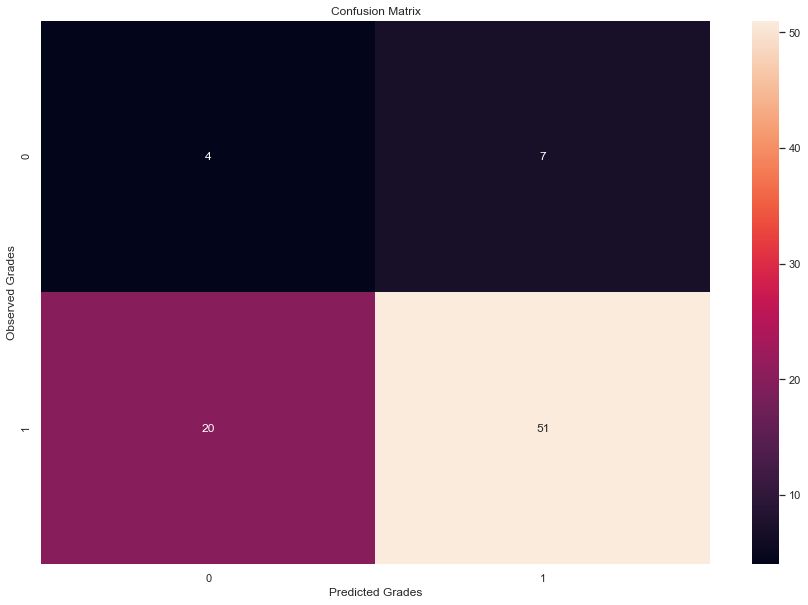

In [1054]:
if run_param_tunning:
    parameter_grid = {'activation': ['tanh','identity','logistic','relu'],
                    'solver': ['adam','lbfgs','sgd'],
                    'hidden_layer_sizes': [3,5,8,13,21,34],
                    'verbose': [True]}

    cross_validation = StratifiedKFold(n_splits=10, shuffle=True)

    grid_search = GridSearchCV(ANNClassifier,
                            param_grid=parameter_grid,
                            cv=cross_validation)

    grid_search.fit(X_train, y_train)

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    print('Best estimator: {}'.format(grid_search.best_estimator_))
    ANNClassifier = grid_search.best_estimator_
    yk_pred = ANNClassifier.predict(X_test)

    best_nn_classification_report = classification_report(y_test, yk_pred, output_dict=True)

    print("--- Improved model ---\n")
    print(f"Classification report:\n{best_nn_classification_report}\n")

    sb.set(font_scale=1.0)

    ax = plt.subplot()

    confusion_matrix_ann = confusion_matrix(y_test, yk_pred)
    
    f1_nn_tun = f1_score(y_test, predictions_test)
    roc_nn_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_nn_tun))
    print(f"ROC: {roc_nn_tun}")

    sb.heatmap(confusion_matrix_ann, annot=True, ax=ax, fmt="g")

    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Logistic Regression <a class="anchor" id="logistic-regression"></a>

In [ ]:
lr = LogisticRegression()

# Feature Selection
lr = RFECV(lr, scoring='f1_macro')

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

lr.fit(X_scaled, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = lr.predict(X_scaled)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_lr = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

    
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_scaled_test = scaler_test.transform(X_test)
    
print(53 * '=')
print("TEST")
predictions_test = lr.predict(X_scaled_test) 
lr_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_lr = f1_score(y_test, predictions_test)
roc_lr = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_lr))
print(f"ROC: {roc_lr}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_lr = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-5"></a>

In [ ]:
if run_param_tunning:
    lr_classifier = LogisticRegression()
    
    lr_grid_search = GridSearchCV(lr_classifier, scoring="roc_auc", cv=5, param_grid={})
    lr_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(lr_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = lr_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_lr = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()
    
    print(53 * '=')
    print("TEST")
    predictions_test = lr_grid_search.predict(X_test) 
    lr_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_lr_tun = f1_score(y_test, predictions_test)
    roc_lr_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_lr_tun))
    print(f"ROC: {roc_lr_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_lr = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Naive Bayes <a class="anchor" id="naive-bayes"></a>

TRAIN
F1 Score: 0.5614035087719299
ROC: 0.6445497630331753
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.60      0.83      0.70       211
         pay       0.73      0.45      0.56       211

    accuracy                           0.64       422
   macro avg       0.67      0.64      0.63       422
weighted avg       0.67      0.64      0.63       422




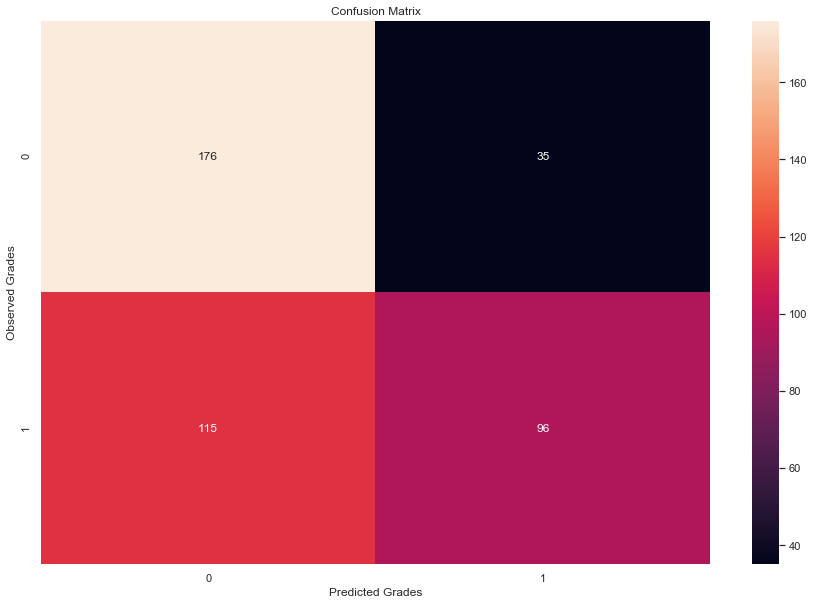

TEST
F1 Score: 0.5925925925925926
ROC: 0.4980793854033291
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.13      0.55      0.21        11
         pay       0.86      0.45      0.59        71

    accuracy                           0.46        82
   macro avg       0.50      0.50      0.40        82
weighted avg       0.77      0.46      0.54        82



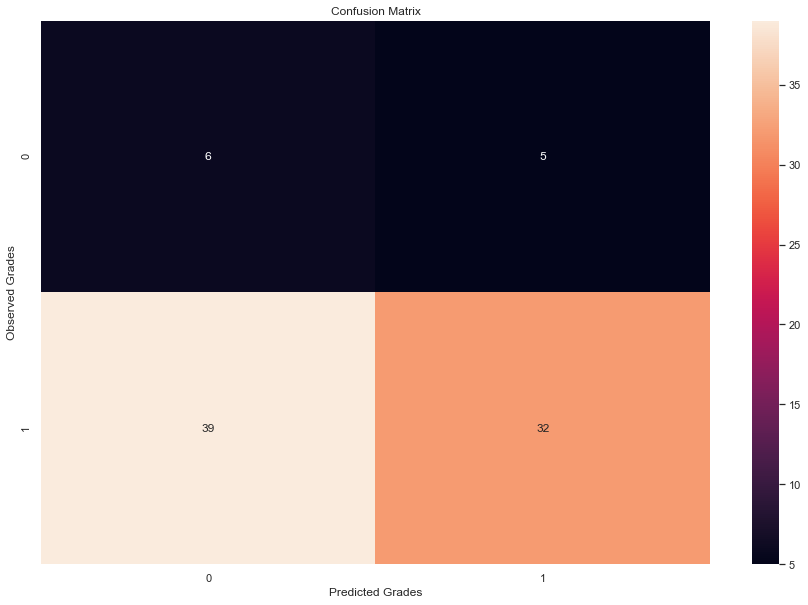

In [459]:
nb = GaussianNB()

# Feature Selection
# nb = RFECV(nb, scoring='roc_auc')

nb.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = nb.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_nb = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = nb.predict(X_test) 
nb_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_nb = f1_score(y_test, predictions_test)
roc_nb = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_nb))
print(f"ROC: {roc_nb}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_nb = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-6"></a>

Best score: 0.7201128513420872
TRAIN
F1 Score: 0.5614035087719299
ROC: 0.6445497630331753
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.60      0.83      0.70       211
         pay       0.73      0.45      0.56       211

    accuracy                           0.64       422
   macro avg       0.67      0.64      0.63       422
weighted avg       0.67      0.64      0.63       422



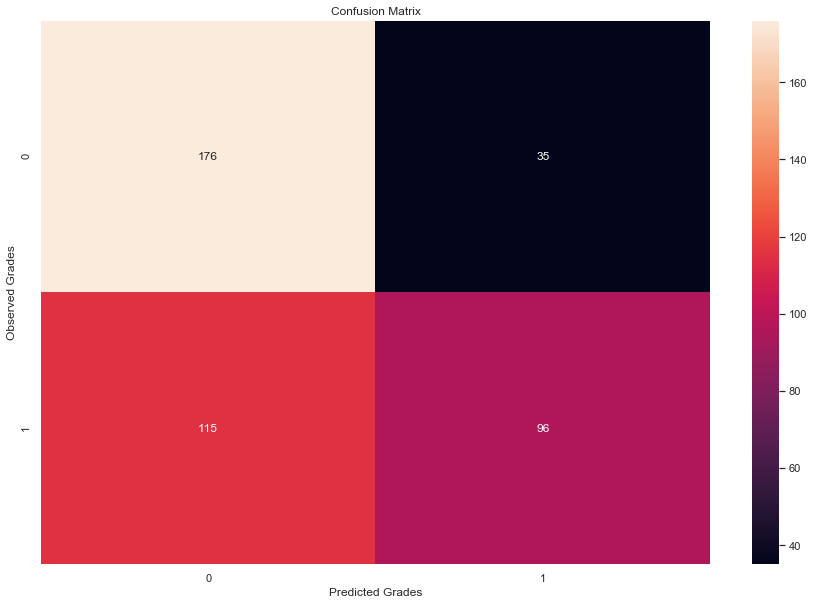

TEST
F1 Score: 0.5925925925925926
ROC: 0.4980793854033291
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.13      0.55      0.21        11
         pay       0.86      0.45      0.59        71

    accuracy                           0.46        82
   macro avg       0.50      0.50      0.40        82
weighted avg       0.77      0.46      0.54        82



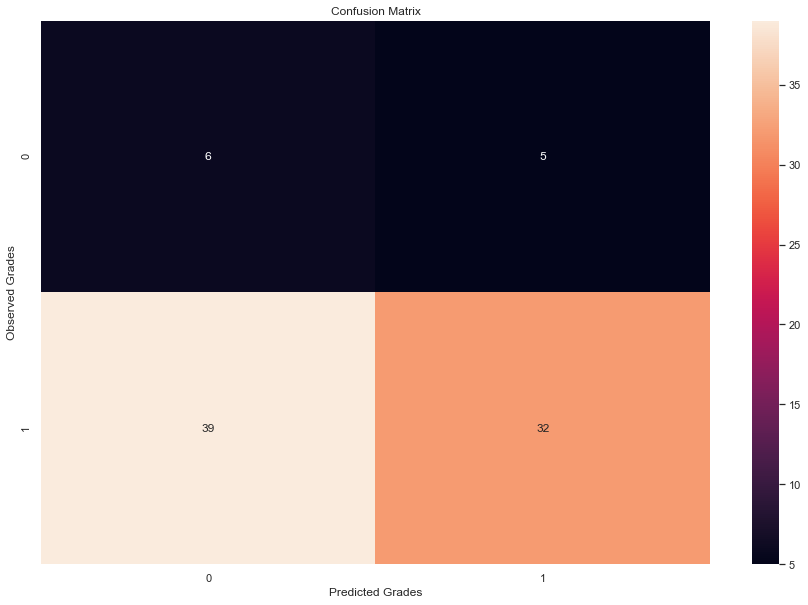

In [460]:
if run_param_tunning:
    nb_classifier = GaussianNB()

    nb_grid_search = GridSearchCV(nb_classifier, scoring="roc_auc", cv=5, param_grid={})
    nb_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(nb_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = nb_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_nb = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = nb_grid_search.predict(X_test) 
    nb_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_nb_tun = f1_score(y_test, predictions_test)
    roc_nb_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_nb_tun))
    print(f"ROC: {roc_nb_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_nb = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Random Forest <a class="anchor" id="random-forest"></a>

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True False False  True  True False]
TRAIN
F1 Score: 1.0
ROC: 1.0
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      1.00      1.00       211
         pay       1.00      1.00      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422




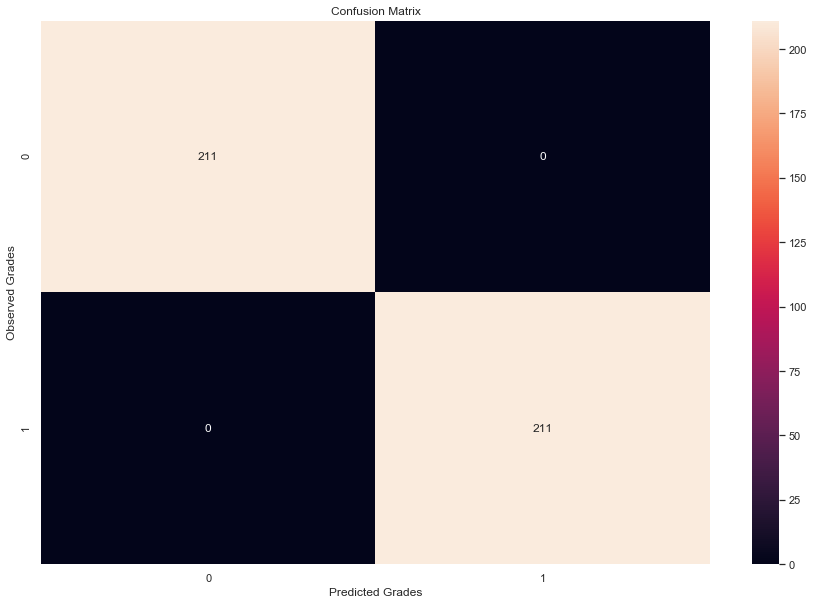

TEST
F1 Score: 0.9230769230769231
ROC: 0.6920614596670935
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.50      0.45      0.48        11
         pay       0.92      0.93      0.92        71

    accuracy                           0.87        82
   macro avg       0.71      0.69      0.70        82
weighted avg       0.86      0.87      0.86        82



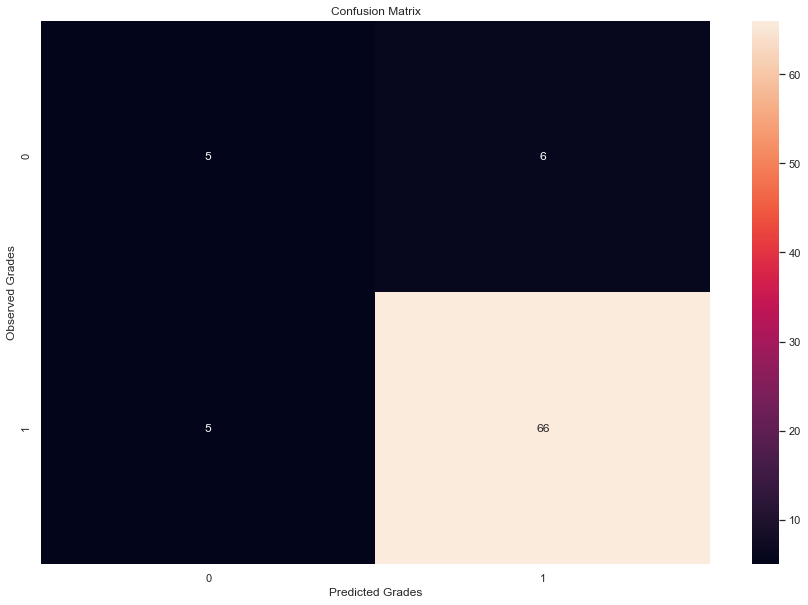

In [1010]:
rf = RandomForestClassifier()

#from sklearn.feature_selection import SelectFromModel
# Feature Selection
rf = RFECV(rf, scoring='f1_macro')
#rf = SelectFromModel(RandomForestClassifier(n_estimators = 100))

rf.fit(X_train, y_train)
print(rf.support_)
print(53 * '=')
print("TRAIN")
predictions_train = rf.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_rf = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = rf.predict(X_test)
rf_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_rf = f1_score(y_test, predictions_test)
roc_rf = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_rf))
print(f"ROC: {roc_rf}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_rf = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-7"></a>

Best score: 0.9907925961082107
TRAIN
F1 Score: 0.9929078014184397
ROC: 0.9928909952606635
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      0.99      0.99       211
         pay       0.99      1.00      0.99       211

    accuracy                           0.99       422
   macro avg       0.99      0.99      0.99       422
weighted avg       0.99      0.99      0.99       422



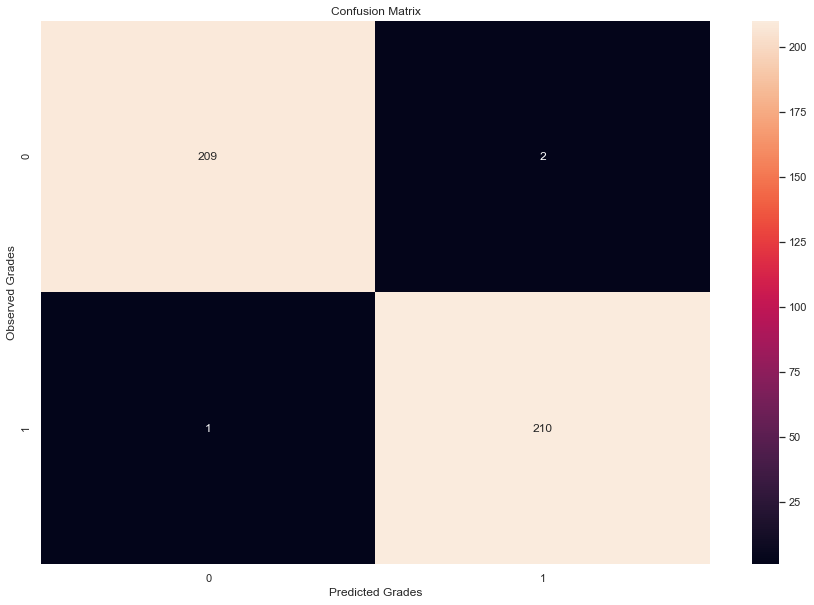

TEST
F1 Score: 0.9370629370629372
ROC: 0.7445582586427656
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.60      0.55      0.57        11
         pay       0.93      0.94      0.94        71

    accuracy                           0.89        82
   macro avg       0.77      0.74      0.75        82
weighted avg       0.89      0.89      0.89        82



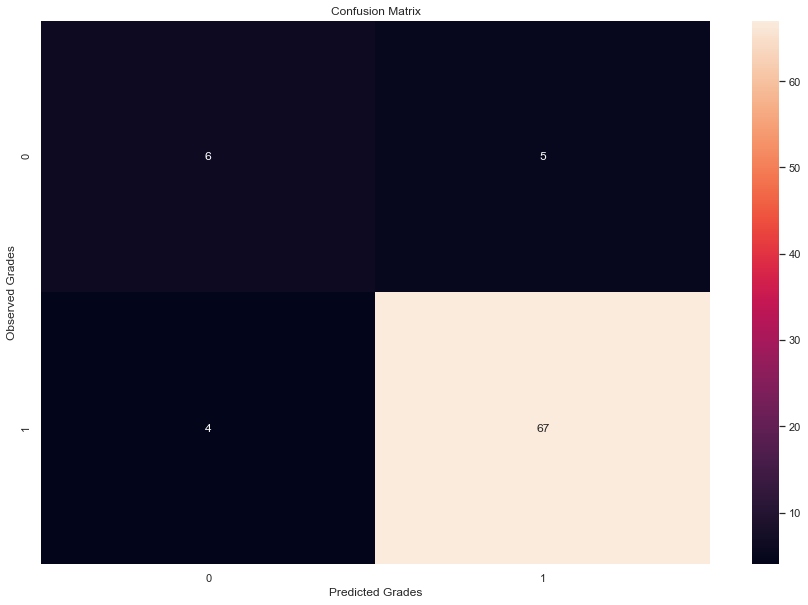

In [1011]:
if run_param_tunning:
    rf_classifier = RandomForestClassifier()

    rf_grid_search = GridSearchCV(rf_classifier, scoring="roc_auc", cv=5, param_grid={'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]})
    rf_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(rf_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = rf_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_rf = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = rf_grid_search.predict(X_test)
    rf_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_rf_tun = f1_score(y_test, predictions_test)
    roc_rf_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_rf_tun))
    print(f"ROC: {roc_rf_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_rf = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## XGBoost <a class="anchor" id="xgboost"></a>

In [1031]:

xgb = XGBClassifier()

# Feature Selection
xgb = RFECV(xgb, scoring='roc_auc')

xgb.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = xgb.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_xgb = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_xgb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = xgb.predict(X_test)
xgb_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_xgb = f1_score(y_test, predictions_test)
roc_xgb = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_xgb))
print(f"ROC: {roc_xgb}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_xgb = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_xgb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-8"></a>

In [1032]:
if run_param_tunning:
    xgb_classifier = XGBClassifier()
    
    # Feature Selection
    xgb_classifier = RFECV(xgb, scoring='roc_auc')

    xgb_grid_search = GridSearchCV(xgb_classifier, scoring="roc_auc", cv=5, param_grid={})
    xgb_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(xgb_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = xgb_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_xgb = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_xgb, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = xgb_grid_search.predict(X_test)
    xgb_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_xgb_tun = f1_score(y_test, predictions_test)
    roc_xgb_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_xgb_tun))
    print(f"ROC: {roc_xgb_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_xgb = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_xgb, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## MLP <a class="anchor" id="mlp"></a>

TRAIN
F1 Score: 0.7544910179640719
ROC: 0.7085308056872038
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.83      0.52      0.64       211
         pay       0.65      0.90      0.75       211

    accuracy                           0.71       422
   macro avg       0.74      0.71      0.70       422
weighted avg       0.74      0.71      0.70       422




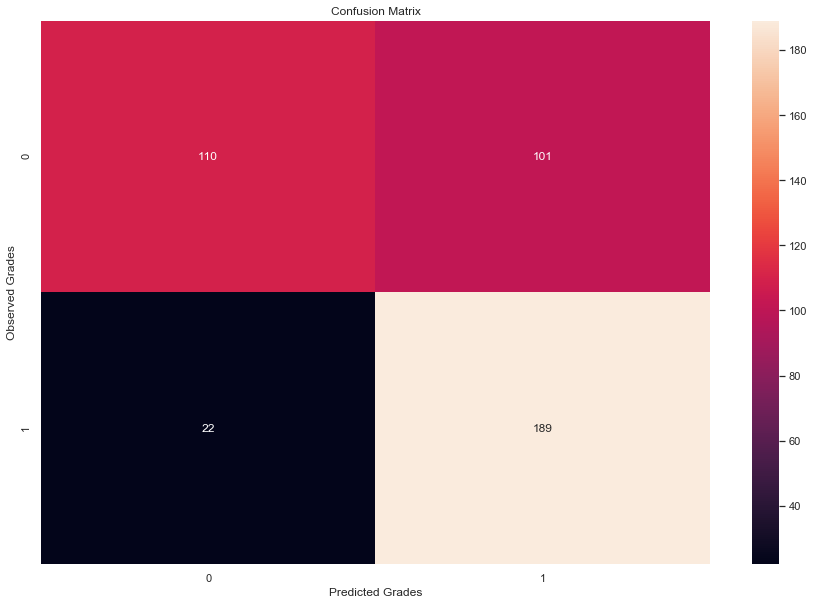

TEST
F1 Score: 0.8951048951048951
ROC: 0.5870678617157491
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.30      0.27      0.29        11
         pay       0.89      0.90      0.90        71

    accuracy                           0.82        82
   macro avg       0.59      0.59      0.59        82
weighted avg       0.81      0.82      0.81        82



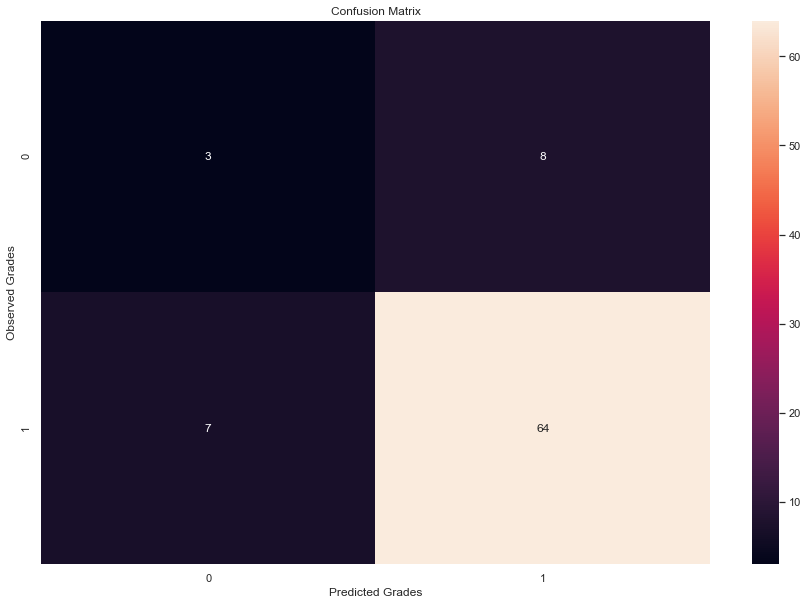

In [1043]:
mlp = MLPClassifier(alpha=1, max_iter=1000)

# Feature Selection
# mlp = RFECV(mlp, scoring='roc_auc')

mlp.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = mlp.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_mlp = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = mlp.predict(X_test)
mlp_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_mlp = f1_score(y_test, predictions_test)
roc_mlp = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_mlp))
print(f"ROC: {roc_mlp}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_mlp = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-9"></a>

Best score: 0.7590806019377447
TRAIN
F1 Score: 0.6906474820143885
ROC: 0.6943127962085309
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.69      0.71      0.70       211
         pay       0.70      0.68      0.69       211

    accuracy                           0.69       422
   macro avg       0.69      0.69      0.69       422
weighted avg       0.69      0.69      0.69       422



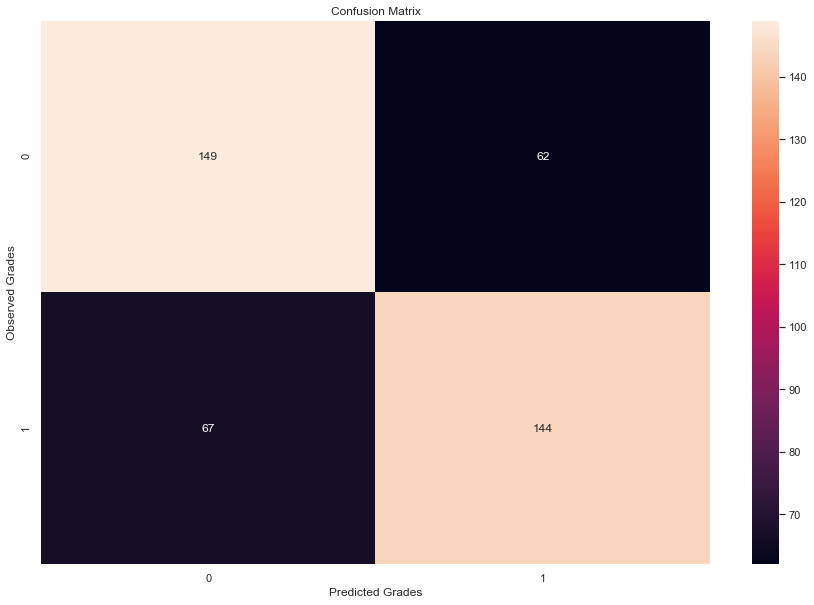

TEST
F1 Score: 0.8244274809160305
ROC: 0.6075544174135723
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.23      0.45      0.30        11
         pay       0.90      0.76      0.82        71

    accuracy                           0.72        82
   macro avg       0.56      0.61      0.56        82
weighted avg       0.81      0.72      0.75        82



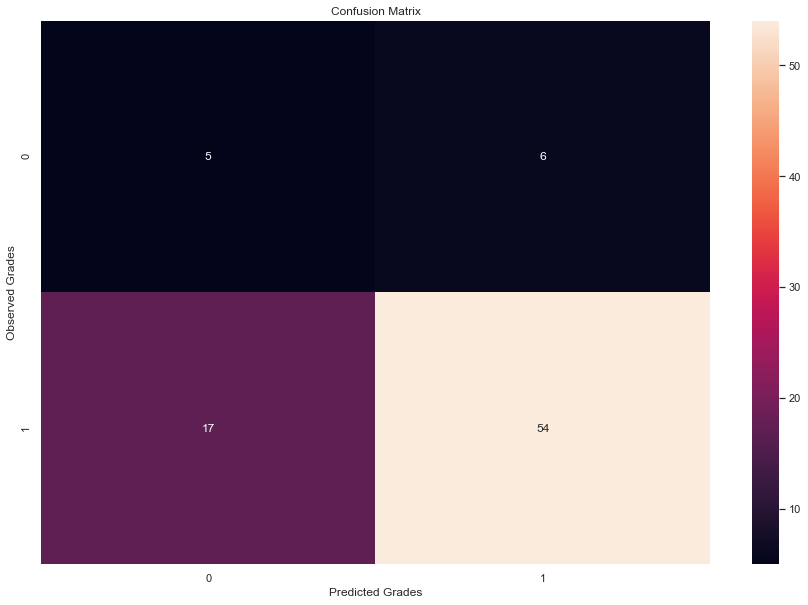

In [1044]:
if run_param_tunning:
    mlp_classifier = MLPClassifier(random_state=1, early_stopping=False)

    mlp_grid_search = GridSearchCV(mlp_classifier, scoring="roc_auc", cv=10, param_grid={})
    mlp_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(mlp_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = mlp_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_mlp = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = mlp_grid_search.predict(X_test) 
    mlp_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_mlp_tun = f1_score(y_test, predictions_test)
    roc_mlp_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_mlp_tun))
    print(f"ROC: {roc_mlp_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_mlp = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Ada Boost <a class="anchor" id="ada-boost"></a>

TRAIN
F1 Score: 0.9952380952380951
ROC: 0.9952606635071091
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.99      1.00      1.00       211
         pay       1.00      0.99      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422




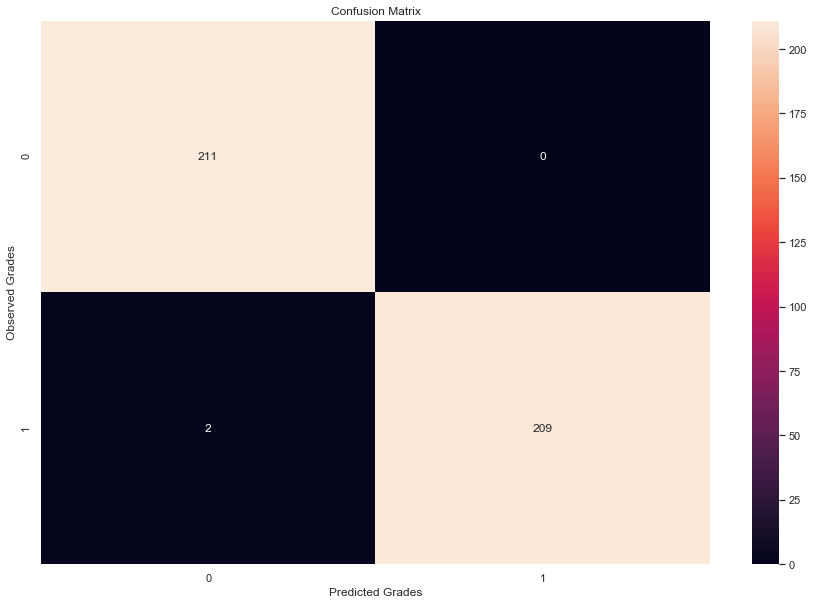

TEST
F1 Score: 0.8840579710144928
ROC: 0.6568501920614597
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.33      0.45      0.38        11
         pay       0.91      0.86      0.88        71

    accuracy                           0.80        82
   macro avg       0.62      0.66      0.63        82
weighted avg       0.83      0.80      0.82        82



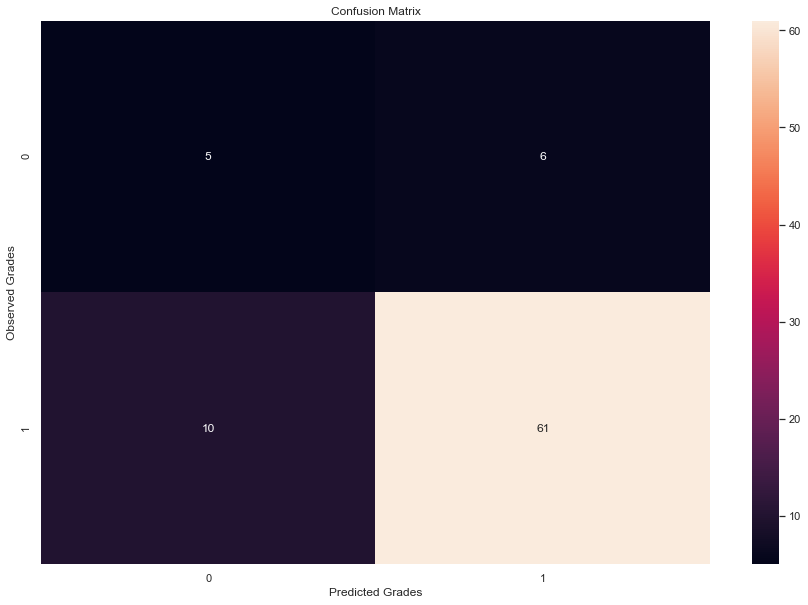

In [1016]:
boost = AdaBoostClassifier()

# Feature Selection
boost = RFECV(boost, scoring='roc_auc')

boost.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = boost.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_boost = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_boost, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = boost.predict(X_test) 
boost_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_boost = f1_score(y_test, predictions_test)
roc_boost = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_boost))
print(f"ROC: {roc_boost}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_boost = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_boost, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-10"></a>

Best score: 0.9692265469425273
TRAIN
F1 Score: 1.0
ROC: 1.0
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      1.00      1.00       211
         pay       1.00      1.00      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422



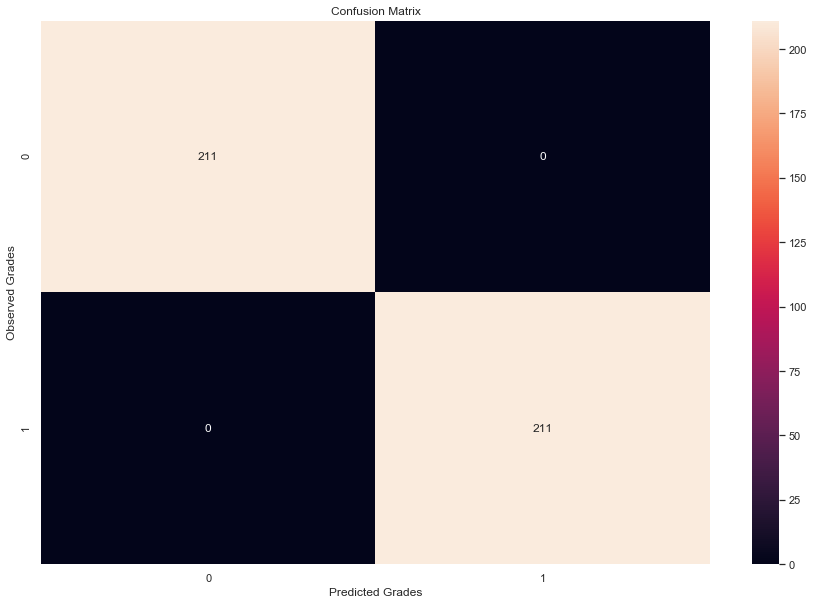

TEST
F1 Score: 0.9166666666666666
ROC: 0.646606914212548
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.44      0.36      0.40        11
         pay       0.90      0.93      0.92        71

    accuracy                           0.85        82
   macro avg       0.67      0.65      0.66        82
weighted avg       0.84      0.85      0.85        82



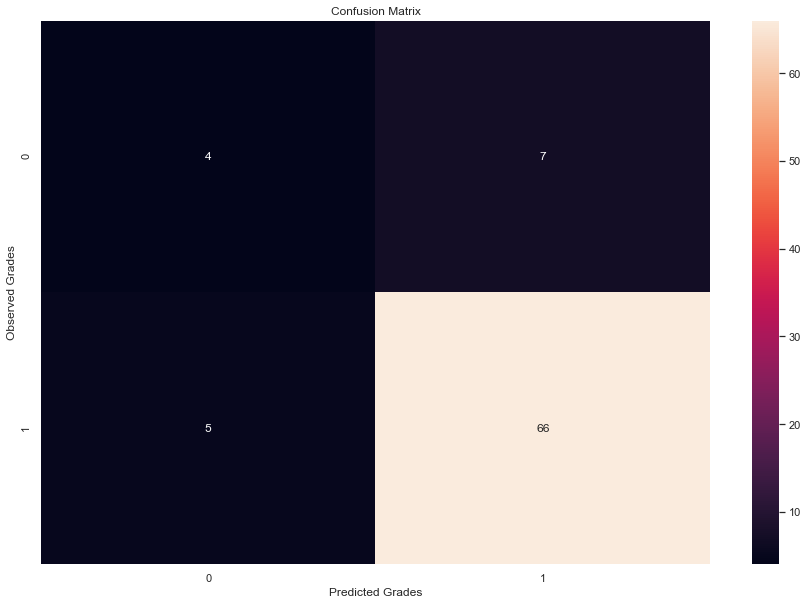

In [1041]:
if run_param_tunning:
    #ada_classifier = AdaBoostClassifier(random_state=0)

    #grid = dict()
    #grid['n_estimators'] = [10, 50, 100, 500]
    #grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
    
    param_grid = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}


    DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

    ada_classifier = AdaBoostClassifier(base_estimator = DTC)

    # run grid search
    ada_grid_search = GridSearchCV(ada_classifier, param_grid=param_grid, scoring = 'roc_auc')
    
    #ada_grid_search = GridSearchCV(ada_classifier, scoring="roc_auc", cv=5, param_grid=grid)
    ada_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(ada_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = ada_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_ada = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_ada, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = ada_grid_search.predict(X_test) 
    ada_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_boost_tun = f1_score(y_test, predictions_test)
    roc_boost_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_boost_tun))
    print(f"ROC: {roc_boost_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_ada = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_ada, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Voting <a class="anchor" id="voting"></a>

In [ ]:
# vote = VotingClassifier(
#      estimators=[('dt', DecisionTreeClassifier()), ('svm', LinearSVC()), ('xgb', XGBClassifier())],
#      voting='hard', weights=[1,1,1]
# )

# Feature Selection
# classifier = RFECV(vote, scoring='roc_auc')

# vote.fit(X_train, y_train)
# vote_prediction = vote.predict(X_test)

# vote_classification_report = classification_report(y_test, vote_prediction, output_dict=True)

# print(f"Classification report:\n{classification_report(y_test, vote_prediction, labels=np.unique(y_train))}\n")

# sb.set(font_scale=1.0)

# ax = plt.subplot()

# confusion_matrix_vote = confusion_matrix(y_test, vote_prediction)

# sb.heatmap(confusion_matrix_vote, annot=True, ax=ax, fmt="g")

# ax.set_xlabel('Predicted Grades');
# ax.set_ylabel('Observed Grades');
# ax.set_title('Confusion Matrix');
# plt.show()

In [1056]:
table = go.Figure(data=[go.Table(header=dict(values=['Algorithm', 'Accuracy Normal', 'F1 Score Normal', 'ROC Score Normal']),
                 cells=dict(values=[['DT', 'KNN', 'SVM', 'NN', 'LR', 'NB', 'RF', 'MLP', 'BOOST'], 
                                    [dtc_classification_report['accuracy'], knn_classification_report['accuracy'], svm_classification_report['accuracy'], nn_classification_report['accuracy'], lr_classification_report['accuracy'], nb_classification_report['accuracy'], rf_classification_report['accuracy'], mlp_classification_report['accuracy'], boost_classification_report['accuracy']], 
                                   [f1_dt, f1_knn, f1_svm, f1_nn, f1_lr, f1_nb, f1_rf, f1_mlp, f1_boost], [roc_dt, roc_knn, roc_svm, roc_nn, roc_lr, roc_nb, roc_rf, roc_mlp, roc_boost]]))
                     ])

table.show()

In [1055]:
if run_param_tunning:
    table1 = go.Figure(data=[go.Table(header=dict(values=['Algorithm', 'Accuracy Normal', 'F1 Score Normal', 'ROC Score Normal']),
                     cells=dict(values=[['DT', 'KNN', 'SVM', 'NN', 'LR', 'NB', 'RF', 'MLP', 'BOOST'], 
                                        [dtc_tun_classification_report['accuracy'], knn_tun_classification_report['accuracy'], 0, best_nn_classification_report['accuracy'], lr_tun_classification_report['accuracy'], nb_tun_classification_report['accuracy'], rf_tun_classification_report['accuracy'], mlp_tun_classification_report['accuracy'], boost_tun_classification_report['accuracy']], 
                                       [f1_dt, f1_knn, 0, f1_nn, f1_lr, f1_nb, f1_rf, f1_mlp, f1_boost], [roc_dt, roc_knn, 0, roc_nn, roc_lr, roc_nb, roc_rf, roc_mlp, roc_boost]]))
                         ])

    table1.show()

TypeError: string indices must be integers

In [ ]:
test_data_no_ids.info()

In [ ]:
print(test_data_no_ids["loan_id"].to_list())

#### [back](#index)
## Apply Model <a class="anchor" id="apply-model"></a>

In [ ]:
test_inputs = test_data_no_ids.drop(columns=['status', 'loan_id'])
all_ids_comp = test_data['loan_id'].values

pred_comp = rf_grid_search.predict_proba(test_inputs)

pred_comp = pd.DataFrame(pred_comp, columns=['col2', 'Predicted'])

pred_comp.drop('col2', axis=1, inplace=True)
all_ids_comp = pd.DataFrame(all_ids_comp, columns=['Id'])
pred_comp['Predicted'] = [(1 - pred_comp['Predicted'][n]) for n in range(len(pred_comp))]
results = pd.concat([all_ids_comp, pred_comp], axis=1)
results = results.rename(columns={"loan_id":"Id"})
results.to_csv('results.csv', index = False)

print(results)